In [61]:
import os
import re
import seaborn as sb
import cPickle
import pickle
#from pyitlib import discrete_random_variable as drv

In [62]:
import TuningTools

In [63]:
#import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics

In [64]:
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

In [65]:
dirout = '/home/caducovas/DeepRinger/results/plots'

In [7]:
###validation data
dirin='/home/caducovas/DeepRinger/data/'
val_data_sort_0 = np.load(dirin+"val_Data_sort_0_hidden_neurons_77.npy")
val_data_sort_1 = np.load(dirin+"val_Data_sort_1_hidden_neurons_77.npy")
val_data_sort_2 = np.load(dirin+"val_Data_sort_2_hidden_neurons_77.npy")
val_data_sort_3 = np.load(dirin+"val_Data_sort_3_hidden_neurons_77.npy")
val_data_sort_4 = np.load(dirin+"val_Data_sort_4_hidden_neurons_77.npy")
val_data_sort_5 = np.load(dirin+"val_Data_sort_5_hidden_neurons_77.npy")
val_data_sort_6 = np.load(dirin+"val_Data_sort_6_hidden_neurons_77.npy")
val_data_sort_7 = np.load(dirin+"val_Data_sort_7_hidden_neurons_77.npy")
val_data_sort_8 = np.load(dirin+"val_Data_sort_8_hidden_neurons_77.npy")
val_data_sort_9 = np.load(dirin+"val_Data_sort_9_hidden_neurons_77.npy")


In [8]:
va_data = {}
va_data[0] = val_data_sort_0
va_data[1] = val_data_sort_1
va_data[2] = val_data_sort_2
va_data[3] = val_data_sort_3
va_data[4] = val_data_sort_4
va_data[5] = val_data_sort_5
va_data[6] = val_data_sort_6
va_data[7] = val_data_sort_7
va_data[8] = val_data_sort_8
va_data[9] = val_data_sort_9

In [7]:
dirin='/home/caducovas/DeepRinger/data/run_layer1/'
model_100X80 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26102_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x80_neurons_sort_7_etbin_2_etabin_0_model.h5')

In [9]:
model_100X80.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               8100      
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
Total params: 16,180
Trainable params: 16,180
Non-trainable params: 0
_________________________________________________________________


In [41]:
neurons = []

reconstruct = {}
predict_data = {}

#layer = '40x20'
dirin='/home/caducovas/DeepRinger/data/run_layer1/'
layers = ['100x100','100x95','100x90','100x85','100x80','100x70','100x60','100x50','100x40','100x30','100x20','100x10']

for layer in layers:
    print "Layer: "+str(layer)
    neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer)]
    predict_data = {}
    for file in files:
        print "Sort: " +str(file.split('_')[27]) ###sort
        nsort = int(file.split('_')[27])
        model = load_model(dirin+file)
        predict_data[nsort] = model.predict(va_data[nsort], batch_size=va_data[nsort].shape[0], verbose=1)
    reconstruct[layer] = predict_data
 

Layer: 100x100
Sort: 0
339519/339519 [==============================] - 1s 3us/step
Sort: 4
339519/339519 [==============================] - 1s 3us/step
Sort: 9
339521/339521 [==============================] - 1s 3us/step
Sort: 1
339519/339519 [==============================] - 1s 4us/step
Sort: 6
339519/339519 [==============================] - 1s 3us/step
Sort: 3
339519/339519 [==============================] - 1s 4us/step
Sort: 2
339519/339519 [==============================] - 1s 4us/step
Sort: 5
339519/339519 [==============================] - 1s 4us/step
Sort: 7
339520/339520 [==============================] - 1s 4us/step
Sort: 8
339521/339521 [==============================] - 1s 4us/step
Layer: 100x95
Sort: 2
339519/339519 [==============================] - 1s 4us/step
Sort: 5
339519/339519 [==============================] - 1s 4us/step
Sort: 7
339520/339520 [==============================] - 1s 4us/step
Sort: 3
339519/339519 [==============================] - 1s 4us/step
Sort:

Sort: 5
339519/339519 [==============================] - 1s 4us/step
Sort: 4
339519/339519 [==============================] - 1s 4us/step
Sort: 1
339519/339519 [==============================] - 1s 4us/step


In [54]:
kl = []
for key in reconstruct['100x85'].keys():
    pdf,bins = KLDiv(val_data.T,output_layer.T)

0
1
2
3
4
5
6
7
8
9


In [57]:
norms[0]

array([[35268.78 ],
       [33726.535],
       [37657.418],
       ...,
       [29157.627],
       [34516.562],
       [34638.086]], dtype=float32)

# Starts here

In [71]:
### Create dictionaries to store the ringer data before and after normalization as well as the total energy 
beforenorm={}
afternorm={}
norms={}
dirin='/home/caducovas/DeepRinger/data/'

files = [f for f in os.listdir(dirin) if (f.endswith( ('.pic') ) and f.split('.')[1].split('_')[1] == '77')]
for file in files:
    f = open(dirin+file,'r')
    a = pickle.load(f)
    f.close()
    nsort=int(file.split('.')[3][-1])
    #a['tunedPP']['items'][0]['items'][0].keys()#['__module']
    beforenorm[nsort] = a['tunedPP']['items'][0]['items'][0]['_beforenorm'] #[0].shape
    afternorm[nsort] = a['tunedPP']['items'][0]['items'][0]['_afternorm'] #[0].shape
    norms[nsort] = a['tunedPP']['items'][0]['items'][0]['_normslist'] #[0].shape

In [13]:
neurons = []

reconstruct = {}
predict_data = {}

#layer = '40x20'
dirin='/home/caducovas/DeepRinger/data/run_layer1/adam1/'
#layers = ['100x100','100x95','100x90','100x85','100x80','100x70','100x60','100x50','100x40','100x30','100x20','100x10','100x9','100x8','100x7','100x6','100x5','100x4','100x3']
layers = ['100x100','100x90','100x85','100x70','100x55','100x40','100x25','100x20','100x15','100x10','100x5','100x4','100x3','100x2']


for layer in layers:
    print "Layer: "+str(layer)
    neuron = int(layer.split('x')[1])
    #neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer)]
    predict_data = {}
    for file in files:
        print "Sort: " +str(file.split('_')[27]) ###sort
        nsort = int(file.split('_')[27])
        model = load_model(dirin+file)
        if isinstance(afternorm[nsort], (tuple, list,)):
            predict = []
            print "Predict"
            for i, cdata in enumerate(afternorm[nsort]):
                predict.append(model.predict(cdata, batch_size=cdata.shape[0], verbose=1))
        predict_data[nsort] = predict

        reconstruct[neuron] = predict_data

Layer: 100x100
Sort: 3
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 0
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 7
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 4
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 9
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 5
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 8
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 1
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 6
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 2
Predict
2900/2900 [==============================] - 0s 1us/step
Layer: 100x90
Sort: 9
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 4
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 0
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 3
Predict
2900/2

2900/2900 [==============================] - 0s 1us/step
Sort: 6
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 8
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 7
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 2
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 1
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 4
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 0
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 3
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 9
Predict
2901/2901 [==============================] - 0s 1us/step
Layer: 100x20
Sort: 5
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 3
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 1
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 0
Predict
2900/2900 [==========================

2900/2900 [==============================] - 0s 1us/step
Sort: 7
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 6
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 2
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 8
Predict
2901/2901 [==============================] - 0s 1us/step
Sort: 3
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 4
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 5
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 9
Predict
2901/2901 [==============================] - 0s 1us/step
Layer: 100x2
Sort: 6
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 3
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 1
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 4
Predict
2900/2900 [==============================] - 0s 1us/step
Sort: 8
Predict
2901/2901 [===========================

In [74]:
reconstruct.keys()

[80, 40, 10, 60]

# That s the function

In [73]:
predict_data = {}
reconstruct = {}
modelo={}
enc_model={}
dec_model={}

#if K.backend() == 'tensorflow':
#    K.clear_session()

dirin='/home/caducovas/DeepRinger/data/run_layer1/adam_80/'
layers = ['100x80','80x60','60x40','40x10']
nsorts=10

#for i in [len(layers)]:
for i in range(len(layers)):
    nlayers=i+1
    layers_list=layers[:nlayers]
    print layers_list
    
    predict_data = {} ##predict data junta os sortes
    
    for isort in range(nsorts):
        enc_model={}
        dec_model={}
        print "Sort: "+str(isort)
        
        #Itera sobre os layers para adquirir o encoder e o decoder
        for layer in layers_list: #Different archtectures (each time one more autoencoder)
            #print "Reading files of: "+layer
            
            neuron = int(layer.split('x')[1])
            files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer and f.split('_')[27] == str(isort))]
            ifile=files[0]
            #print ifile
            modelo = load_model(dirin+ifile)
            enc_model[layer] = modelo.layers[0].get_weights() 
            dec_model[layer] = modelo.layers[2].get_weights()
        
        #print "Creating the model"
        model = Sequential()
        print "just to make sure it is the first key "+list(enc_model.keys())[0]
        first_layer = [k for k in list(enc_model.keys()) if '100x' in k][0]
        model.add(Dense(int(layers_list[0].split('x')[1]), input_dim=100, weights=enc_model[first_layer]))
        
        if(nlayers >1):
            ## Add encoders
            for layer in layers_list[1:]:
                neuron = int(layer.split('x')[1])
                model.add(Dense(neuron, weights=enc_model[layer]))
        
        ## Add decoders
        for layer in reversed(layers_list):
            print layer
            neuron = int(layer.split('x')[0])
            model.add(Dense(neuron, weights=dec_model[layer]))
        model.add(Activation('tanh'))
        
        #print model.summary()
        model.compile('adam','mse')

###################                
        bottleneck=int(layers_list[-1].split('x')[1])
    
        if isinstance(afternorm[isort], (tuple, list,)):
            predict = []
            for i, cdata in enumerate(afternorm[isort]):
                predict.append(model.predict(cdata, batch_size=cdata.shape[0], verbose=1))
        #print isort
        predict_data[int(isort)] = predict
        #print predict_data
        reconstruct[bottleneck] = predict_data
        
        #if K.backend() == 'tensorflow':
        #    K.clear_session()

['100x80']
Sort: 0
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 1us/step
Sort: 1
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 1us/step
Sort: 2
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 1us/step
Sort: 3
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 1us/step
Sort: 4
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 1us/step
Sort: 5
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 1us/step
Sort: 6
just to make sure it is the first key 100x80
100x80
2900/2900 [==============================] - 0s 2us/step
Sort: 7
just to make sure it is the first key 100x80
100x80
2901/2901 [==============================] - 0s 1us/step
Sort: 8
just to make sure it is the first key 100x80


# Propagate dinamically to analyze reduced dim

In [85]:
predict_data = {}
propagate = {}
modelo={}
enc_model={}
dec_model={}

#if K.backend() == 'tensorflow':
#    K.clear_session()

dirin='/home/caducovas/DeepRinger/data/run_layer1/adam_80/'
layers = ['100x80','80x60','60x40','40x10']
nsorts=10

for i in [len(layers)]:
#for i in range(len(layers)):
    nlayers=i+1
    layers_list=layers[:nlayers]
    print layers_list
    
    predict_data = {} ##predict data junta os sortes
    
    for isort in range(nsorts):
        enc_model={}
        dec_model={}
        print "Sort: "+str(isort)
        
        #Itera sobre os layers para adquirir o encoder e o decoder
        for layer in layers_list: #Different archtectures (each time one more autoencoder)
            #print "Reading files of: "+layer
            
            neuron = int(layer.split('x')[1])
            files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer and f.split('_')[27] == str(isort))]
            ifile=files[0]
            #print ifile
            modelo = load_model(dirin+ifile)
            enc_model[layer] = modelo.layers[0].get_weights() 
            dec_model[layer] = modelo.layers[2].get_weights()
        
        #print "Creating the model"
        model = Sequential()
        print "just to make sure it is the first key "+list(enc_model.keys())[0]
        first_layer = [k for k in list(enc_model.keys()) if '100x' in k][0]
        model.add(Dense(int(layers_list[0].split('x')[1]), input_dim=100, weights=enc_model[first_layer]))
        
        if(nlayers >1):
            ## Add encoders
            for layer in layers_list[1:]:
                neuron = int(layer.split('x')[1])
                model.add(Dense(neuron, weights=enc_model[layer]))
        
#        ## Add decoders
#        for layer in reversed(layers_list):
#            print layer
#            neuron = int(layer.split('x')[0])
#            model.add(Dense(neuron, weights=dec_model[layer]))
        model.add(Activation('tanh'))
        
        print model.summary()
        model.compile('adam','mse')

###################                
        bottleneck=int(layers_list[-1].split('x')[1])
    
        if isinstance(afternorm[isort], (tuple, list,)):
            predict = []
            for i, cdata in enumerate(afternorm[isort]):
                predict.append(model.predict(cdata, batch_size=cdata.shape[0], verbose=1))
        #print isort
        predict_data[int(isort)] = predict
        #print predict_data
        propagate[bottleneck] = predict_data
        
        #if K.backend() == 'tensorflow':
        #    K.clear_session()

['100x80', '80x60', '60x40', '40x10']
Sort: 0
just to make sure it is the first key 40x10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_202 (Dense)            (None, 60)                4860      
_________________________________________________________________
dense_203 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_204 (Dense)            (None, 10)                410       
_________________________________________________________________
activation_41 (Activation)   (None, 10)                0         
Total params: 15,790
Trainable params: 15,790
Non-trainable params: 0
_________________________________________________________________
None
2900/2900 [==============================] 

Sort: 7
just to make sure it is the first key 40x10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_230 (Dense)            (None, 60)                4860      
_________________________________________________________________
dense_231 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_232 (Dense)            (None, 10)                410       
_________________________________________________________________
activation_48 (Activation)   (None, 10)                0         
Total params: 15,790
Trainable params: 15,790
Non-trainable params: 0
_________________________________________________________________
None
2901/2901 [==============================] - 0s 2us/step
Sort: 8
just to make sur

In [86]:
propagate.keys()

[10]

# Print variables

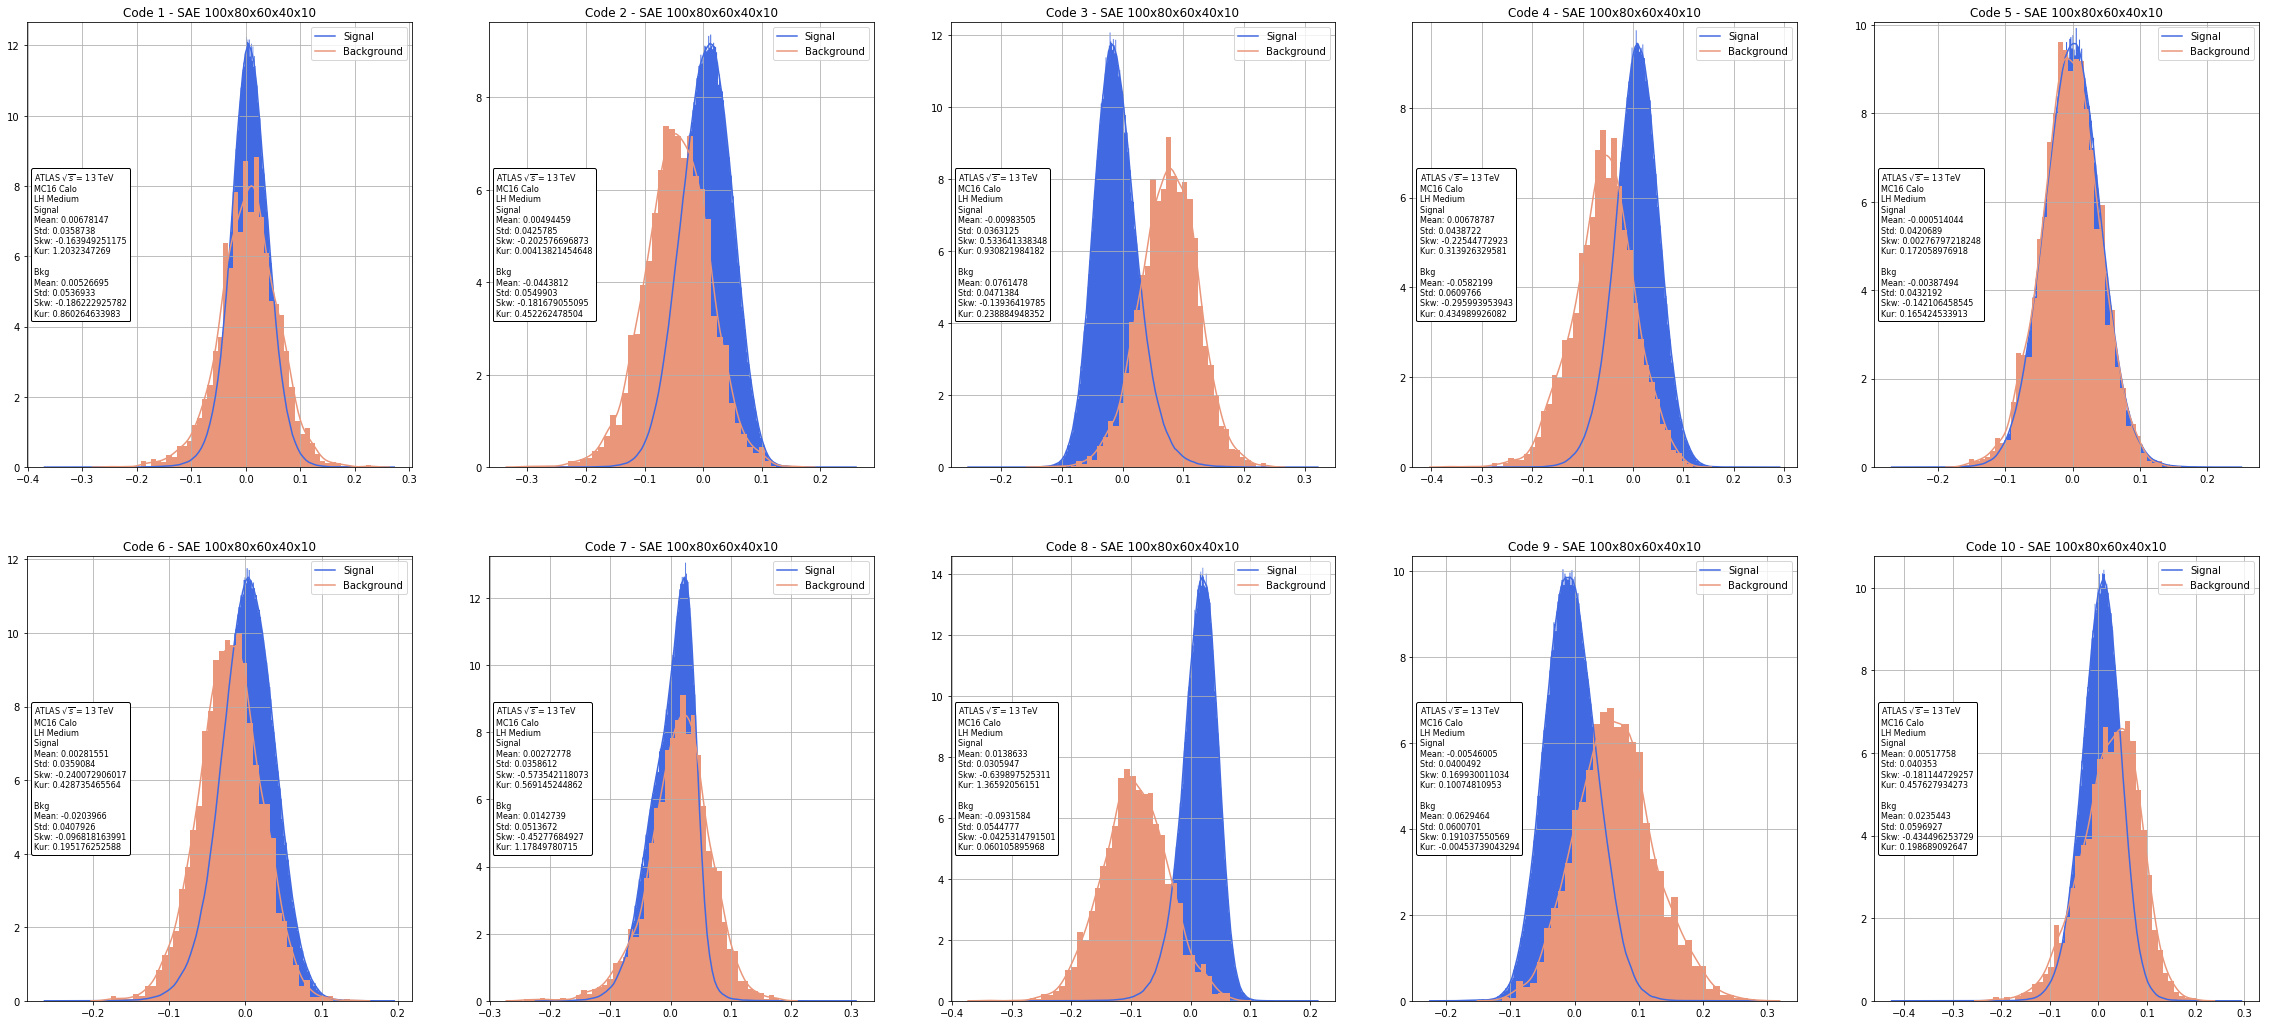

In [98]:
from scipy.stats import kurtosis
from scipy.stats import skew

fig, axs = plt.subplots(2, 5, figsize=(40, 18))

isort = 0

#sinal
s1= propagate[10][isort][0].T[0] 
s2= propagate[10][isort][0].T[1]
s3= propagate[10][isort][0].T[2] 
s4= propagate[10][isort][0].T[3]
s5= propagate[10][isort][0].T[4] 
s6= propagate[10][isort][0].T[5]
s7= propagate[10][isort][0].T[6] 
s8= propagate[10][isort][0].T[7]
s9= propagate[10][isort][0].T[8] 
s10= propagate[10][isort][0].T[9]
#background
b1= propagate[10][isort][1].T[0] 
b2= propagate[10][isort][1].T[1]
b3= propagate[10][isort][1].T[2]
b4= propagate[10][isort][1].T[3]
b5= propagate[10][isort][1].T[4] 
b6= propagate[10][isort][1].T[5]
b7= propagate[10][isort][1].T[6]
b8= propagate[10][isort][1].T[7]
b9= propagate[10][isort][1].T[8]
b10= propagate[10][isort][1].T[9]

sbold = "\033[1m"
ebold = "\033[0;0m"

###CODE 1
s=s1
b=b1
#fig.title('Stacked AutoEncoder 100x2')
sb.kdeplot(s,label="Signal",ax=axs[0,0],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[0,0],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[0,0].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[0,0].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[0,0].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[0,0].add_artist(at)
axs[0,0].set_title('Code 1 - SAE 100x80x60x40x10')

#axs[0,0].title('Code 1')

###CODE 2
s=s2
b=b2
sb.kdeplot(s,label="Signal",ax=axs[0,1],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[0,1],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[0,1].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[0,1].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[0,1].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[0,1].add_artist(at)
axs[0,1].set_title('Code 2 - SAE 100x80x60x40x10')


###CODE 3
s=s3
b=b3
sb.kdeplot(s,label="Signal",ax=axs[0,2],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[0,2],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[0,2].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[0,2].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[0,2].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[0,2].add_artist(at)
axs[0,2].set_title('Code 3 - SAE 100x80x60x40x10')

###CODE 4
s=s4
b=b4
sb.kdeplot(s,label="Signal",ax=axs[0,3],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[0,3],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[0,3].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[0,3].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[0,3].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[0,3].add_artist(at)
axs[0,3].set_title('Code 4 - SAE 100x80x60x40x10')

###CODE 5
s=s5
b=b5
sb.kdeplot(s,label="Signal",ax=axs[0,4],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[0,4],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[0,4].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[0,4].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[0,4].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[0,4].add_artist(at)
axs[0,4].set_title('Code 5 - SAE 100x80x60x40x10')

###CODE 6
s=s6
b=b6
sb.kdeplot(s,label="Signal",ax=axs[1,0],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[1,0],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[1,0].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[1,0].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[1,0].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[1,0].add_artist(at)
axs[1,0].set_title('Code 6 - SAE 100x80x60x40x10')

###CODE 7
s=s7
b=b7
sb.kdeplot(s,label="Signal",ax=axs[1,1],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[1,1],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[1,1].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[1,1].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[1,1].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[1,1].add_artist(at)
axs[1,1].set_title('Code 7 - SAE 100x80x60x40x10')

###CODE 8
s=s8
b=b8
sb.kdeplot(s,label="Signal",ax=axs[1,2],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[1,2],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[1,2].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[1,2].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[1,2].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[1,2].add_artist(at)
axs[1,2].set_title('Code 8 - SAE 100x80x60x40x10')

###CODE 9
s=s9
b=b9
sb.kdeplot(s,label="Signal",ax=axs[1,3],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[1,3],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[1,3].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[1,3].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[1,3].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[1,3].add_artist(at)
axs[1,3].set_title('Code 9 - SAE 100x80x60x40x10')

###CODE 10
s=s10
b=b10
sb.kdeplot(s,label="Signal",ax=axs[1,4],color='royalblue')
sb.kdeplot(b,label="Background",ax=axs[1,4],color='darksalmon')
nbins = len(np.histogram(s,'fd')[0])
axs[1,4].hist(s, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
nbins = len(np.histogram(b,'fd')[0])
axs[1,4].hist(b, bins=nbins, normed=True,color='darksalmon')
axs[1,4].grid()
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                  prop=dict(size=8), frameon=True,
                  loc='center left', 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
axs[1,4].add_artist(at)
axs[1,4].set_title('Code 10 - SAE 100x80x60x40x10')





#nbins = len(np.histogram(unnorm_reconstruct_val_Data.sum(axis=1).T,'fd')[0])
#plt.hist(unnorm_reconstruct_val_Data.sum(axis=1).T, bins=nbins, normed=True,color='orange')
#plt.title('pdf Data x Reconstruction - Total Energy - Sort '+str(nsort)+' -100x'+str(layer)+' MI: '+str(pdf),fontsize= 'xx-large')
#fig.savefig(dirout+'pdf_data_recons_tot_100x'+str(layer)+'sort'+str(nsort)+'.png')
plt.show()
#fig.savefig('/home/caducovas/DeepRinger/data/10codes.png')
fig.clear()


In [6]:
loaded = np.load('/home/caducovas/pdfs.npz')

In [66]:
pfmData = pd.read_csv("/home/caducovas/pca_ae.csv",delimiter=';')

In [67]:
classfierData = pd.read_csv("/home/caducovas/classifier.csv",delimiter=';')

In [68]:
pfmData

id       Class      Model Model_name  Layer            time  \
0        1         All  N1-AE_100      N1-AE    100  20190114191908   
1        2      Signal  N1-AE_100      N1-AE    100  20190114191908   
2        3  Background  N1-AE_100      N1-AE    100  20190114191908   
3        4         All  N1-AE_100      N1-AE    100  20190114191908   
4        5      Signal  N1-AE_100      N1-AE    100  20190114191908   
5        6  Background  N1-AE_100      N1-AE    100  20190114191908   
6        7         All  N1-AE_100      N1-AE    100  20190114191908   
7        8      Signal  N1-AE_100      N1-AE    100  20190114191908   
8        9  Background  N1-AE_100      N1-AE    100  20190114191908   
9       10         All  N1-AE_100      N1-AE    100  20190114191908   
10      11      Signal  N1-AE_100      N1-AE    100  20190114191908   
11      12         All  N1-AE_100      N1-AE    100  20190114191908   
12      13  Background  N1-AE_100      N1-AE    100  20190114191908   
13      14      Signal  N1-AE_100      N1-AE    100  20190114191908   
14      15         All  N1-AE_100      N1-AE    100  20190114191908   
15      16      Signal  N1-AE_100      N1-AE    100  20190114191908   
16      17  Background  N1-AE_100      N1-AE    100  20190114191908   
17      18  Background  N1-AE_100      N1-AE    100  20190114191908   
18      19         All  N1-AE_100      N1-AE    100  20190114191908   
19      20         All  N1-AE_100      N1-AE    100  20190114191908   
20      21      Signal  N1-AE_100      N1-AE    100  20190114191908   
21      22  Background  N1-AE_100      N1-AE    100  20190114191908   
22      23      Signal  N1-AE_100      N1-AE    100  20190114191908   
23      24  Background  N1-AE_100      N1-AE    100  20190114191908   
24      25         All  N1-AE_100      N1-AE    100  20190114191908   
25      26      Signal  N1-AE_100      N1-AE    100  20190114191908   
26      27  Background  N1-AE_100      N1-AE    100  20190114191908   
27      28         All  N1-AE_100      N1-AE    100  20190114191908   
28      29      Signal  N1-AE_100      N1-AE    100  20190114191908   
29      30  Background  N1-AE_100      N1-AE    100  20190114191908   
...    ...         ...        ...        ...    ...             ...   
7170  7541         All  N1-PCA_10     N1-PCA     10  20190115031021   
7171  7542      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7172  7543  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7173  7544         All  N1-PCA_10     N1-PCA     10  20190115031021   
7174  7545      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7175  7546  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7176  7547         All  N1-PCA_10     N1-PCA     10  20190115031021   
7177  7548         All  N1-PCA_10     N1-PCA     10  20190115031021   
7178  7549      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7179  7550  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7180  7551      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7181  7552  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7182  7553         All  N1-PCA_10     N1-PCA     10  20190115031021   
7183  7554      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7184  7555  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7185  7556         All  N1-PCA_10     N1-PCA     10  20190115031021   
7186  7557      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7187  7558  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7188  7559         All  N1-PCA_10     N1-PCA     10  20190115031021   
7189  7560      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7190  7561  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7191  7562         All  N1-PCA_10     N1-PCA     10  20190115031021   
7192  7563      Signal  N1-PCA_10     N1-PCA     10  20190115031021   
7193  7564  Background  N1-PCA_10     N1-PCA     10  20190115031021   
7194  7565         All  N1-PCA_1

In [69]:
classfierData

id       Model ModelName  layers  HL_Neuron            time  sort  \
0    1690  N1-AE_100_     N1-AE     100         10  20190114181607     1   
1    1699  N1-AE_100_     N1-AE     100         10  20190114181607     2   
2    1702  N1-AE_100_     N1-AE     100         10  20190114181607     4   
3    1711  N1-AE_100_     N1-AE     100         10  20190114181607     3   
4    1714  N1-AE_100_     N1-AE     100         10  20190114181607     5   
5    1720  N1-AE_100_     N1-AE     100         10  20190114181607     7   
6    1726  N1-AE_100_     N1-AE     100         10  20190114181607     8   
7    1732  N1-AE_100_     N1-AE     100         10  20190114181607     6   
8    1738  N1-AE_100_     N1-AE     100         10  20190114181607     9   
9    1744  N1-AE_100_     N1-AE     100         10  20190114181607     0   
10   1750  N1-AE_100_     N1-AE     100         10  20190114191908     1   
11   1759  N1-AE_100_     N1-AE     100         10  20190114191908     3   
12   1762  N1-AE_100_     N1-AE     100         10  20190114191908     2   
13   1768  N1-AE_100_     N1-AE     100         10  20190114191908     4   
14   1774  N1-AE_100_     N1-AE     100         10  20190114191908     5   
15   1786  N1-AE_100_     N1-AE     100         10  20190114191908     0   
16   1792  N1-AE_100_     N1-AE     100         10  20190114191908     7   
17   1795  N1-AE_100_     N1-AE     100         10  20190114191908     8   
18   1798  N1-AE_100_     N1-AE     100         10  20190114191908     6   
19   1804  N1-AE_100_     N1-AE     100         10  20190114191908     9   
20   1810   N1-AE_90_     N1-AE      90         10  20190114193557     1   
21   1816   N1-AE_90_     N1-AE      90         10  20190114193557     3   
22   1822   N1-AE_90_     N1-AE      90         10  20190114193557     4   
23   1828   N1-AE_90_     N1-AE      90         10  20190114193557     5   
24   1834   N1-AE_90_     N1-AE      90         10  20190114193557     2   
25   1843   N1-AE_90_     N1-AE      90         10  20190114193557     6   
26   1846   N1-AE_90_     N1-AE      90         10  20190114193557     7   
27   1852   N1-AE_90_     N1-AE      90         10  20190114193557     8   
28   1861   N1-AE_90_     N1-AE      90         10  20190114193557     9   
29   1864   N1-AE_90_     N1-AE      90         10  20190114193557     0   
..    ...         ...       ...     ...        ...             ...   ...   
188  2878  N1-PCA_30_    N1-PCA      30         10  20190115024818     1   
189  2884  N1-PCA_30_    N1-PCA      30         10  20190115024818     2   
190  2890  N1-PCA_30_    N1-PCA      30         10  20190115024818     3   
191  2896  N1-PCA_30_    N1-PCA      30         10  20190115024818     4   
192  2905  N1-PCA_30_    N1-PCA      30         10  20190115024818     5   
193  2908  N1-PCA_30_    N1-PCA      30         10  20190115024818     6   
194  2914  N1-PCA_30_    N1-PCA      30         10  20190115024818     7   
195  2920  N1-PCA_30_    N1-PCA      30         10  20190115024818     8   
196  2929  N1-PCA_30_    N1-PCA      30         10  20190115024818     0   
197  2932  N1-PCA_30_    N1-PCA      30         10  20190115024818     9   
198  2938  N1-PCA_20_    N1-PCA      20         10  20190115030123     1   
199  2944  N1-PCA_20_    N1-PCA      20         10  20190115030123     2   
200  2953  N1-PCA_20_    N1-PCA      20         10  20190115030123     3   
201  2956  N1-PCA_20_    N1-PCA      20         10  20190115030123     4   
202  2962  N1-PCA_20_    N1-PCA      20         10  20190115030123     5   
203  2968  N1-PCA_20_    N1-PCA      20         10  20190115030123     6   
204  2974  N1-PCA_20_    N1-PCA      20         10  20190115030123     7   
205  2983  N1-PCA_20_    N1-PCA      20         10  20190115030123     0   
206  2986  N1-PCA_20_    N1-PCA      20         10  20190115030123     8   
207  2992  N1-PCA_20_    N1-PCA      20         10  20190115030123     9   
208  2998  N1-PCA_10_    N1-PCA      10         10  201

In [41]:
pca_kl_all = pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')] [['Layer','Rings_Metrics_Sum']].values.astype(np.float32)

ae_kl_all = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')] [['Layer','Rings_Metrics_Sum']].values.astype(np.float32)
layer = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')] [['Layer']].values.astype(np.float32)

In [45]:
pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')][['Layer','Rings_Metrics_Sum']].groupby

Layer  Rings_Metrics_Sum
3621    100           0.000018
3655    100           0.000007
3708    100           0.000109
3709    100           0.000567
3763    100           0.000035
3818    100           0.000024
3826    100           0.000035
3876    100           0.000071
3911    100           0.000985
3936    100           0.000584
3980     90           0.872647
4014     90           0.878859
4068     90           0.951882
4069     90           0.900025
4122     90           0.889885
4178     90           0.975376
4188     90           0.997518
4221     90           0.901202
4269     90           0.929373
4299     90           0.899575
4341     80           1.826487
4374     80           1.874389
4428     80           1.815110
4430     80           1.850964
4482     80           1.887041
4537     80           1.987456
4555     80           1.884021
4581     80           1.882216
4629     80           1.928372
4659     80           1.904917
...     ...                ...
6135     30          98.095703
6172     30         100.285123
6214     30          94.798701
6233     30          98.434256
6285     30          91.641168
6318     30          99.769676
6356     30          94.214341
6387     30         102.605901
6433     30          90.551424
6452     30          91.609932
6495     20         132.566864
6532     20         131.404835
6573     20         128.792397
6595     20         135.391247
6642     20         123.165867
6677     20         134.534911
6713     20         123.321042
6747     20         138.168256
6792     20         121.696205
6819     20         123.326420
6855     10         191.771314
6891     10         192.076570
6927     10         184.920101
6963     10         203.020213
6999     10         180.831978
7035     10         202.780678
7071     10         184.486638
7107     10         208.537313
7152     10         181.286650
7177     10         178.340892

[100 rows x 2 columns]

In [52]:
pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')][['Layer','Rings_Metrics_Sum']].groupby(['Layer'])['Rings_Metrics_Sum'].mean().values

array([1.90805235e+02, 1.29236804e+02, 9.62006225e+01, 6.04882175e+01,
       1.84040101e+01, 5.97698638e+00, 3.30725398e+00, 1.88409716e+00,
       9.19634251e-01, 2.43516739e-04])

In [56]:
pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')][['Layer','Rings_Metrics_Sum']].groupby(['Layer'])['Rings_Metrics_Sum'].std()

Layer
10     10.695699
20      6.012495
30      4.199425
40      3.052207
50      0.679579
60      0.081379
70      0.080781
80      0.049843
90      0.042413
100     0.000343
Name: Rings_Metrics_Sum, dtype: float64

In [57]:
pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'KLdiv')][['Layer','Rings_Metrics_Sum']].groupby(['Layer'])['Layer'].mean().values

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [86]:
pca_kl_all = pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','Rings_Metrics_Sum']]
ae_kl_all = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','Rings_Metrics_Sum']]

pca_kl_all_mean = pca_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].mean().values
pca_kl_all_std = pca_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].std().values

ae_kl_all_mean = ae_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].mean().values
ae_kl_all_std = ae_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].std().values

layer = ae_kl_all.groupby(['Layer'])['Layer'].mean().values

In [76]:
classfierData

id       Model ModelName  layers  HL_Neuron            time  sort  \
0    1690  N1-AE_100_     N1-AE     100         10  20190114181607     1   
1    1699  N1-AE_100_     N1-AE     100         10  20190114181607     2   
2    1702  N1-AE_100_     N1-AE     100         10  20190114181607     4   
3    1711  N1-AE_100_     N1-AE     100         10  20190114181607     3   
4    1714  N1-AE_100_     N1-AE     100         10  20190114181607     5   
5    1720  N1-AE_100_     N1-AE     100         10  20190114181607     7   
6    1726  N1-AE_100_     N1-AE     100         10  20190114181607     8   
7    1732  N1-AE_100_     N1-AE     100         10  20190114181607     6   
8    1738  N1-AE_100_     N1-AE     100         10  20190114181607     9   
9    1744  N1-AE_100_     N1-AE     100         10  20190114181607     0   
10   1750  N1-AE_100_     N1-AE     100         10  20190114191908     1   
11   1759  N1-AE_100_     N1-AE     100         10  20190114191908     3   
12   1762  N1-AE_100_     N1-AE     100         10  20190114191908     2   
13   1768  N1-AE_100_     N1-AE     100         10  20190114191908     4   
14   1774  N1-AE_100_     N1-AE     100         10  20190114191908     5   
15   1786  N1-AE_100_     N1-AE     100         10  20190114191908     0   
16   1792  N1-AE_100_     N1-AE     100         10  20190114191908     7   
17   1795  N1-AE_100_     N1-AE     100         10  20190114191908     8   
18   1798  N1-AE_100_     N1-AE     100         10  20190114191908     6   
19   1804  N1-AE_100_     N1-AE     100         10  20190114191908     9   
20   1810   N1-AE_90_     N1-AE      90         10  20190114193557     1   
21   1816   N1-AE_90_     N1-AE      90         10  20190114193557     3   
22   1822   N1-AE_90_     N1-AE      90         10  20190114193557     4   
23   1828   N1-AE_90_     N1-AE      90         10  20190114193557     5   
24   1834   N1-AE_90_     N1-AE      90         10  20190114193557     2   
25   1843   N1-AE_90_     N1-AE      90         10  20190114193557     6   
26   1846   N1-AE_90_     N1-AE      90         10  20190114193557     7   
27   1852   N1-AE_90_     N1-AE      90         10  20190114193557     8   
28   1861   N1-AE_90_     N1-AE      90         10  20190114193557     9   
29   1864   N1-AE_90_     N1-AE      90         10  20190114193557     0   
..    ...         ...       ...     ...        ...             ...   ...   
188  2878  N1-PCA_30_    N1-PCA      30         10  20190115024818     1   
189  2884  N1-PCA_30_    N1-PCA      30         10  20190115024818     2   
190  2890  N1-PCA_30_    N1-PCA      30         10  20190115024818     3   
191  2896  N1-PCA_30_    N1-PCA      30         10  20190115024818     4   
192  2905  N1-PCA_30_    N1-PCA      30         10  20190115024818     5   
193  2908  N1-PCA_30_    N1-PCA      30         10  20190115024818     6   
194  2914  N1-PCA_30_    N1-PCA      30         10  20190115024818     7   
195  2920  N1-PCA_30_    N1-PCA      30         10  20190115024818     8   
196  2929  N1-PCA_30_    N1-PCA      30         10  20190115024818     0   
197  2932  N1-PCA_30_    N1-PCA      30         10  20190115024818     9   
198  2938  N1-PCA_20_    N1-PCA      20         10  20190115030123     1   
199  2944  N1-PCA_20_    N1-PCA      20         10  20190115030123     2   
200  2953  N1-PCA_20_    N1-PCA      20         10  20190115030123     3   
201  2956  N1-PCA_20_    N1-PCA      20         10  20190115030123     4   
202  2962  N1-PCA_20_    N1-PCA      20         10  20190115030123     5   
203  2968  N1-PCA_20_    N1-PCA      20         10  20190115030123     6   
204  2974  N1-PCA_20_    N1-PCA      20         10  20190115030123     7   
205  2983  N1-PCA_20_    N1-PCA      20         10  20190115030123     0   
206  2986  N1-PCA_20_    N1-PCA      20         10  20190115030123     8   
207  2992  N1-PCA_20_    N1-PCA      20         10  20190115030123     9   
208  2998  N1-PCA_10_    N1-PCA      10         10  201

In [83]:
#classfierData

pca_class_all = classfierData[(classfierData.ModelName == 'N1-PCA')][['layers','sp']]
ae_class_all = classfierData[(classfierData.ModelName == 'N1-AE')][['layers','sp']]

pca_class_all_mean = pca_class_all.groupby(['layers'])['sp'].mean().values
pca_class_all_std = pca_class_all.groupby(['layers'])['sp'].std().values

ae_class_all_mean = ae_class_all.groupby(['layers'])['sp'].mean().values
ae_class_all_std = ae_class_all.groupby(['layers'])['sp'].std().values

layers = ae_class_all.groupby(['layers'])['layers'].mean().values

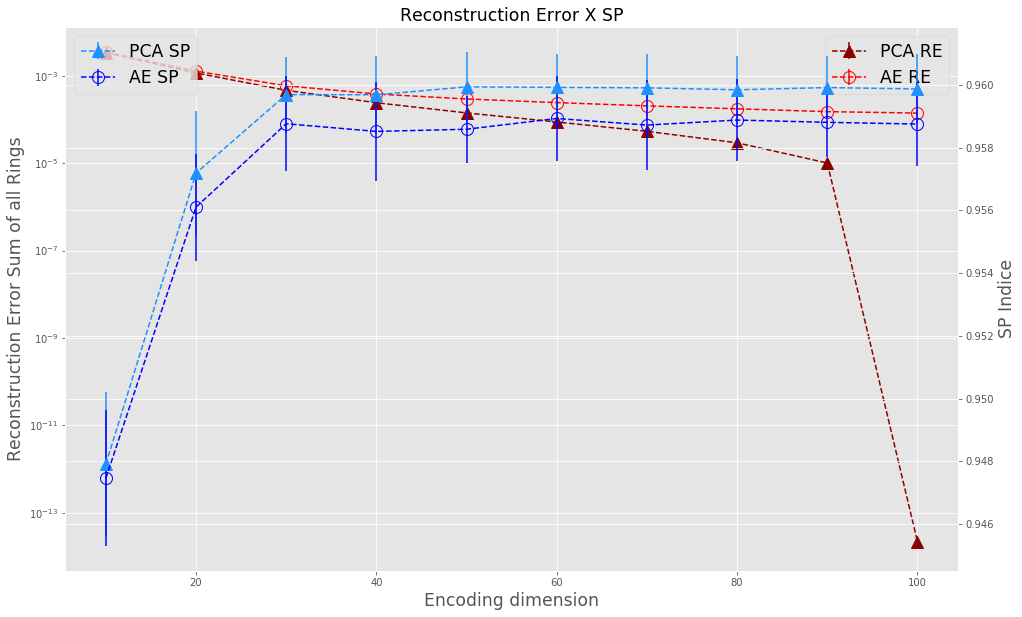

In [89]:
fig, ax = plt.subplots(figsize=(16,10))
ax2 = ax.twinx()
ax.errorbar(layer, pca_kl_all_mean,yerr=pca_kl_all_std, marker="^",color='darkred',markersize=12,linestyle='dashed', label='PCA RE')
ax.errorbar(layer, ae_kl_all_mean,yerr=ae_kl_all_std, marker='o', mfc='none',color='r',markersize=12,linestyle='dashed', label='AE RE')
ax2.errorbar(layers, pca_class_all_mean,yerr=pca_class_all_std, marker="^",color='dodgerblue',markersize=12,linestyle='dashed', label='PCA SP')
ax2.errorbar(layers, ae_class_all_mean,yerr=ae_class_all_std, marker='o', mfc='none',color='b',markersize=12,linestyle='dashed', label='AE SP')
ax.legend(loc='best', fontsize='xx-large')
ax2.legend(loc='best', fontsize='xx-large')
ax.set_ylabel('Reconstruction Error Sum of all Rings',fontsize='xx-large')
ax2.set_ylabel('SP Indice',fontsize='xx-large')
ax.set_xlabel('Encoding dimension',fontsize='xx-large')
plt.title("Reconstruction Error X SP",fontsize='xx-large')

ax.set_yscale('log')
#plt.grid()
plt.show()

In [82]:
pca_kl_all = pfmData[(pfmData.Model_name == 'N1-PCA') & (pfmData.Class == 'Background') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','Rings_Metrics_Sum']]
ae_kl_all = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'Background') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','Rings_Metrics_Sum']]

pca_kl_all_mean = pca_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].mean().values
pca_kl_all_std = pca_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].std().values

ae_kl_all_mean = ae_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].mean().values
ae_kl_all_std = ae_kl_all.groupby(['Layer'])['Rings_Metrics_Sum'].std().values

layers = ae_kl_all.groupby(['Layer'])['Layer'].mean().values

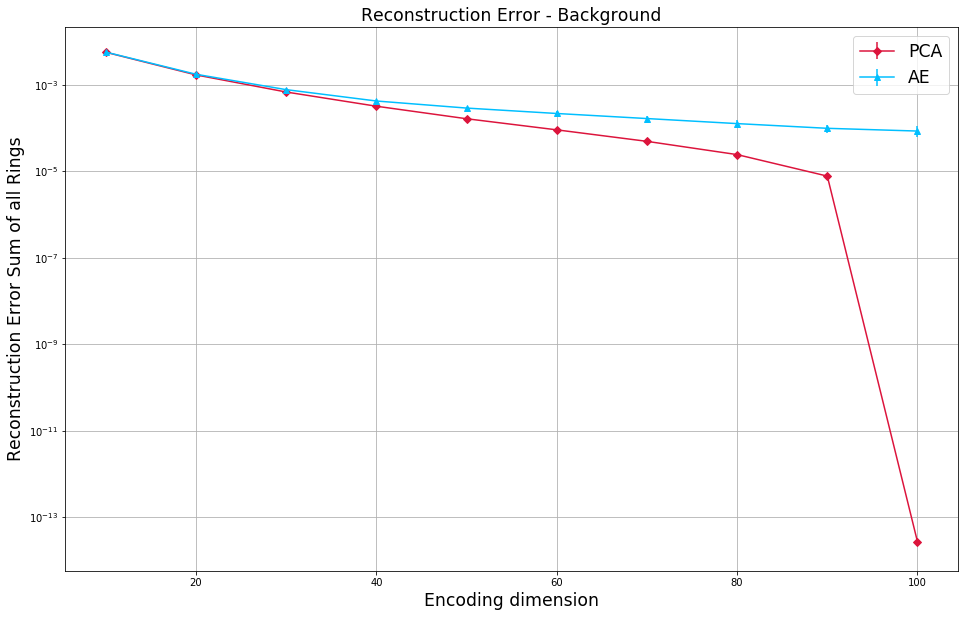

In [86]:
fig, ax = plt.subplots(figsize=(16,10))
ax2 = ax.twinx()
ax.errorbar(layer, pca_kl_all_mean,yerr=pca_kl_all_std, fmt='D-', color='crimson', label='PCA')
ax.errorbar(layer, ae_kl_all_mean,yerr=ae_kl_all_std, fmt='^-', color='deepskyblue', label='AE')
ax.legend(loc='best', fontsize='xx-large')
ax.set_ylabel('Reconstruction Error Sum of all Rings',fontsize='xx-large')
ax.set_xlabel('Encoding dimension',fontsize='xx-large')
ax.set_yscale('log')
plt.title("Reconstruction Error - Background",fontsize='xx-large')
plt.grid()
plt.show()

In [99]:
pfmData[(pfmData.Model_name == 'N1-PCA')]

id       Class       Model Model_name  Layer            time  \
3600  3971         All  N1-PCA_100     N1-PCA    100  20190115014325   
3601  3972      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3602  3973  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3603  3974         All  N1-PCA_100     N1-PCA    100  20190115014325   
3604  3975      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3605  3976  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3606  3977         All  N1-PCA_100     N1-PCA    100  20190115014325   
3607  3978      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3608  3979  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3609  3980         All  N1-PCA_100     N1-PCA    100  20190115014325   
3610  3981      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3611  3982         All  N1-PCA_100     N1-PCA    100  20190115014325   
3612  3983      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3613  3984  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3614  3985  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3615  3986         All  N1-PCA_100     N1-PCA    100  20190115014325   
3616  3987         All  N1-PCA_100     N1-PCA    100  20190115014325   
3617  3988      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3618  3989      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3619  3990  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3620  3991  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3621  3992         All  N1-PCA_100     N1-PCA    100  20190115014325   
3622  3993      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3623  3994  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3624  3995         All  N1-PCA_100     N1-PCA    100  20190115014325   
3625  3996      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3626  3997  Background  N1-PCA_100     N1-PCA    100  20190115014325   
3627  3998         All  N1-PCA_100     N1-PCA    100  20190115014325   
3628  3999      Signal  N1-PCA_100     N1-PCA    100  20190115014325   
3629  4000  Background  N1-PCA_100     N1-PCA    100  20190115014325   
...    ...         ...         ...        ...    ...             ...   
7170  7541         All   N1-PCA_10     N1-PCA     10  20190115031021   
7171  7542      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7172  7543  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7173  7544         All   N1-PCA_10     N1-PCA     10  20190115031021   
7174  7545      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7175  7546  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7176  7547         All   N1-PCA_10     N1-PCA     10  20190115031021   
7177  7548         All   N1-PCA_10     N1-PCA     10  20190115031021   
7178  7549      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7179  7550  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7180  7551      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7181  7552  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7182  7553         All   N1-PCA_10     N1-PCA     10  20190115031021   
7183  7554      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7184  7555  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7185  7556         All   N1-PCA_10     N1-PCA     10  20190115031021   
7186  7557      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7187  7558  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7188  7559         All   N1-PCA_10     N1-PCA     10  20190115031021   
7189  7560      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7190  7561  Background   N1-PCA_10     N1-PCA     10  20190115031021   
7191  7562         All   N1-PCA_10     N1-PCA     10  20190115031021   
7192  7563      Signal   N1-PCA_10     N1-PCA     10  20190115031021   
7193  7564  Background   N1-PCA_10     N1-PCA   

In [100]:
pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'Normalized_MI')][['Layer','ETotal']]

Layer        ETotal
3       100           NaN
19      100           NaN
50      100  4.470000e-08
77      100  5.050000e-08
110     100  3.160000e-08
157     100  4.080000e-08
185     100  3.800000e-08
205     100           NaN
288     100           NaN
289     100  0.000000e+00
363      90           NaN
381      90           NaN
414      90  4.470000e-08
442      90  4.590000e-08
473      90  3.490000e-08
520      90  4.470000e-08
551      90  3.800000e-08
568      90  2.580000e-08
626      90           NaN
642      90  1.050000e-08
723      80           NaN
737      80           NaN
768      80  4.080000e-08
831      80  4.210000e-08
848      80  4.710000e-08
882      80  2.790000e-08
912      80  4.590000e-08
929      80           NaN
962      80           NaN
966      80           NaN
...     ...           ...
2523     20           NaN
2556     20           NaN
2595     20  4.470000e-08
2611     20  2.580000e-08
2651     20  4.080000e-08
2682     20  3.940000e-08
2716     20  4.080000e-08
2769     20  2.360000e-08
2794     20  2.110000e-08
2847     20           NaN
2883     10  3.800000e-08
2919     10  4.470000e-08
2955     10           NaN
2967     10           NaN
2984     10  4.710000e-08
3063     10  4.210000e-08
3072     10  4.470000e-08
3090     10           NaN
3171     10  3.330000e-08
3207     10           NaN
3243     60           NaN
3262     60           NaN
3294     60  4.470000e-08
3318     60  5.160000e-08
3364     60  3.940000e-08
3399     60  4.590000e-08
3435     60  4.470000e-08
3469     60           NaN
3515     60           NaN
3518     60           NaN

[100 rows x 2 columns]

In [132]:
kl_tot = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','ETotal']]
kl_PS = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','PS']]
kl_EM1 = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','EM1']]
kl_EM2 = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','EM2']]
kl_EM3 = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','EM3']]
kl_EM = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','EM']]
kl_HAD1 = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','HAD1']]
kl_HAD2 = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','HAD2']]
kl_HAD3 = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','HAD3']]
kl_HAD = pfmData[(pfmData.Model_name == 'N1-AE') & (pfmData.Class == 'All') & (pfmData.Normed == 'yes') & (pfmData.Measure == 'MSE')][['Layer','HAD']]


kl_tot_mean = kl_tot.groupby(['Layer'])['ETotal'].mean().values
kl_tot_std = kl_tot.groupby(['Layer'])['ETotal'].std().values
kl_PS_mean = kl_PS.groupby(['Layer'])['PS'].mean().values
kl_PS_std = kl_PS.groupby(['Layer'])['PS'].std().values
kl_EM1_mean = kl_EM1.groupby(['Layer'])['EM1'].mean().values
kl_EM1_std = kl_EM1.groupby(['Layer'])['EM1'].std().values
kl_EM2_mean = kl_EM2.groupby(['Layer'])['EM2'].mean().values
kl_EM2_std = kl_EM2.groupby(['Layer'])['EM2'].std().values
kl_EM3_mean = kl_EM3.groupby(['Layer'])['EM3'].mean().values
kl_EM3_std = kl_EM3.groupby(['Layer'])['EM3'].std().values
kl_EM_mean = kl_EM.groupby(['Layer'])['EM'].mean().values
kl_EM_std = kl_EM.groupby(['Layer'])['EM'].std().values
kl_HAD1_mean = kl_HAD1.groupby(['Layer'])['HAD1'].mean().values
kl_HAD1_std = kl_HAD1.groupby(['Layer'])['HAD1'].std().values
kl_HAD2_mean = kl_HAD2.groupby(['Layer'])['HAD2'].mean().values
kl_HAD2_std = kl_HAD2.groupby(['Layer'])['HAD2'].std().values
kl_HAD3_mean = kl_HAD3.groupby(['Layer'])['HAD3'].mean().values
d = kl_HAD3.groupby(['Layer'])['HAD3'].std().values
kl_HAD_mean = kl_HAD.groupby(['Layer'])['HAD'].mean().values
kl_HAD_std = kl_HAD.groupby(['Layer'])['HAD'].std().values

neurons = kl_tot.groupby(['Layer'])['Layer'].mean().values

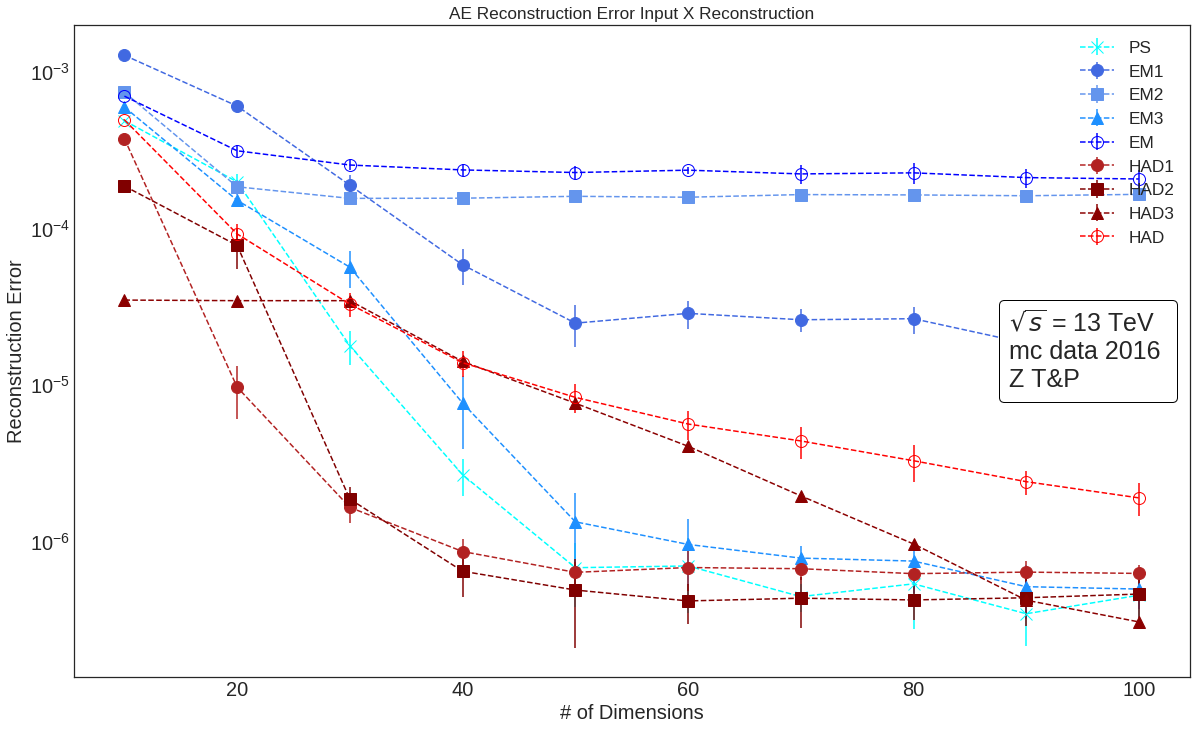

In [134]:
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
fig, ax1 = plt.subplots(figsize=(20, 12))
#ax2 = ax1.twinx()
#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)
plt.style.use('seaborn-white')
#plt.plot(neurons,kl_mean)

#ax1.errorbar(neurons, y=kl_tot_mean, yerr=kl_tot_std,marker=".",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_PS_mean, yerr=kl_PS_std,marker="x",color='cyan',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM1_mean, yerr=kl_EM1_std,marker="o",color='royalblue',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM2_mean, yerr=kl_EM2_std,marker="s",color='cornflowerblue',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM3_mean, yerr=kl_EM3_std,marker="^",color='dodgerblue',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM_mean, yerr=kl_EM_std,marker='o', mfc='none',color='b',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD1_mean, yerr=kl_HAD1_std,marker="o",color='firebrick',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD2_mean, yerr=kl_HAD2_std,marker="s",color='maroon',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD3_mean, yerr=kl_HAD3_std,marker="^",color='darkred',markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD_mean, yerr=kl_HAD_std,marker='o', mfc='none',color='r',markersize=12,linestyle='dashed')

#ax2.errorbar(neurons, y=sp, yerr=sp_std,color='black',markersize=12)

#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title(r"""AE Reconstruction Error Input X Reconstruction""",fontsize= 'xx-large')
ax1.set_ylabel(r"""Reconstruction Error""",fontsize=20)

#ax2.set_ylabel(r"$\'Indice$ SP",fontsize=20)
ax1.set_xlabel(r"# of Dimensions",fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)

#ax1.legend(['ETotal','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')
ax1.legend(['PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')
#ax2.legend(['SP'], loc='center right',fontsize = 'xx-large')
#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

#at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\n\nPd 97.15 $\pm$0.43\nSP 96.12 $\pm$0.39\nPf 4.90 $\pm$0.55\n\nFine-Tuning\nPd 98.04 $\pm$0.28\nSP 96.96 $\pm$0.17\nPf 4.12 $\pm$0.38 ",
#                  loc=4, 
#                  )
at = AnchoredText(r'$\sqrt{s}$ = 13 TeV'+"\nmc data 2016 \nZ T&P",
                  prop=dict(size=25), frameon=True,
                  loc=5, 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)
ax1.set_yscale('log')


import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

#plt.grid(linestyle='-', linewidth=0.5)

#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')

#ax1.set_xlim(1, 100)
#ax2.set_ylim(96, 97.2)
plt.show()
#fig.savefig(dirout+'reconstruction_mutual_info_comparsion2.png')
#fig.savefig(dirout+'reconstruction.png')

In [135]:
weights = np.load('/home/caducovas/N1-AE_60_20190116132038_sort_0.npz')



In [186]:
weights['weights'][0][1]

array([ 0.02157689,  0.01484125, -0.02004779,  0.01509378, -0.01874559,
        0.01363615, -0.02513581, -0.00708895,  0.00574676, -0.00453941,
       -0.02441419, -0.02141735,  0.0022854 , -0.00853776,  0.00988976,
       -0.02057367, -0.01884825, -0.00519651,  0.00478834,  0.02742535,
       -0.01366265, -0.01623535, -0.01078574, -0.01100797,  0.01745102,
        0.01994315,  0.00291658, -0.0248541 , -0.01341468,  0.0213725 ,
        0.02189895, -0.01606986, -0.01271355, -0.01580653,  0.00835529,
        0.01969089,  0.01895257, -0.00265376, -0.01607037,  0.01051539,
        0.00671486,  0.01552337,  0.01931773,  0.02955566, -0.02075855,
       -0.00300041,  0.01522534,  0.01671345, -0.0244571 ,  0.0172853 ,
       -0.01359577,  0.00949686, -0.02137823, -0.01093202, -0.01323699,
        0.01959069,  0.01747051, -0.00222821,  0.0099243 ,  0.01226566],
      dtype=float32)

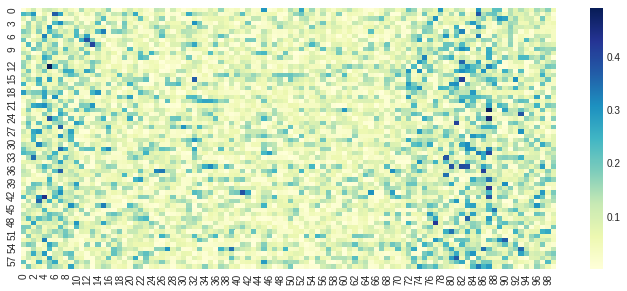

In [176]:
import seaborn as sb
    
sb.heatmap(abs(weights['weights'][0][0].T), annot=False, cmap = 'YlGnBu', vmin = abs(weights['weights'][0][0]).min(), vmax = abs(weights['weights'][0][0]).max())

In [29]:
#pca_kl_all_mean = np.mean(pca_kl_all,axis=1)
#pca_kl_all_std = np.std(pca_kl_all,axis=1)

#ae_kl_all_mean = np.mean(ae_kl_all,axis=1)
#ae_kl_all_std = np.std(ae_kl_all,axis=1)

In [34]:
layer

array([[100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 90.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 80.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 70.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 30.],
       [ 30.],
       [ 30.],
       [ 30.],
       [ 30.],
       [ 30.],
       [ 3

In [7]:
loaded.keys()
loaded['iEnergy'].shape,loaded['rEnergy'].shape

((22833, 100), (22833, 100))

In [8]:
X=b
centered_matrix = X - X.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

NameError: name 'b' is not defined

In [9]:
b,r = loaded['iEnergy'],loaded['rEnergy']

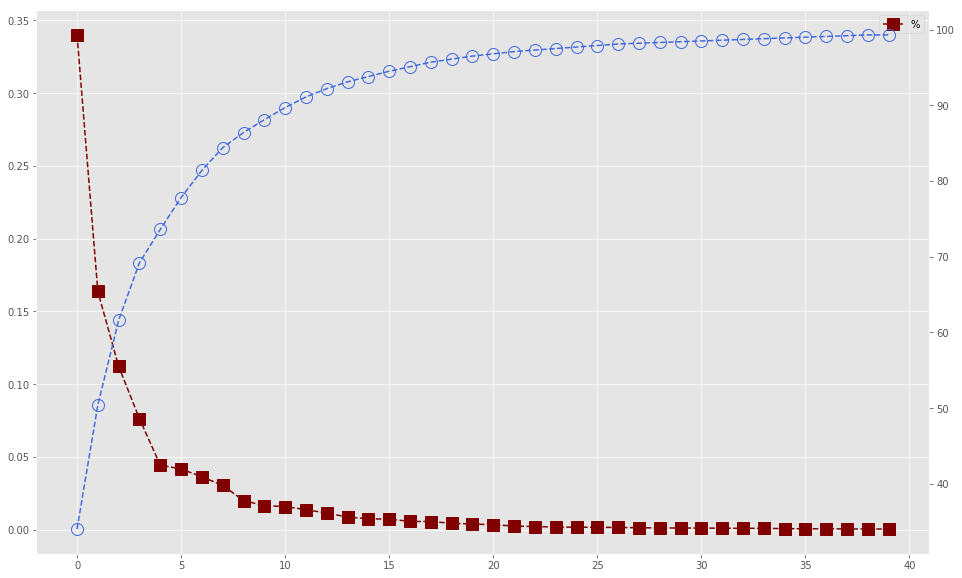

In [28]:
plot_scree(40,b)

In [59]:
def plot_scree(dim,data):
    plt.style.use('ggplot')
    from sklearn.decomposition import PCA
    fig, ax = plt.subplots(figsize=(16,10))
    ax2 = ax.twinx()
    pca = PCA(n_components=dim)
    pca.fit(data)
    ax.plot(pca.explained_variance_ratio_,marker="s",color='maroon',markersize=12,linestyle='dashed')
    #ax.bar(pca.explained_variance_ratio_, color)
    ax.set_ylabel('% Variance Explained',fontsize='xx-large')
    ax2.set_ylabel('% Cumulative Sum of Variance Explained',fontsize='xx-large')
    ax.set_xlabel('Encoded Dimensions',fontsize='xx-large')
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    ax2.plot(var,color='royalblue',marker='o', mfc='none',markersize=12,linestyle='dashed')
    #ax.legend(['All','Signal','Background'], loc='best', fontsize='xx-large')
    plt.title("PCA-40 Scree Plot")
    ax.legend("Variance Explained",loc=2)
    ax2.legend("Cumulative Sum of Variance Explained",loc=1)
    plt.grid()
    plt.show()

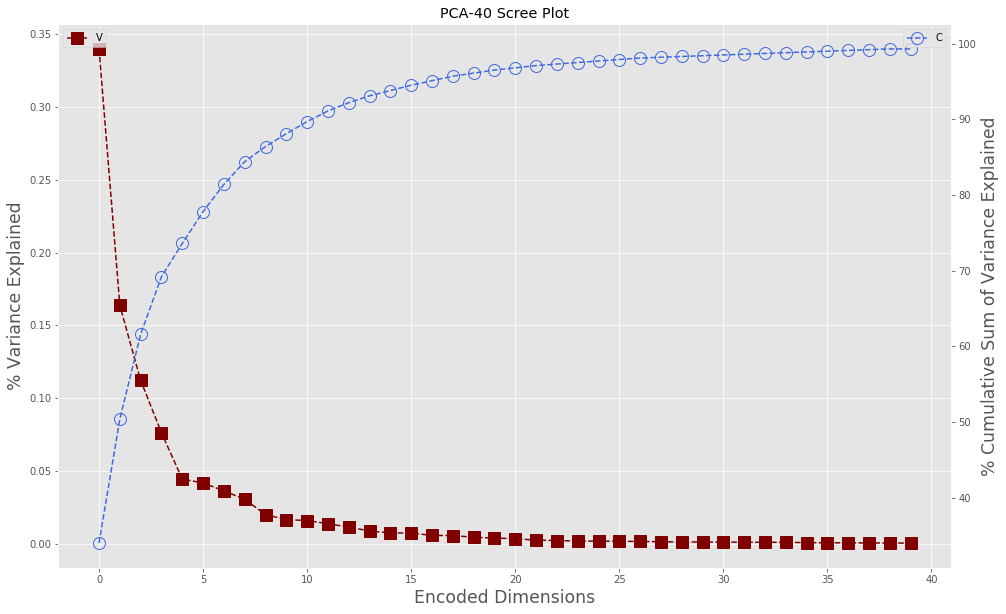

In [60]:
plot_scree(40,b)

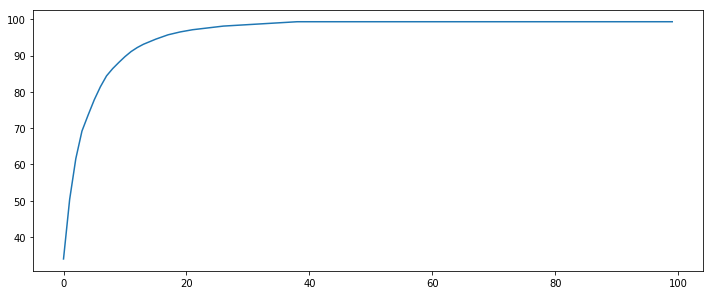

In [11]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100))

In [444]:
a=((b-r)**2)

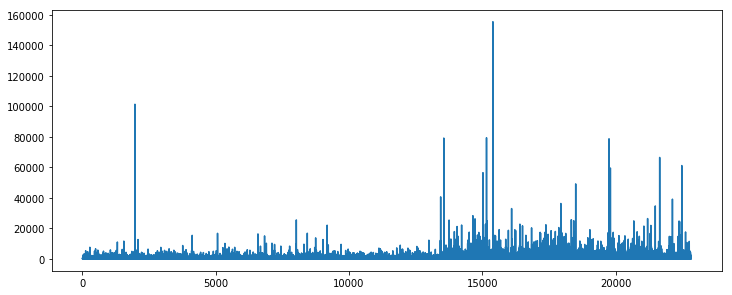

In [454]:
plt.plot(a[:,55])

In [189]:
a=weights['weights'][0][1]

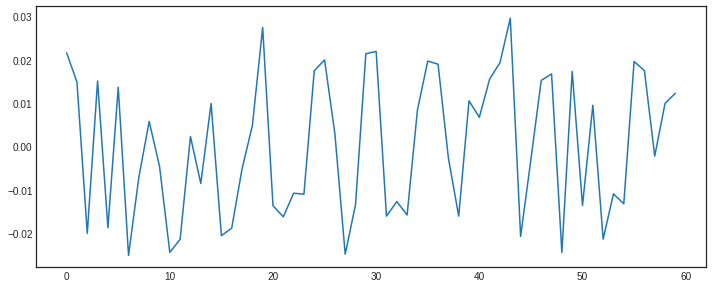

In [190]:
plt.plot(a)

In [194]:
GridStrategy.get_grid(40)

(6, 6, 5, 6, 5, 6, 6)

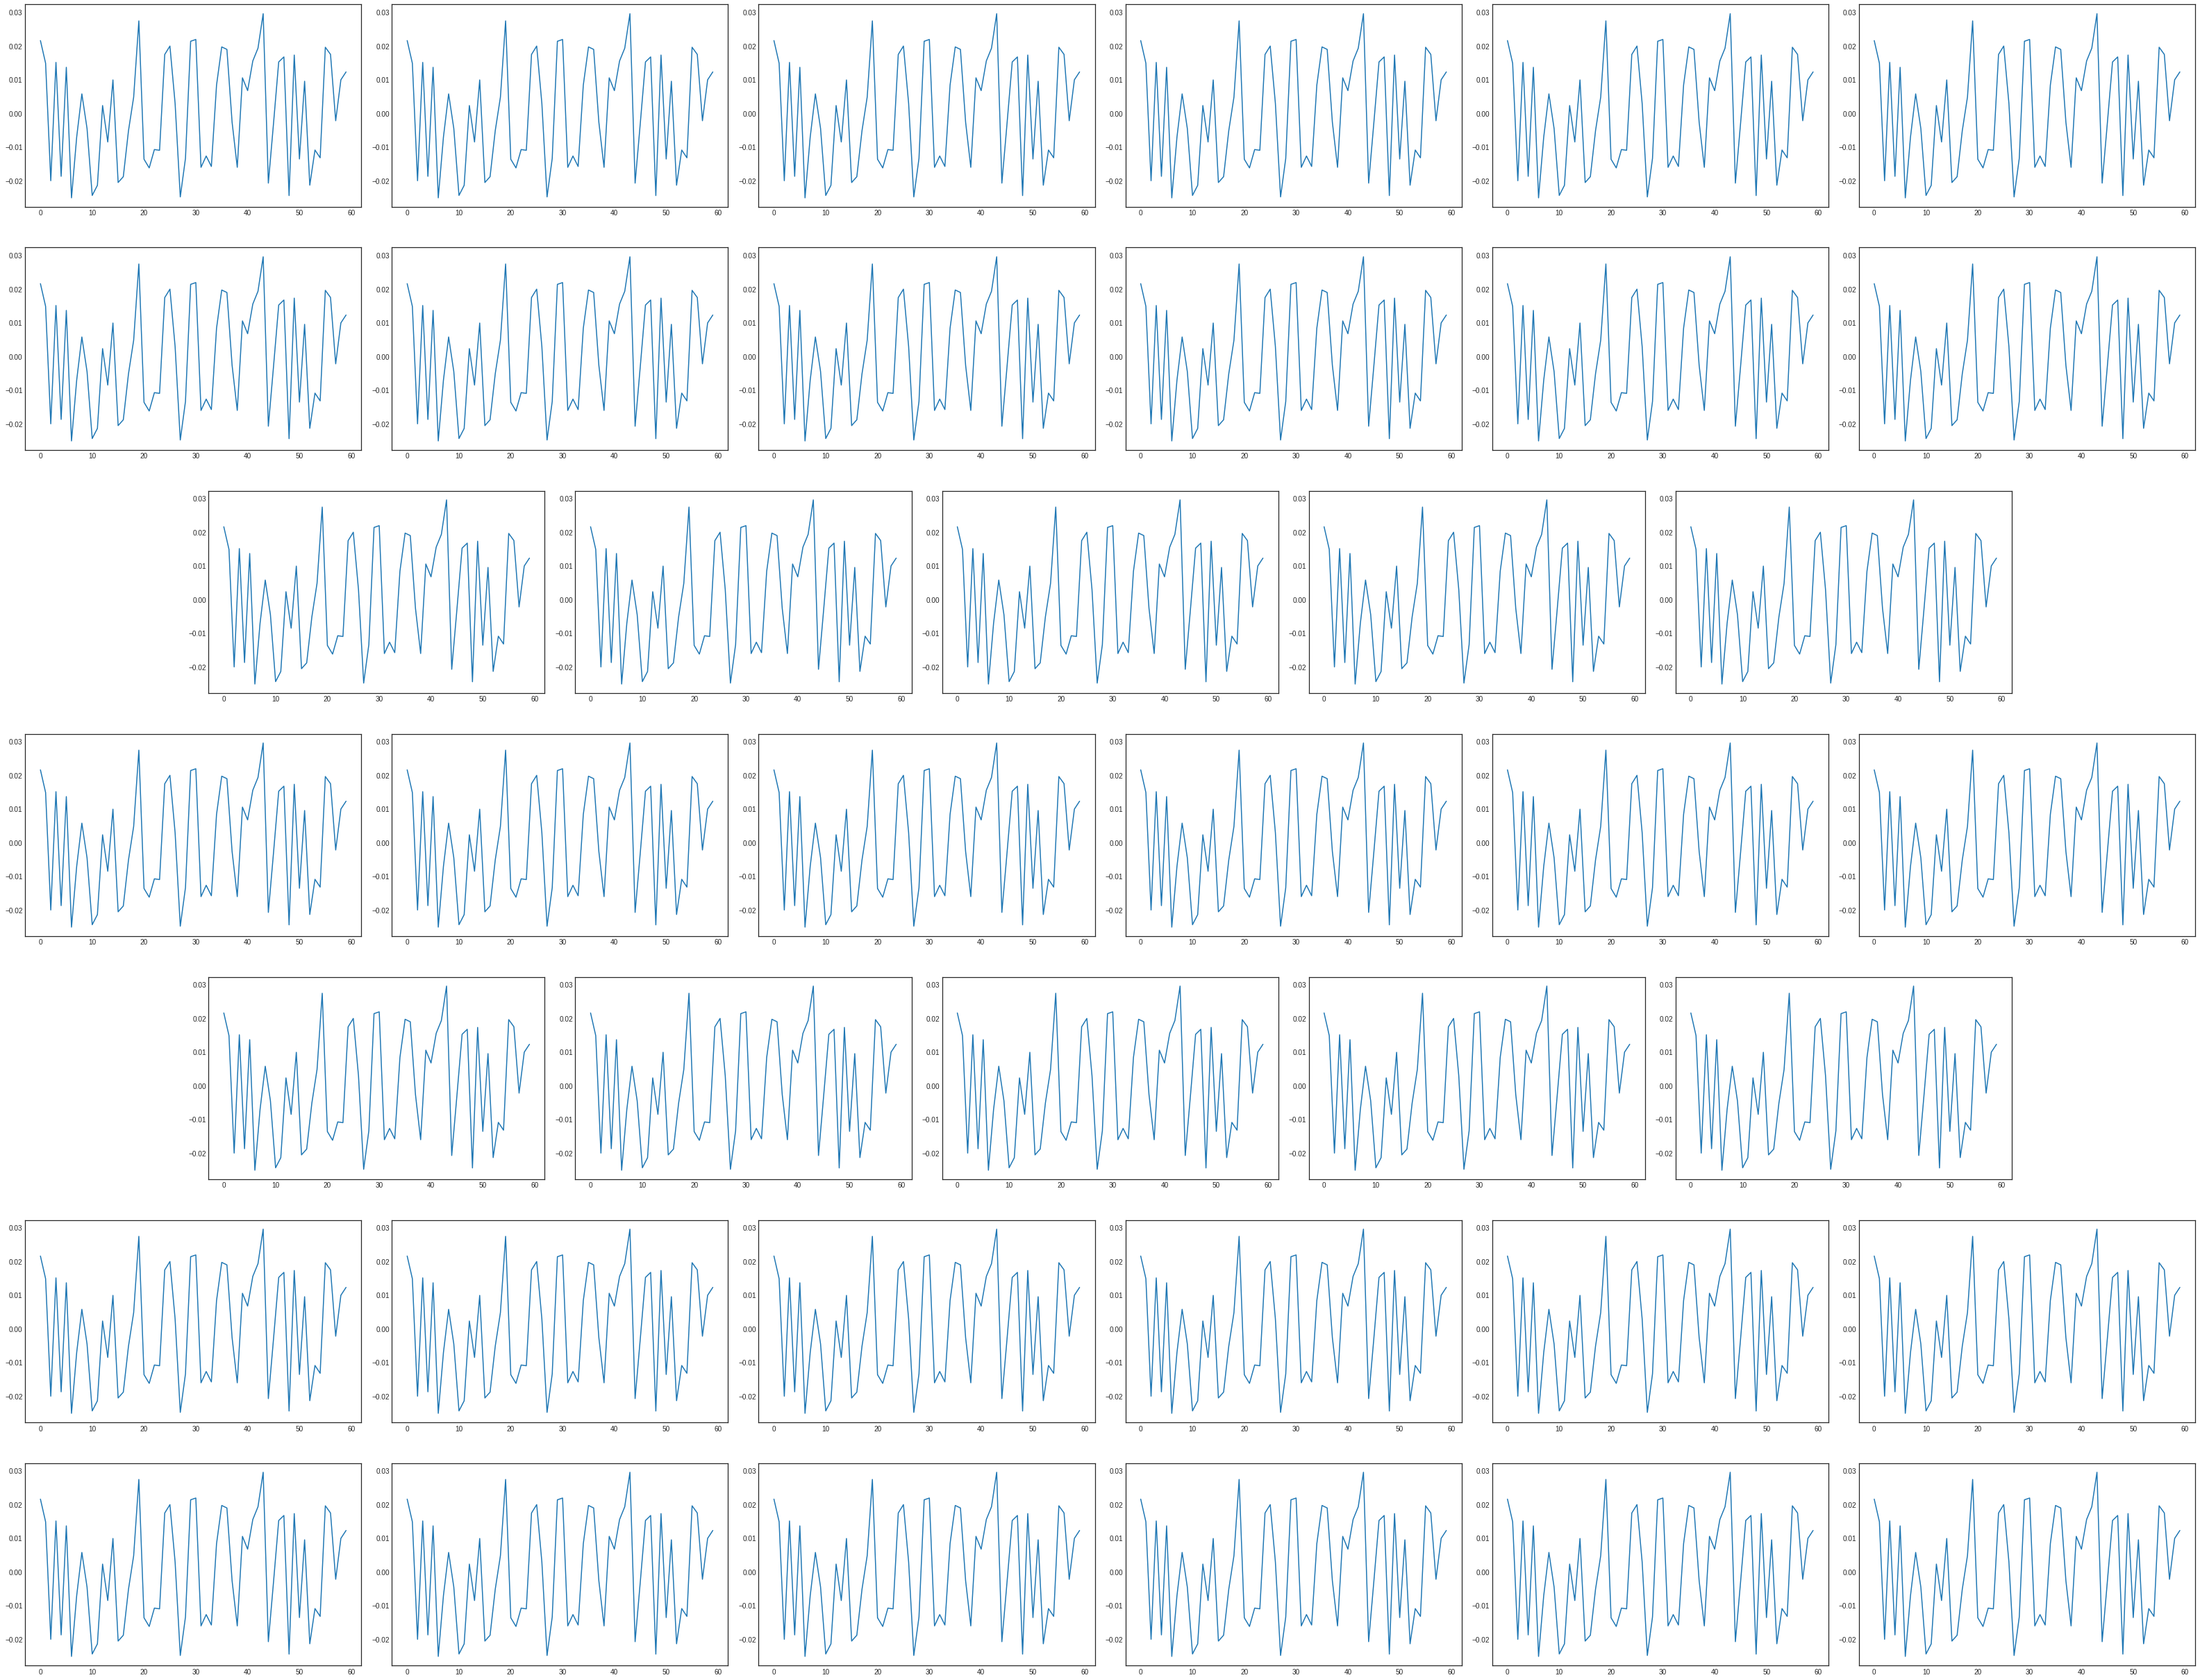

In [202]:
fig = plt.figure(figsize=(56, 44))

grid_arrangement = GridStrategy.get_grid(40)
ax_specs = get_gridspec(grid_arrangement)

for i, spec in enumerate(ax_specs):
    ax = fig.add_subplot(plt.Subplot(fig, spec))
    ax.plot(a)

In [197]:
import itertools as it
import os
import numpy as np
from matplotlib import gridspec

class GridStrategy:
    """
    Static class used to compute grid arrangements given the number of subplots
    you want to show. By default, it goes for a symmetrical arrangement that is
    nearly square (nearly equal in both dimensions).
    """
    SPECIAL_CASES = {3: (2, 1),
                     5: (2, 3)}

    @classmethod
    def get_grid(cls, n):
        """
        Return an arrangement of rows containing ``n`` axes that is as close to
        square as looks good.

        :param n:
            The number of plots in the subplot

        :return:
            Returns a  :class:`tuple` of length ``nrows``, where each element
            represents the number of plots in that row, so for example a 3 x 2
            grid would be represented as ``(3, 3)``, because there are 2 rows
            of length 3.


        Example:
        --------
        .. code::

            >>> GridStrategy.get_grid(7)
            (2, 3, 2)
            >>> GridStrategy.get_grid(6)
            (3, 3)
        """
        if n in cls.SPECIAL_CASES:
            return cls.SPECIAL_CASES[n]

        # May not work for very large n
        n_sqrtf = np.sqrt(n)
        n_sqrt = int(np.ceil(n_sqrtf))

        if n_sqrtf == n_sqrt:
            # Perfect square, we're done
            x, y = n_sqrt, n_sqrt
        elif n <= n_sqrt * (n_sqrt - 1):
            # An n_sqrt x n_sqrt - 1 grid is close enough to look pretty
            # square, so if n is less than that value, will use that rather
            # than jumping all the way to a square grid.
            x, y = n_sqrt, n_sqrt - 1
        elif not (n_sqrt % 2) and n % 2:
            # If the square root is even and the number of axes is odd, in
            # order to keep the arrangement horizontally symmetrical, using a
            # grid of size (n_sqrt + 1 x n_sqrt - 1) looks best and guarantees
            # symmetry.
            x, y = (n_sqrt + 1, n_sqrt - 1)
        else:
            # It's not a perfect square, but a square grid is best
            x, y = n_sqrt, n_sqrt

        if n == x * y:
            # There are no deficient rows, so we can just return from here
            return tuple(x for i in range(y))

        # If exactly one of these is odd, make it the rows
        if (x % 2) != (y % 2) and (x % 2):
            x, y = y, x

        return cls.arrange_rows(n, x, y)

    @classmethod
    def arrange_rows(cls, n, x, y):
        """
        Given a grid of size (``x`` x ``y``) to be filled with ``n`` plots,
        this arranges them as desired.

        :param n:
            The number of plots in the subplot.

        :param x:
            The number of columns in the grid.

        :param y:
            The number of rows in the grid.

        :return:
            Returns a :class:`tuple` containing a grid arrangement, see
            :func:`get_grid` for details.
        """
        part_rows = (x * y) - n
        full_rows = y - part_rows

        f = (full_rows, x)
        p = (part_rows, x - 1)

        # Determine which is the more and less frequent value
        if full_rows >= part_rows:
            size_order = f, p
        else:
            size_order = p, f

        # ((n_more, more_val), (n_less, less_val)) = size_order
        args = it.chain.from_iterable(size_order)

        if y % 2:
            return cls.stripe_odd(*args)
        else:
            return cls.stripe_even(*args)

    @classmethod
    def stripe_odd(cls, n_more, more_val, n_less, less_val):
        """
        Prepare striping for an odd number of rows.

        :param n_more:
            The number of rows with the value that there's more of

        :param more_val:
            The value that there's more of

        :param n_less:
            The number of rows that there's less of

        :param less_val:
            The value that there's less of

        :return:
            Returns a :class:`tuple` of striped values with appropriate buffer.
        """
        (n_m, m_v) = n_more, more_val
        (n_l, l_v) = n_less, less_val

        # Calculate how much "buffer" we need.
        # Example (b = buffer number, o = outer stripe, i = inner stripe)
        #    4, 4, 5, 4, 4 -> b, o, i, o, b  (buffer = 1)
        #    4, 5, 4, 5, 4 -> o, i, o, i, o  (buffer = 0)
        n_inner_stripes = n_l
        n_buffer = (n_m + n_l) - (2 * n_inner_stripes + 1)
        assert n_buffer % 2 == 0, (n_more, n_less, n_buffer)
        n_buffer //= 2

        buff_tuple = (m_v, ) * n_buffer
        stripe_tuple = (m_v, l_v) * n_inner_stripes + (m_v, )

        return buff_tuple + stripe_tuple + buff_tuple

    @classmethod
    def stripe_even(cls, n_more, more_val, n_less, less_val):
        """
        Prepare striping for an even number of rows.

        :param n_more:
            The number of rows with the value that there's more of

        :param more_val:
            The value that there's more of

        :param n_less:
            The number of rows that there's less of

        :param less_val:
            The value that there's less of

        :return:
            Returns a :class:`tuple` of striped values with appropriate buffer.
        """
        total = n_more + n_less
        if total % 2:
            msg = ('Expected an even number of values, ' +
                   'got {} + {}').format(n_more, n_less)
            raise ValueError(msg)

        assert n_more >= n_less, (n_more, n_less)

        # See what the minimum unit cell is
        n_l_c, n_m_c = n_less, n_more
        num_div = 0
        while True:
            n_l_c, lr = divmod(n_l_c, 2)
            n_m_c, mr = divmod(n_m_c, 2)
            if lr or mr:
                break

            num_div += 1

        # Maximum number of times we can half this to get a "unit cell"
        n_cells = 2 ** num_div

        # Make the largest possible odd unit cell
        cell_s = total // n_cells            # Size of a unit cell

        cell_buff = int(cell_s % 2 == 0)     # Buffer is either 1 or 0
        cell_s -= cell_buff
        cell_nl = n_less // n_cells
        cell_nm = cell_s - cell_nl

        if cell_nm == 0:
            stripe_cell = (less_val, )
        else:
            stripe_cell = cls.stripe_odd(cell_nm, more_val, cell_nl, less_val)

        unit_cell = ((more_val, ) * cell_buff + stripe_cell)

        if num_div == 0:
            return unit_cell

        stripe_out = unit_cell * (n_cells // 2)
        return tuple(reversed(stripe_out)) + stripe_out


def get_gridspec(grid_arrangement):
    nrows = len(grid_arrangement)
    ncols = max(grid_arrangement)

    if len(set(grid_arrangement)) > 1:
        col_width = 2
    else:
        col_width = 1

    gs = gridspec.GridSpec(nrows, ncols * col_width)

    ax_specs = []
    for r, row_cols in enumerate(grid_arrangement):
        # This is the number of missing columns in this row. If this number is
        # ever anything other than 0, col_width will be 2, meaning each axis
        # takes up two spots in the row. If you skip one slot for each column,
        # an equal number of slots will be missing at the end.
        skip = ncols - row_cols

        for col in range(row_cols):
            s = skip + col * col_width
            e = s + col_width

            ax_specs.append(gs[r, s:e])

    return ax_specs


def test_grid_arrangement(n):
    fig = plt.figure(figsize=(8, 6))

    grid_arrangement = GridStrategy.get_grid(n)
    ax_specs = get_gridspec(grid_arrangement)

    for i, spec in enumerate(ax_specs):
        ax = fig.add_subplot(plt.Subplot(fig, spec))

        ax.text(0.5, 0.5, "Axis: {}".format(i), color='white',
                fontweight='bold', va="center", ha="center")
        ax.tick_params(axis='both', bottom='off', top='off', left='off',
                       right='off', labelbottom='off', labelleft='off')

        ax.patch.set_facecolor('#2E2E2E')

    return fig


def output_demos(output_dir='grid_demo'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i in list(range(1, 20)) + [31, 34, 58, 62]:
        f = test_grid_arrangement(i)
        f.suptitle('n = {}'.format(i), fontweight='bold', fontsize=18)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        f.savefig('grid_demo/grid_arrangement{:02d}.png'.format(i),
                  transparent=False)
        plt.close(f)


def run_tests():
    col_vals = [
        ( 2, (2,)),
        ( 3, (2, 1)),
        ( 4, (2, 2)),
        ( 5, (2, 3)),
        ( 6, (3, 3)),
        ( 7, (2, 3, 2)),
        ( 8, (3, 2, 3)),
        ( 9, (3, 3, 3)),
        (10, (3, 4, 3)),
        (11, (4, 3, 4)),
        (12, (4, 4, 4)),
        (13, (4, 5, 4)),
        (14, (3, 4, 4, 3)),
        (15, (5, 5, 5)),
        (16, (4, 4, 4, 4)),
        (17, (3, 4, 3, 4, 3)),
        (18, (4, 3, 4, 3, 4)),
        (31, (6, 6, 7, 6, 6)),
        (34, (6, 5, 6, 6, 5, 6)),
        (58, (7, 8, 7, 7, 7, 7, 8, 7)),
        (94, (9, 10, 9, 10, 9, 9, 10, 9, 10, 9)),
    ]

    for n, expt in col_vals:
        rv = GridStrategy.get_grid(n)
        assert rv == expt, (n, [rv, expt])

    print('All tests passed')



(array([1.9675e+04, 2.0060e+03, 5.8200e+02, 2.1900e+02, 1.0500e+02,
        6.3000e+01, 3.9000e+01, 3.6000e+01, 2.1000e+01, 1.8000e+01,
        1.1000e+01, 1.7000e+01, 4.0000e+00, 5.0000e+00, 6.0000e+00,
        2.0000e+00, 7.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

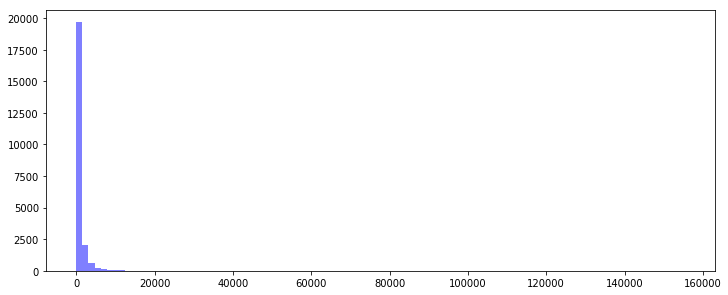

In [453]:
#((b-r)**2).shape
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(a[:,55], bins=100, alpha=.5, color='b', label='Signal')
#plt.xscale('log')

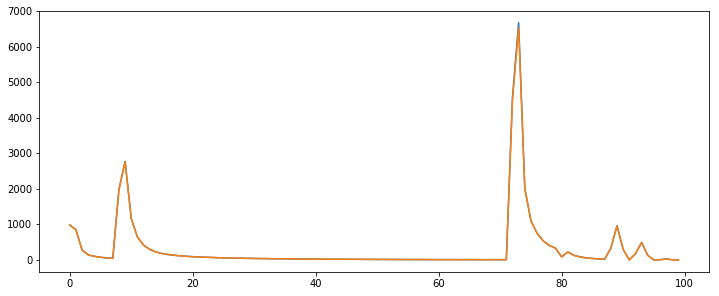

In [75]:
plt.plot(np.mean(b,axis=0))
plt.plot(np.mean(r,axis=0))

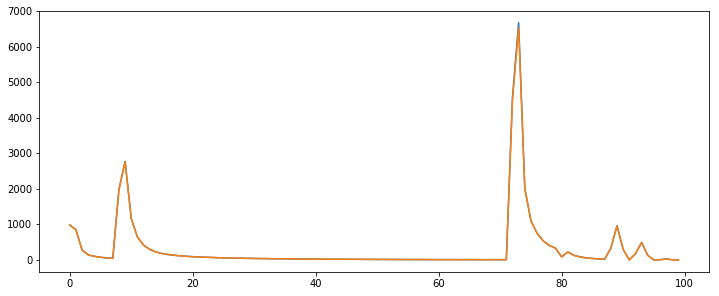

In [73]:
plt.plot(np.mean(loaded['iEnergy'],axis=0))
plt.plot(np.mean(loaded['rEnergy'],axis=0))

In [258]:
kl[96]

0.6289162824664817

In [274]:
rings=55
x,y = b[:,rings],r[:,rings]
max_value = max(max(x),max(y))
min_value = min(min(x),min(y))
bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
bins_list = np.linspace(min_value, max_value, num=bins)
p,phist_bins=np.histogram(x,bins_list)
q,qhist_bins=np.histogram(y,bins_list)

In [275]:
pqhistbins =list(phist_bins)
pqhistbins.pop()

1490.35400390625

AttributeError: Unknown property name

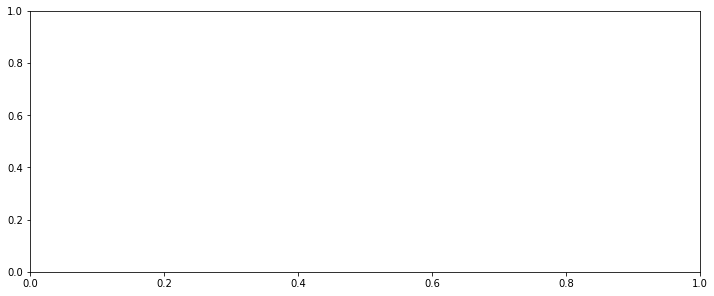

In [281]:
plt.plot(pqhistbins,p,name='p')
plt.plot(pqhistbins,q,name='q')
plt.legend()

(array([1.19638855e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.19638855e-05, 0.00000000e+00,
        0.00000000e+00, 1.19638855e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.19638855e-05,
        0.00000000e+00, 1.19638855e-05, 0.00000000e+00, 1.19638855e-05,
        1.19638855e-05, 0.00000000e+00, 1.19638855e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.78555418e-05, 5.98194273e-05,
        2.39277709e-05, 2.39277709e-05, 3.58916564e-05, 4.78555418e-05,
        9.57110837e-05, 1.07674969e-04, 1.43566625e-04, 4.78555418e-05,
        1.79458282e-04, 1.79458282e-04, 1.43566625e-04, 3.34988793e-04,
        4.30699876e-04, 6.46049815e-04, 6.34085929e-04, 8.13544211e-04,
        8.37471982e-04, 1.13656912e-03, 1.78261893e-03, 1.926185

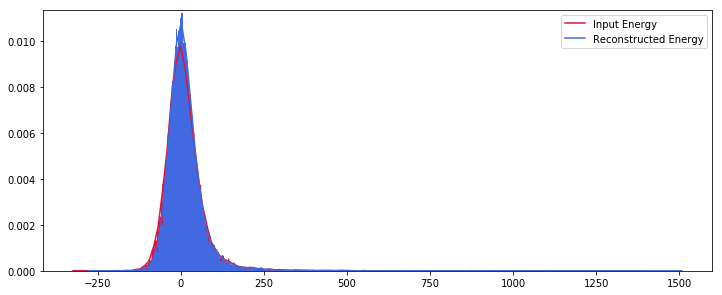

In [278]:
rings=55
sb.kdeplot(b[:,rings],label="Input Energy",color='crimson')
sb.kdeplot(r[:,rings],label="Reconstructed Energy",color='royalblue')
nbins = len(np.histogram(b[:,rings],'fd')[0])
plt.hist(b[:,rings], bins=nbins, normed=True,color='crimson',histtype='stepfilled')
nbins = len(np.histogram(r[:,rings],'fd')[0])
plt.hist(r[:,rings], bins=nbins, normed=True,color='royalblue')

In [273]:
pqhistbins

[-601.66748046875,
 -600.4831533509426,
 -599.2988262331354,
 -598.114499115328,
 -596.9301719975208,
 -595.7458448797134,
 -594.5615177619061,
 -593.3771906440988,
 -592.1928635262915,
 -591.0085364084842,
 -589.8242092906769,
 -588.6398821728695,
 -587.4555550550623,
 -586.2712279372549,
 -585.0869008194477,
 -583.9025737016403,
 -582.718246583833,
 -581.5339194660257,
 -580.3495923482184,
 -579.1652652304111,
 -577.9809381126038,
 -576.7966109947964,
 -575.6122838769892,
 -574.4279567591818,
 -573.2436296413746,
 -572.0593025235672,
 -570.8749754057599,
 -569.6906482879526,
 -568.5063211701453,
 -567.321994052338,
 -566.1376669345307,
 -564.9533398167233,
 -563.7690126989161,
 -562.5846855811087,
 -561.4003584633015,
 -560.2160313454941,
 -559.0317042276868,
 -557.8473771098795,
 -556.6630499920722,
 -555.4787228742649,
 -554.2943957564576,
 -553.1100686386502,
 -551.925741520843,
 -550.7414144030356,
 -549.5570872852284,
 -548.372760167421,
 -547.1884330496136,
 -546.0041059318064,

In [270]:
pk = asarray(pk)
pk = 1.0*pk / np.sum(pk, axis=0)
if qk is None:
    vec = entr(pk)
else:
    qk = asarray(qk)
    if len(qk) != len(pk):
        raise ValueError("qk and pk must have same length.")
    qk = 1.0*qk / np.sum(qk, axis=0)
    vec = rel_entr(pk, qk)
    S = np.sum(vec, axis=0)


array([0, 0, 0, ..., 0, 0, 0])

In [268]:
import math
S = sum(p * math.log(p / q), axis=0)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


TypeError: only size-1 arrays can be converted to Python scalars

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


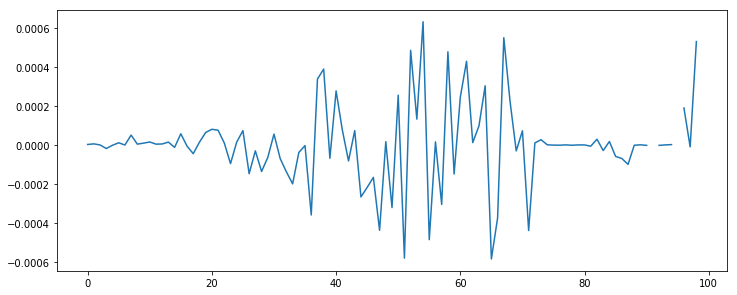

In [433]:

a=(np.mean(b,axis=0) - np.mean(r,axis=0))/(np.std(b,axis=0))**2
plt.plot(a)

In [437]:
np.concatenate((r,b),axis=1).shape

(22833, 200)

In [425]:
xx=(r-b)/np.std(b,axis=0)
xx

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


array([[-6.96825387e-04, -1.15420185e-02,  3.03654597e-05, ...,
         3.53499763e-02, -2.61651695e-01,             inf],
       [-1.93176104e-03,  2.43588653e-03,  9.56205127e-04, ...,
        -9.10966992e-05, -1.32032260e-01,            -inf],
       [-7.00090313e-03, -3.16805177e-04,  3.11275187e-04, ...,
         1.04643488e-02, -8.51823017e-02,             inf],
       ...,
       [-2.16252613e-03, -8.66073556e-03,  9.87242721e-03, ...,
         2.15968117e-02,  2.82725263e-02,             inf],
       [ 3.06148489e-04, -1.06960384e-03,  6.86124945e-03, ...,
         1.17796706e-02, -1.66337751e-02,             inf],
       [-2.45773466e-03, -1.97976944e-03,  4.04424686e-03, ...,
        -3.78986336e-02,  7.92780295e-02,             inf]], dtype=float32)

In [395]:
import scipy.stats
from sklearn.metrics import mean_squared_error
im=[]
kl=[]
chi=[]
corr=[]
mse=[]
for rings in range(100):
    try:
        rr = calc_MI2(b[:,rings],r[:,rings])
        mi_score = 100*round(np.sqrt(1. - np.exp(-2 * rr)),4)
        kl_score = calc_kl(b[:,rings],r[:,rings])
        chi_score,chi_pvalue =calc_chisquare(b[:,rings],r[:,rings])
        corr_score,corr_pvalue= scipy.stats.pearsonr(b[:,rings],r[:,rings])
        mse_score = mean_squared_error(b[:,rings],r[:,rings])
        im.append(mi_score)
        kl.append(kl_score)
        chi.append(chi_score)
        corr.append(corr_score)
        mse.append(mse_score)
    except:
        im.append(None)
        kl.append(None)
        chi.append(None)
        corr.append(None)
        mse.append(None)

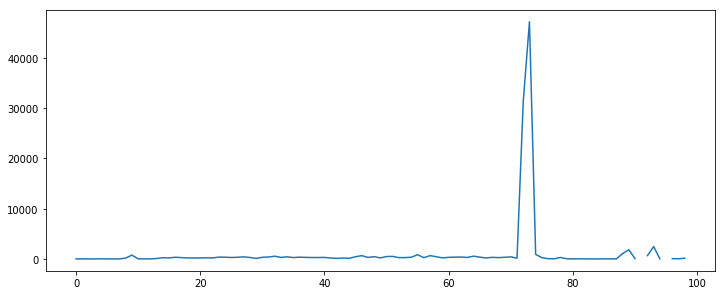

In [397]:
plt.plot(mse)

In [398]:
mse

[13.474122,
 27.492842,
 7.6991353,
 12.285028,
 24.917723,
 13.266411,
 12.953029,
 19.064291,
 179.80092,
 771.6384,
 26.747555,
 17.954409,
 16.096752,
 98.011406,
 255.59738,
 217.60965,
 343.40375,
 268.36807,
 205.00528,
 208.98953,
 204.54398,
 228.61488,
 211.5594,
 372.23837,
 354.3882,
 296.06665,
 332.8483,
 419.17383,
 298.31305,
 116.774284,
 331.53857,
 393.1411,
 546.147,
 311.3954,
 429.9259,
 279.9985,
 358.25412,
 315.27072,
 288.6202,
 293.80954,
 311.69937,
 190.7367,
 121.93571,
 182.04297,
 137.55643,
 445.15402,
 665.23114,
 314.16843,
 447.70618,
 215.22964,
 488.3695,
 506.63504,
 264.07138,
 275.83896,
 352.61533,
 852.8831,
 255.52637,
 668.9737,
 447.97223,
 217.76224,
 326.3254,
 371.2744,
 384.09912,
 303.81027,
 558.8657,
 371.67984,
 203.36316,
 327.48196,
 271.9601,
 335.9776,
 420.08865,
 161.51944,
 31334.457,
 47222.74,
 919.3586,
 254.70937,
 60.62382,
 32.869007,
 302.81448,
 36.875732,
 19.763996,
 19.730207,
 20.43361,
 11.228731,
 11.45527,
 16.

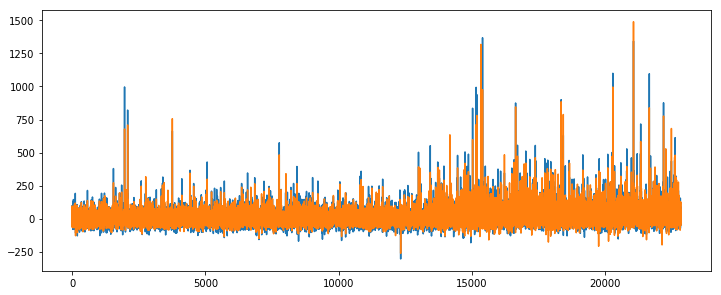

In [185]:
plt.plot(b[:,55])
plt.plot(r[:,55])

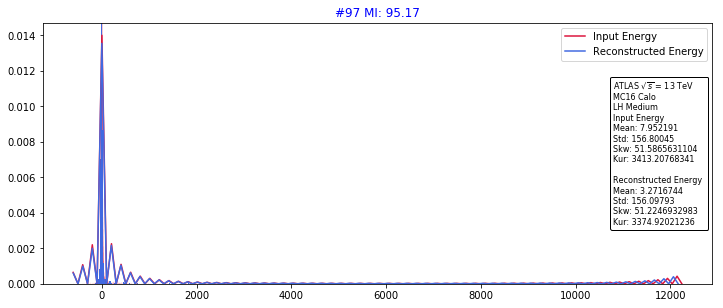

In [233]:
fig, ax = plt.subplots()
rings=96
sb.kdeplot(b[:,rings],label="Input Energy",color='crimson')
sb.kdeplot(r[:,rings],label="Reconstructed Energy",color='royalblue')
nbins = len(np.histogram(b[:,rings],'fd')[0])
ax.hist(b[:,rings], bins=nbins, normed=True,color='crimson',histtype='stepfilled')
nbins = len(np.histogram(r[:,rings],'fd')[0])
ax.hist(r[:,rings], bins=nbins, normed=True,color='royalblue')
#axs[i,j].grid()
#axs[i,j].set_title('Ring '+str(rings)+' - '+model_name)
#plt.get_yaxis().set_ticks([])
rr = calc_MI2(b[:,rings],r[:,rings])
mi_score = 100*round(np.sqrt(1. - np.exp(-2 * rr)),4)
plt.title('#'+str(rings+1)+' MI: '+str(mi_score), color='b')
at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nInput Energy \nMean: "+str(b[:,rings].mean())+"\nStd: "+str(b[:,rings].std())+"\nSkw: "+str(skew(b[:,rings]))+"\nKur: "+str(kurtosis(b[:,rings]))+"\n\nReconstructed Energy \nMean: "+str(r[:,rings].mean())+"\nStd: "+str(r[:,rings].std())+"\nSkw: "+str(skew(r[:,rings]))+"\nKur: "+str(kurtosis(r[:,rings])),
                  prop=dict(size=8), frameon=True,
                  loc='center right', 
                 )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
plt.show()

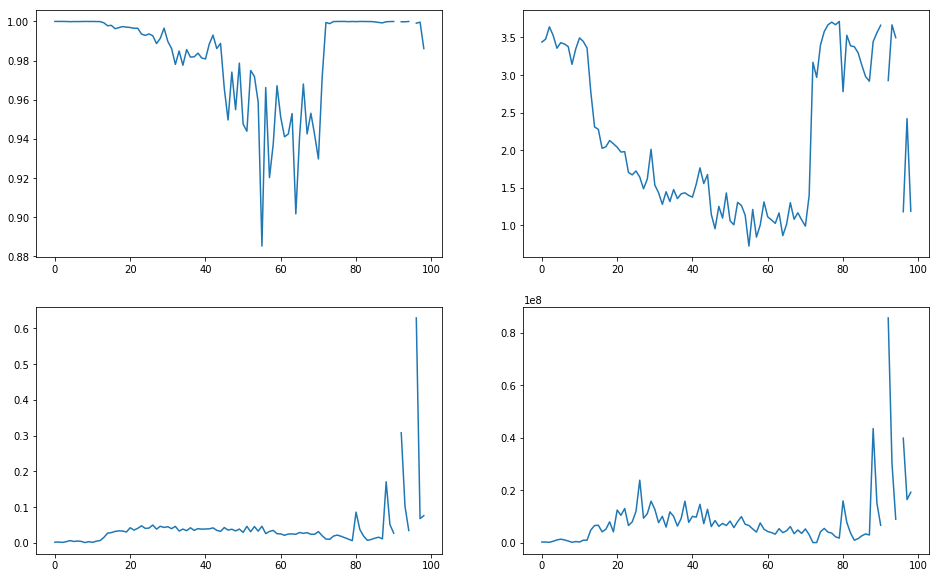

In [248]:
fig, ax = plt.subplots(2,2,figsize=(16,10))
#ax2=ax1.twinx()
ax[0,0].plot(corr)
ax[0,1].plot(im)
ax[1,0].plot(kl)
ax[1,1].plot(chi)
#plt.plot(kl)


In [249]:
chi

[200014.82056775998,
 200024.55195771068,
 100023.20713154323,
 500044.5938262134,
 1000056.4090956596,
 1300049.496729697,
 1000045.147112936,
 600058.0378505929,
 100016.92005255411,
 400059.1591528665,
 200024.5383488142,
 900040.7562273804,
 900096.1872935727,
 4800189.400905822,
 6500328.541380714,
 6600286.614056667,
 4100379.0932203596,
 5100402.911476659,
 7900488.071886621,
 4100407.1561897607,
 12400515.322108155,
 10400504.240876757,
 13000402.215715943,
 6500691.757741443,
 7900509.005183752,
 11900560.13550583,
 23800587.019371618,
 9300452.539791716,
 11000498.298187865,
 15800381.580445504,
 12700401.403637383,
 7600502.535405822,
 10000482.52427014,
 5900501.508558084,
 11700420.978791399,
 10000417.728070315,
 6300594.78925841,
 9200436.680622825,
 15800444.543655423,
 7700428.901990052,
 10000428.983542593,
 9700446.097625675,
 14600465.727705747,
 7200397.554611898,
 12700391.096428428,
 6100569.094989622,
 8400402.926765561,
 6200488.745571088,
 7300352.333711106,
 

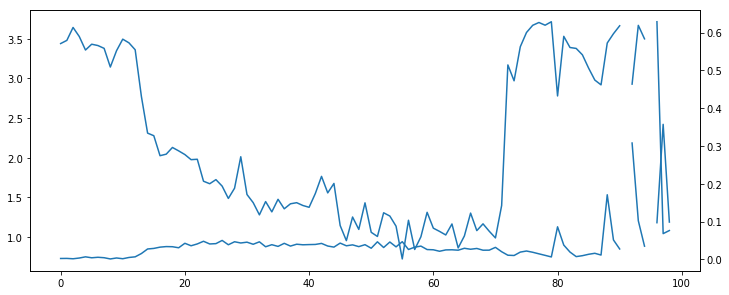

In [246]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.plot(im)
ax2.plot(kl)
#plt.plot(kl)

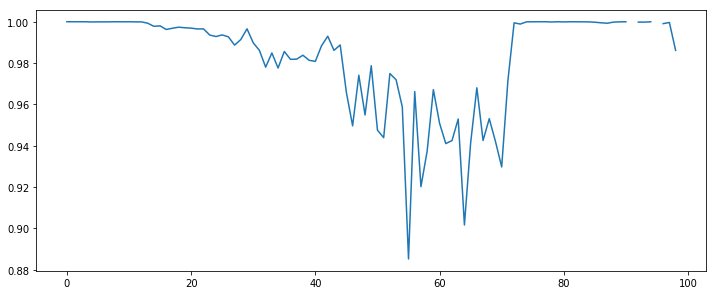

In [241]:
plt.plot(corr)
#corr

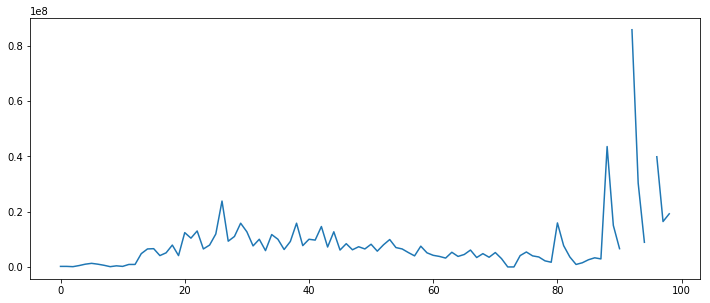

In [229]:
plt.plot(chi)

In [231]:
kl.index(max(kl))

96

In [212]:
im.index(min(im))

55

In [214]:
100*round(np.sqrt(1. - np.exp(-2 * min(im))),4)

87.46000000000001

np.std(loaded['iEnergy'],axis=0)

In [183]:
kl.index(max(kl))

96

In [404]:
r[:,70].shape

(22833,)

In [412]:
anel=4
x,y=b[:,anel],r[:,anel]
max_value = max(max(x),max(y))
min_value = min(min(x),min(y))
bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
bins_list = np.linspace(min_value, max_value, num=bins)
c_xy,xaaa,yaaa = np.histogram2d(x, y, bins=(bins_list,bins_list))
rr = mutual_info_score(None, None, contingency=c_xy)
print 100*round(np.sqrt(1. - np.exp(-2 * rr)),4)

99.94


In [121]:
def calc_MI2(x, y):
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    c_xy,xaaa,yaaa = np.histogram2d(x, y, bins=(bins_list,bins_list))
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi #,xaaa,yaaa,bins

In [152]:
def calc_kl(x, y):
    from scipy import stats
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    p,phist_bins=np.histogram(x,bins_list)
    q,qhist_bins=np.histogram(y,bins_list)
    #print(len(p),len(q))
    kl = stats.entropy(pk=p+0.00001, qk=q+0.00001)
    return kl

In [224]:
def calc_chisquare(x, y):
    from scipy import stats
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    p,phist_bins=np.histogram(x,bins_list)
    q,qhist_bins=np.histogram(y,bins_list)
    #print(len(p),len(q))
    chi = stats.chisquare(q+0.00001, p+0.00001)
    return chi

In [225]:
rings=55
calc_chisquare(b[:,rings],r[:,rings])

Power_divergenceResult(statistic=1000045.147112936, pvalue=0.0)

In [226]:
rings=55
calc_chisquare(b[:,rings],r[:,rings])

Power_divergenceResult(statistic=6500733.026661483, pvalue=0.0)

In [149]:
x = np.asarray([0.402, 0.598])#+0.00001
y = np.asarray([0.4,0.6])#+0.00001

In [150]:
stats.entropy(pk=x, qk=y)

8.328730659935488e-06

In [128]:
ww=gg+0.00001

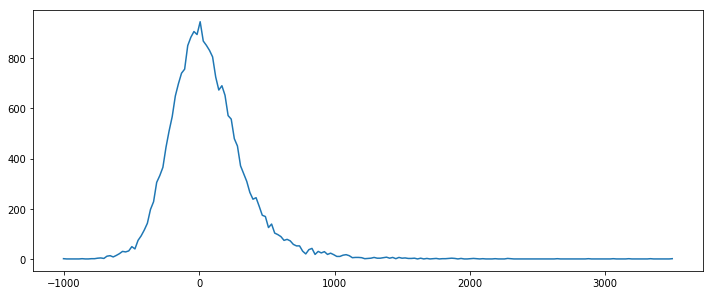

In [131]:
plt.plot(qqq,ww)

In [122]:
rings=5
calc_MI2(b[:,rings],r[:,rings])

3.4303734549787412

In [386]:
r[:,rings]

array([ 26.16086   ,  59.281372  ,  95.32689   ,  -7.4528775 ,
       -25.50551   ,  16.751942  ,   8.88752   , -33.481453  ,
        58.280876  ,  -5.351414  ,  50.318462  ,   0.14880925,
       -53.99919   , -68.15979   , -27.462444  , -35.14417   ,
        -5.1565766 ,  45.041653  , -10.17225   , -33.893997  ,
       -62.203747  , -23.412594  ,  29.918665  ,  -9.806966  ,
         5.264773  ,  -4.594077  , -22.189384  , -48.06609   ,
       -14.373649  ,  27.61608   ,  14.260044  , -19.393627  ,
        36.238914  , -19.697855  ,  20.313116  , -16.729935  ,
       -28.93215   ,  -9.55058   ,   5.910202  ,  42.699837  ],
      dtype=float32)

In [378]:
x.shape,y.shape,

((22833,), (22833,))

In [92]:
rings=5
x,y = b[:,rings],r[:,rings]
from scipy import stats
max_value = max(max(x),max(y))
min_value = min(min(x),min(y))
bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
bins_list = np.linspace(min_value, max_value, num=bins)
p,phist_bins=np.histogram(x,bins_list)
q,qhist_bins=np.histogram(y,bins_list)



In [106]:
#qqq=list(phist_bins)
#qqq.pop()
print len(qqq)

197


In [ ]:
#qqq=list(phist_bins)
#qqq.pop()
print len(qqq)

In [109]:
np.mean(y)

74.11666

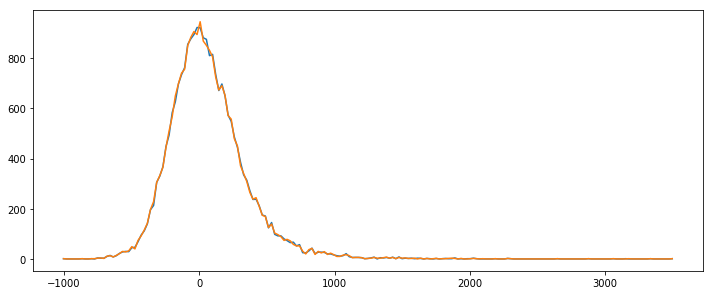

In [107]:
plt.plot(qqq,p)
plt.plot(qqq,q)

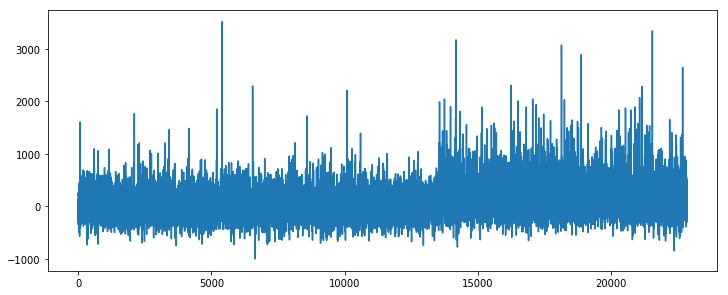

In [100]:
plt.plot(x)

In [393]:
from sklearn.metrics import mutual_info_score
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
def plot_pdfs():
    import matplotlib.pyplot as plt
    import seaborn as sb
    fig, axs = plt.subplots(8, 14, figsize=(80, 30))
    #beforenorm = norm1Par[0]
    #normlist = norm1Par[1]
    #afternorm = norm1Par[2]
    #png_files=[]
    #ax2 = axs.twinx()

    for layer in ['100x90']:#reconstruct.keys():
        #print 'LAYER: '+str(layer)
        #for nsort in reconstruct[layer].keys():
        #print "Sort: "+str(nsort)
        #if isinstance(reconstruct[layer], (tuple, list,)):
        #    unnorm_reconstruct = []
        #    for i, cdata in enumerate(reconstruct[layer]):
        #        #print i,cdata.shape
        #        unnorm_reconstruct.append( cdata * normlist[i])
        #    unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
        #    beforenorm_val_Data = np.concatenate( beforenorm, axis=0 )
            r=loaded['rEnergy']#unnorm_reconstruct_val_Data
            b=loaded['iEnergy']#beforenorm_val_Data
            model_name='ae'
            rings=0
            for j in range(14):
                for i in range(8): ###CODE 10
                    if j> 10 and i>3:
                        fig.delaxes(axs[i,j])
                        continue
                    #rings=int(str(i)+str(j))
                    print i,j,rings
                    #ax2 = axs[i,j].twinx()
                    #try:
                    
                    #fig.hist(b[:,rings], bins='sqrt', alpha=.5, color='b', label='Signal')
                    #fig.hist(r[:,rings], bins='sqrt', alpha=.5, color='r', label='Background')
                    #plt.axvline(np.max(b[:,rings]), color='b', linestyle='--', linewidth=.8, label='Max Signal')
                    #plt.axvline(np.max(r[:,rings]), color='r', linestyle='--', linewidth=.8, label='Max Background')
                    
                    ##sb.kdeplot(b[:,rings],label="Input Energy",ax=axs[i,j],color='crimson')
                    ##sb.kdeplot(r[:,rings],label="Reconstructed Energy",ax=axs[i,j],color='royalblue')
                    nbins = len(np.histogram(b[:,rings],'fd')[0])
                    ##axs[i,j].hist(b[:,rings], bins=nbins, normed=True,color='crimson',histtype='stepfilled')
                    axs[i,j].hist(b[:,rings], bins=nbins, alpha=.5, color='b',label='Input Energy')
                    nbins = len(np.histogram(r[:,rings],'fd')[0])
                    axs[i,j].hist(r[:,rings], bins=nbins, alpha=.5, color='r',label='Reconstructed Energy')
                    ##axs[i,j].hist(r[:,rings], bins=nbins, normed=True,color='royalblue')
                    #axs[i,j].grid()
                    ##axs[i,j].set_title('Ring '+str(rings)+' - '+model_name)
                    axs[i,j].get_yaxis().set_ticks([])
                    #rr = calc_MI2(b[:,rings],r[:,rings])
                    mi_score = 0 #100*round(np.sqrt(1. - np.exp(-2 * rr)),4)
                    axs[i,j].set_ylabel('#'+str(rings+1)+' MI: '+str(mi_score), color='b')
                    at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nInput Energy \nMean: "+str(b[:,rings].mean())+"\nStd: "+str(b[:,rings].std())+"\nSkw: "+str(skew(b[:,rings]))+"\nKur: "+str(kurtosis(b[:,rings]))+"\n\nReconstructed Energy \nMean: "+str(r[:,rings].mean())+"\nStd: "+str(r[:,rings].std())+"\nSkw: "+str(skew(r[:,rings]))+"\nKur: "+str(kurtosis(r[:,rings])),
                                        prop=dict(size=8), frameon=True,
                                        loc='center right', 
                                        )
                    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
                    axs[i,j].add_artist(at)
                    #except:
                    #    print "Deu ruim no anel:"+str(rings+1)    
                    rings+=1
                    
            plt.show()
        #plt.savefig(dirout+'/confusion_matrix_'+fname.split('/')[-1]+'.png')
        #plt.clf()
        #plt.close()
        #png_files.append(dirout+'/confusion_matrix_'+fname.split('/')[-1]+'.png')
    #return png_files


0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 0 5
6 0 6
7 0 7
0 1 8
1 1 9
2 1 10
3 1 11
4 1 12
5 1 13
6 1 14
7 1 15
0 2 16
1 2 17
2 2 18
3 2 19
4 2 20
5 2 21
6 2 22
7 2 23
0 3 24
1 3 25
2 3 26
3 3 27
4 3 28
5 3 29
6 3 30
7 3 31
0 4 32
1 4 33
2 4 34
3 4 35
4 4 36
5 4 37
6 4 38
7 4 39
0 5 40
1 5 41
2 5 42
3 5 43
4 5 44
5 5 45
6 5 46
7 5 47
0 6 48
1 6 49
2 6 50
3 6 51
4 6 52
5 6 53
6 6 54
7 6 55
0 7 56
1 7 57
2 7 58
3 7 59
4 7 60
5 7 61
6 7 62
7 7 63
0 8 64
1 8 65
2 8 66
3 8 67
4 8 68
5 8 69
6 8 70
7 8 71
0 9 72
1 9 73
2 9 74
3 9 75
4 9 76
5 9 77
6 9 78
7 9 79
0 10 80
1 10 81
2 10 82
3 10 83
4 10 84
5 10 85
6 10 86
7 10 87
0 11 88
1 11 89
2 11 90
3 11 91
0 12 92
1 12 93
2 12 94
3 12 95
0 13 96
1 13 97
2 13 98
3 13 99


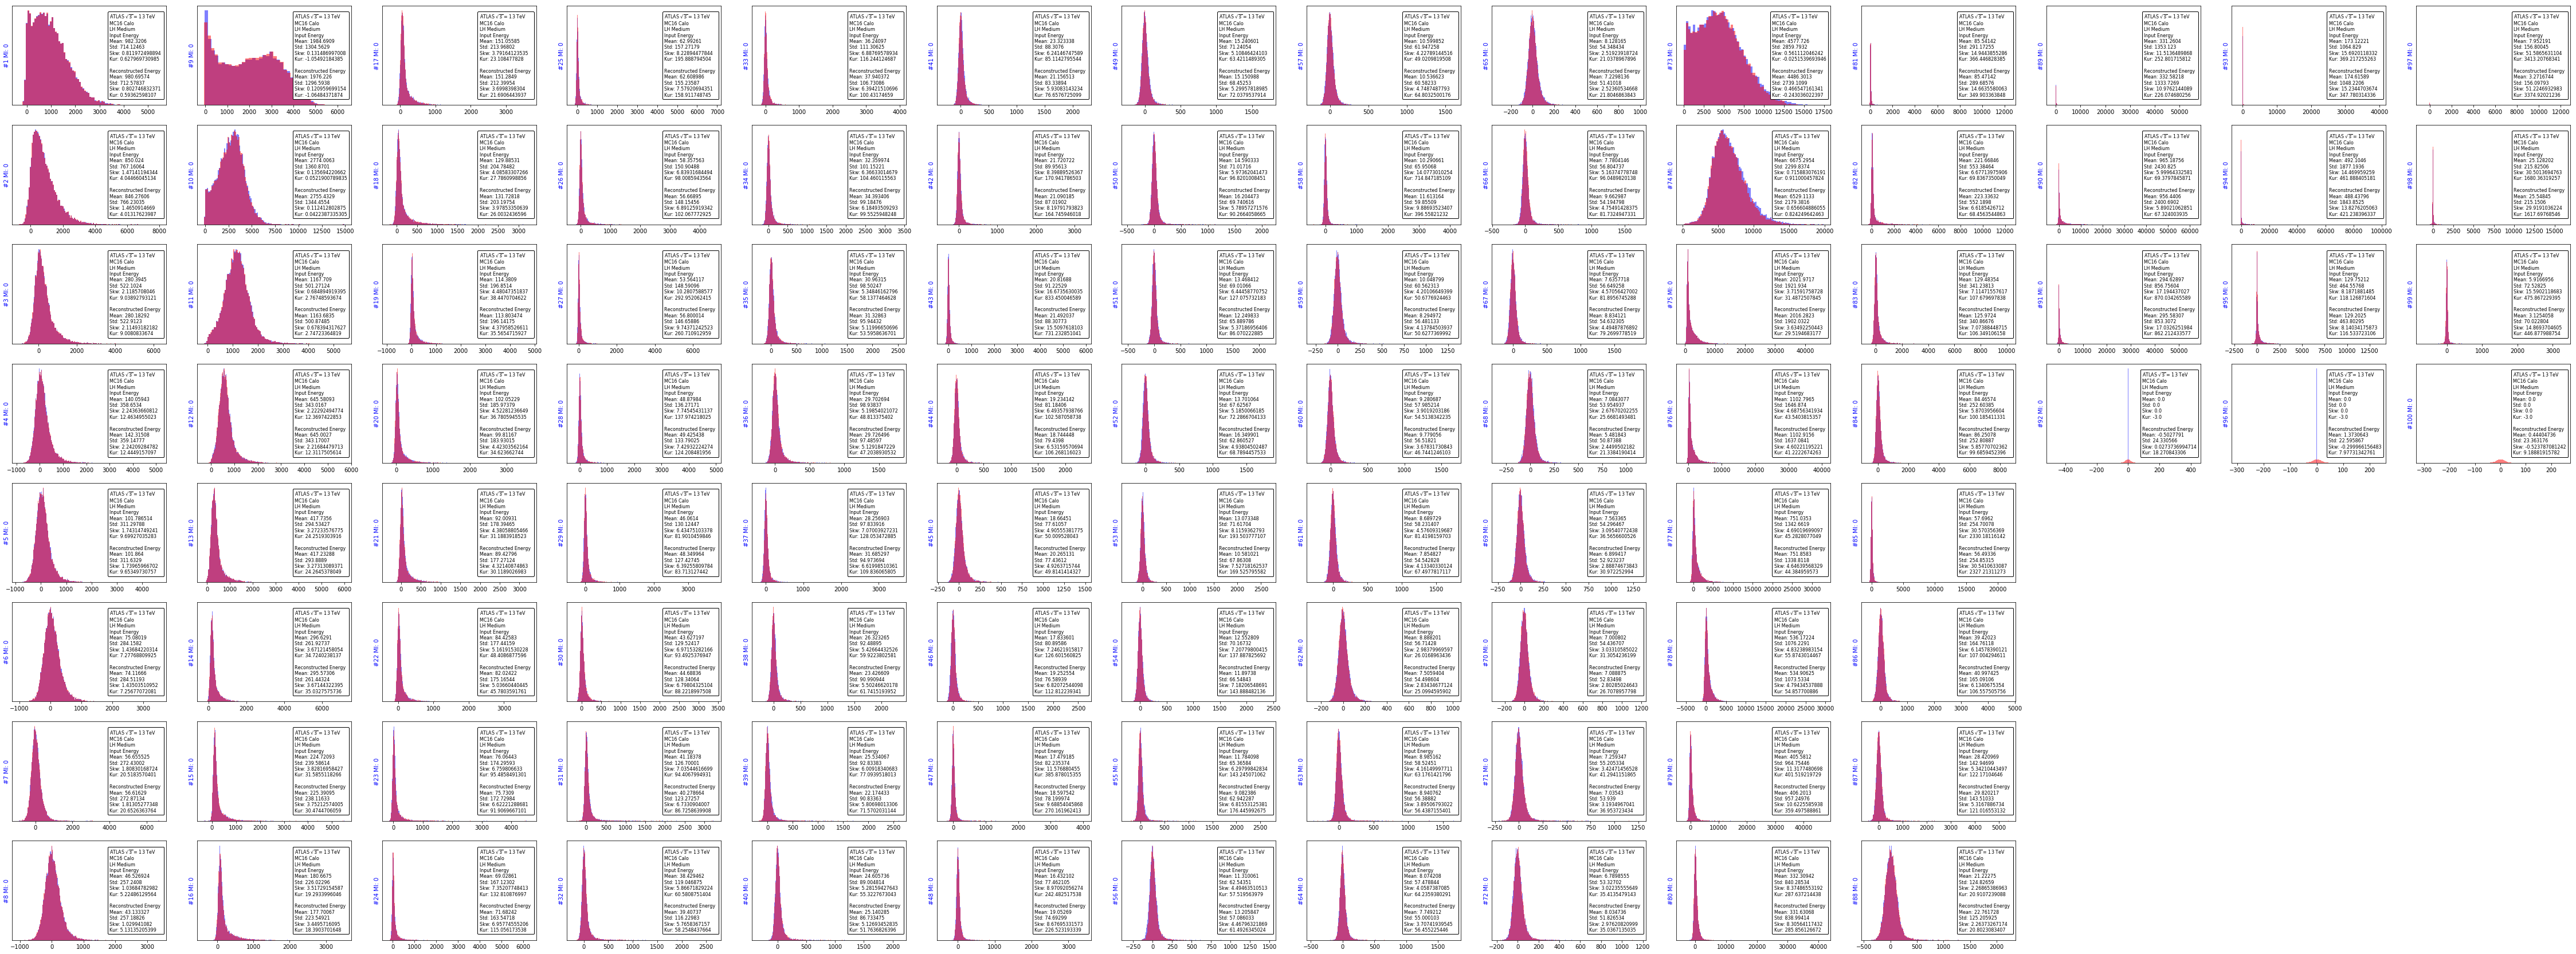

In [394]:
plot_pdfs()

In [53]:
def plot_scatter():
    import matplotlib.pyplot as plt
    import seaborn as sb
    fig, axs = plt.subplots(8, 14, figsize=(60, 40))
    #beforenorm = norm1Par[0]
    #normlist = norm1Par[1]
    #afternorm = norm1Par[2]
    #png_files=[]
    #ax2 = axs.twinx()

    for layer in ['100x90']:#reconstruct.keys():
        #print 'LAYER: '+str(layer)
        #for nsort in reconstruct[layer].keys():
        #print "Sort: "+str(nsort)
        #if isinstance(reconstruct[layer], (tuple, list,)):
        #    unnorm_reconstruct = []
        #    for i, cdata in enumerate(reconstruct[layer]):
        #        #print i,cdata.shape
        #        unnorm_reconstruct.append( cdata * normlist[i])
        #    unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
        #    beforenorm_val_Data = np.concatenate( beforenorm, axis=0 )
            r=loaded['rEnergy']#unnorm_reconstruct_val_Data
            b=loaded['iEnergy']#beforenorm_val_Data
            model_name='ae'
            rings=0
            for j in range(14):
                for i in range(8): ###CODE 10
                    if j> 10 and i>3:
                        fig.delaxes(axs[i,j])
                        continue
                    #rings=int(str(i)+str(j))
                    print i,j,rings
                    #ax2 = axs[i,j].twinx()
                    #try:
                    axs[i,j].scatter(b[:,rings],r[:,rings],color='royalblue')
                    #axs[i,j].get_yaxis().set_ticks([])
                    #axs[i,j].grid()
                    axs[i,j].set_title('#'+str(rings+1), color='b')
                    #axs[i,j].set_ylabel('#'+str(rings+1), color='b')
#                    at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nInput Energy \nMean: "+str(b[:,rings].mean())+"\nStd: "+str(b[:,rings].std())+"\nSkw: "+str(skew(b[:,rings]))+"\nKur: "+str(kurtosis(b[:,rings]))+"\n\nReconstructed Energy \nMean: "+str(r[:,rings].mean())+"\nStd: "+str(r[:,rings].std())+"\nSkw: "+str(skew(r[:,rings]))+"\nKur: "+str(kurtosis(r[:,rings])),
#                                        prop=dict(size=8), frameon=True,
#                                        loc='center left', 
#                                        )
#                    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#                    axs[i,j].add_artist(at)
                    #except:
                    #    print "Deu ruim no anel:"+str(rings+1)    
                    rings+=1
                    
            plt.show()
        #plt.savefig(dirout+'/confusion_matrix_'+fname.split('/')[-1]+'.png')
        #plt.clf()
        #plt.close()
        #png_files.append(dirout+'/confusion_matrix_'+fname.split('/')[-1]+'.png')
    #return png_files


In [56]:
r=loaded['rEnergy']#unnorm_reconstruct_val_Data
b=loaded['iEnergy']#beforenorm_val_Data

In [60]:
np.mean(r, axis=0).shape

(100,)

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 0 5
6 0 6
7 0 7
0 1 8
1 1 9
2 1 10
3 1 11
4 1 12
5 1 13
6 1 14
7 1 15
0 2 16
1 2 17
2 2 18
3 2 19
4 2 20
5 2 21
6 2 22
7 2 23
0 3 24
1 3 25
2 3 26
3 3 27
4 3 28
5 3 29
6 3 30
7 3 31
0 4 32
1 4 33
2 4 34
3 4 35
4 4 36
5 4 37
6 4 38
7 4 39
0 5 40
1 5 41
2 5 42
3 5 43
4 5 44
5 5 45
6 5 46
7 5 47
0 6 48
1 6 49
2 6 50
3 6 51
4 6 52
5 6 53
6 6 54
7 6 55
0 7 56
1 7 57
2 7 58
3 7 59
4 7 60
5 7 61
6 7 62
7 7 63
0 8 64
1 8 65
2 8 66
3 8 67
4 8 68
5 8 69
6 8 70
7 8 71
0 9 72
1 9 73
2 9 74
3 9 75
4 9 76
5 9 77
6 9 78
7 9 79
0 10 80
1 10 81
2 10 82
3 10 83
4 10 84
5 10 85
6 10 86
7 10 87
0 11 88
1 11 89
2 11 90
3 11 91
0 12 92
1 12 93
2 12 94
3 12 95
0 13 96
1 13 97
2 13 98
3 13 99


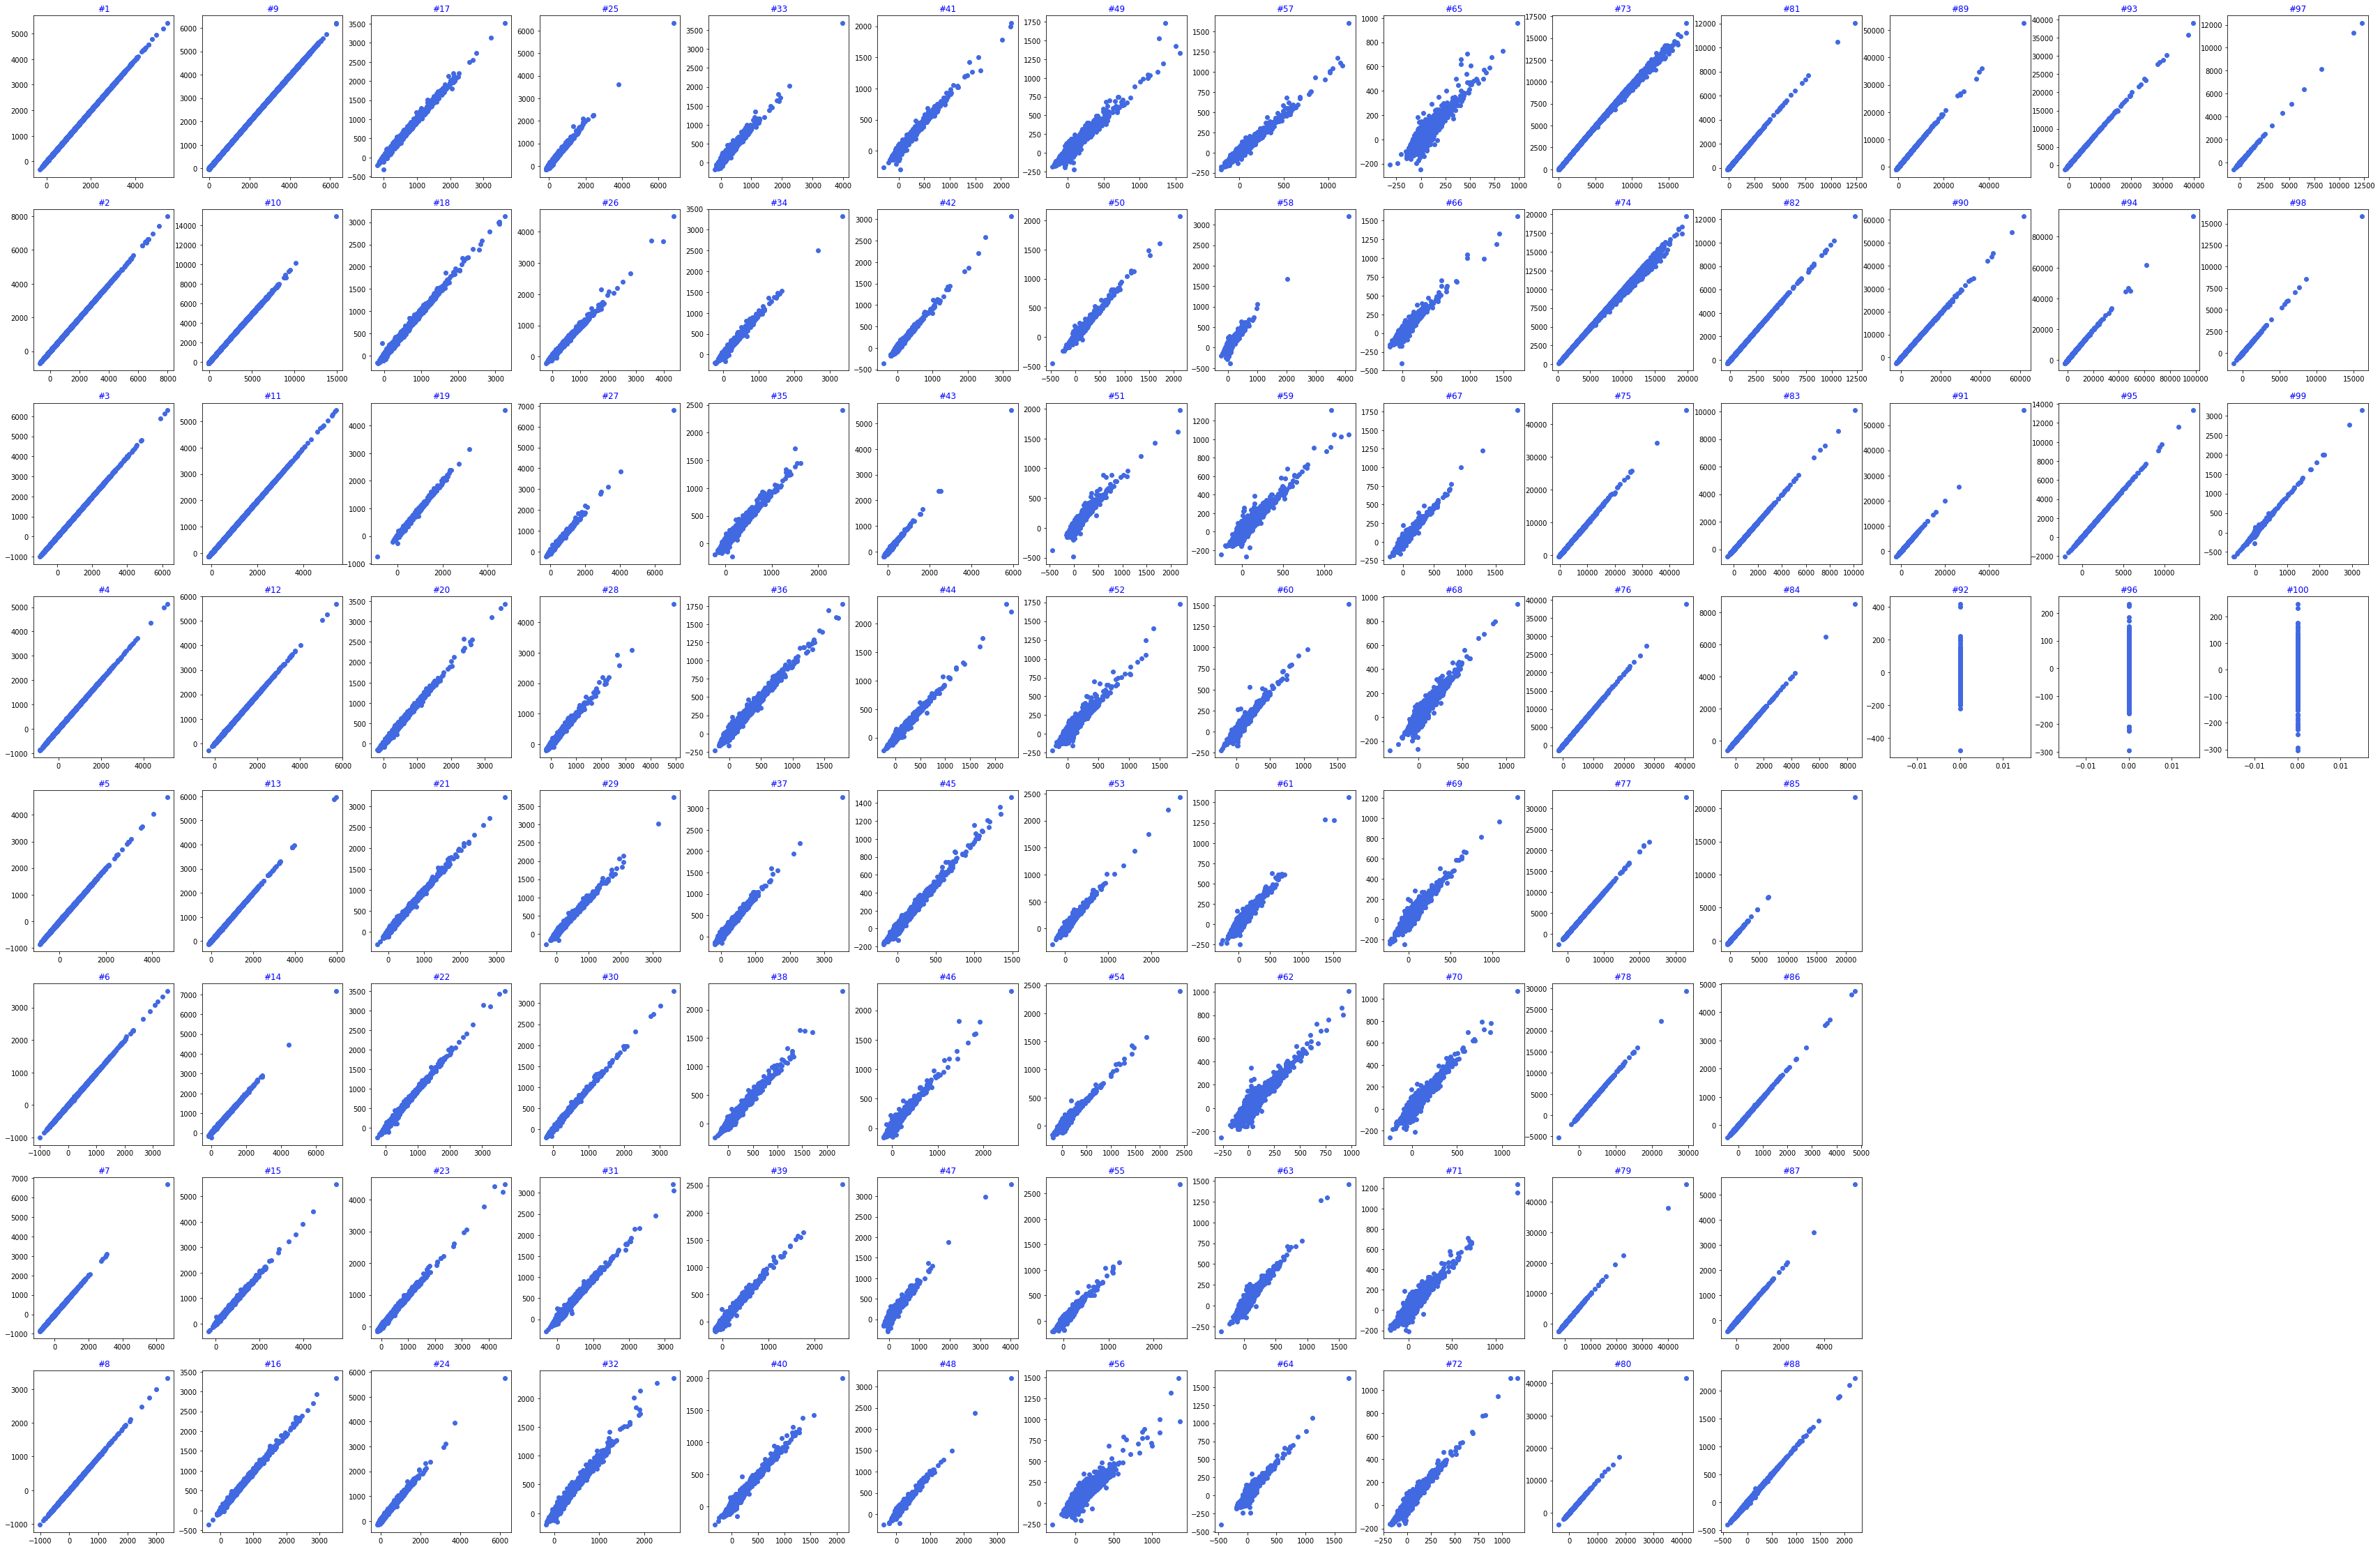

In [54]:
plot_scatter()

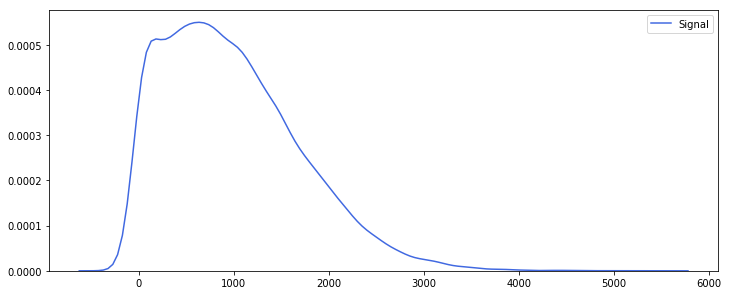

In [35]:
loaded['iEnergy'][:,0].shape
sb.kdeplot(loaded['iEnergy'][:,0],label="Signal",color='royalblue')

In [ ]:
def plot_pdfs(norm1Par=None,reconstruct=None,model_name="",time=None,sort=None,etBinIdx=None,etaBinIdx=None,phase=None,, dirout=None):
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(10, 10, figsize=(40, 18))
    beforenorm = norm1Par[0]
    normlist = norm1Par[1]
    afternorm = norm1Par[2]
    png_files=[]

    for layer in ['100x90']#reconstruct.keys():
        #print 'LAYER: '+str(layer)
        #for nsort in reconstruct[layer].keys():
        #print "Sort: "+str(nsort)
        if isinstance(reconstruct[layer], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer]):
                #print i,cdata.shape
                unnorm_reconstruct.append( cdata * normlist[i])
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm, axis=0 )
            r=loaded['rEnergy']#unnorm_reconstruct_val_Data
            b=loaded['iEnergy']#beforenorm_val_Data

            for i in range(10):
                for j in range(10): ###CODE 10
                    rings=int(str(i)+str(j))

                    sb.kdeplot(b,label="Input Energy",ax=axs[i,j],color='royalblue')
                    sb.kdeplot(r,label="Reconstructed Energy",ax=axs[i,j],color='darksalmon')
                    nbins = len(np.histogram(b,'fd')[0])
                    axs[i,j].hist(b, bins=nbins, normed=True,color='royalblue',histtype='stepfilled')
                    nbins = len(np.histogram(r,'fd')[0])
                    axs[i,j].hist(r, bins=nbins, normed=True,color='darksalmon')
                    axs[i,j].grid()
                    #at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\nSignal \nMean: "+str(s.mean())+"\nStd: "+str(s.std())+"\nSkw: "+str(skew(s))+"\nKur: "+str(kurtosis(s))+"\n\nBkg \nMean: "+str(b.mean())+"\nStd: "+str(b.std())+"\nSkw: "+str(skew(b))+"\nKur: "+str(kurtosis(b)),
                    #                  prop=dict(size=8), frameon=True,
                    #                  loc='center left', 
                    #                  )
                    #at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
                    #axs[i,j].add_artist(at)
                    axs[i,j].set_title('Ring '+rings+' - '+model_name+')
        plt.savefig(dirout+'/confusion_matrix_'+fname.split('/')[-1]+'.png')
        plt.clf()
        plt.close()
        png_files.append(dirout+'/confusion_matrix_'+fname.split('/')[-1]+'.png')
    return png_files
        

In [99]:
def mutualInformation_matrix(signal, kde=False, n_bins=None):
    from statsmodels.sandbox.distributions.mv_measures import mutualinfo_kde, mutualinfo_binned
    rows, cols = signal.shape
    mat = np.zeros((rows, rows))
    np.fill_diagonal(mat, 1)
    # Upper diagonal
    for r in range(rows):
        for c in range(r, rows):
            if r == c:
                continue
            p = signal[r].flatten() + 1e-12
            q = signal[c].flatten() + 1e-12
            if kde:
                mi = mutualinfo_kde(p, q)
            else:
                if n_bins is None:
                    p_bins = len(np.histogram(p, bins='fd')[0])
                    q_bins = len(np.histogram(q, bins='fd')[0])
                    n_bins = min(p_bins, q_bins)
                elif n_bins == 'auto':
                    qs = np.sort(q)
                    ps = np.sort(p)
                    qbin_sqr = np.sqrt(5./cols)
                    quantiles = np.linspace(0, 1, 1./qbin_sqr)
                    quantile_index = ((cols-1)*quantiles).astype(int)
                    #move edges so that they don't coincide with an observation
                    shift = 1e-6 + np.ones(quantiles.shape)
                    shift[0] -= 2*1e-6
                    q_bins = qs[quantile_index] + shift
                    p_bins = ps[quantile_index] + shift
                    n_bins = min(p_bins, q_bins)

                #mi = mutualinfo_binned(p, q, n_bins)[0]
                
                fx, binsx = np.histogram(p, bins = p_bins)
                fy, binsy = np.histogram(q, bins = q_bins)
                fyx, binsy, binsx = np.histogram2d(q, p, bins = (binsy, binsx))

                pyx = fyx * 1. / cols
                px = fx * 1. / cols
                py = fy * 1. / cols


                mi_obs = pyx * (np.log(pyx + 1e-12) - np.log(py + 1e-12)[:,None] - np.log(px + 1e-12))
                mi_obs[np.isnan(mi_obs)] = 0
                mi_obs[np.isinf(mi_obs)] = 0
                mi = mi_obs.sum()
            if np.isnan(mi):
                mi = 1
            elif mi > 1:
                mi = 1
            mat[r][c] = mi
            mat[c][r] = mi
            
    return mat

def plot_MutualInformation(mixtures,sae=None, KDE = False, nbins = None):
    import seaborn as sb
    
    fig, axs = plt.subplots(2, 1, figsize=(24, 18))
    
    sb.heatmap(mutualInformation_matrix(mixtures, kde=KDE, n_bins = nbins), ax=axs[0,0], annot=True, cmap = 'YlGnBu', vmin = 0, vmax = 1)
    axs[0, 0].set_title('Mutual Information: Codes - SAE: '+sae)
    sb.heatmap(np.abs(np.corrcoef(mixtures)), annot=False, cmap = 'YlOrRd', ax = axs[0,1], vmin = 0, vmax =  1)
    axs[0, 1].set_title('Abs Correlation matrix: Aneis')
    
    sb.heatmap(np.abs(np.corrcoef(mixtures)), annot=True, cmap = 'YlOrRd', ax = axs[1,0], vmin = 0, vmax =  1)
    axs[1, 0].set_title('Abs Correlation matrix: Codes - SAE: '+sae)
    sb.heatmap(np.abs(np.corrcoef(mixtures)), annot=True, cmap = 'YlOrRd', ax = axs[1,1], vmin = 0, vmax =  1)
    axs[1, 1].set_title('Abs Correlation matrix: Codes')

        
    return None

In [291]:
cols,rows = r.shape
print rows,cols
mat = np.zeros((rows, rows))
np.fill_diagonal(mat, 1)
mat.shape

100 22833


(100, 100)

In [374]:
def mutualInformation_matrix(signal,measure='MI',sklearn=True,kde=False, n_bins=None):
    from statsmodels.sandbox.distributions.mv_measures import mutualinfo_kde, mutualinfo_binned
    print signal.shape
    cols,rows = signal.shape
    mat = np.zeros((rows, rows))
    #np.fill_diagonal(mat, 100)
    # Upper diagonal
    for r in range(rows):
        for c in range(r, rows):
            #print r,c
            #if r == c:
            #    continue

            if sklearn:
                try:
                    if measure == 'MI':
                        rr = calc_MI2(signal[:,r]+ 1e-12,signal[:,c]+ 1e-12)
                        score = round(np.sqrt(1. - np.exp(-2 * rr)),4)
                    elif measure == 'KL':
                        score = calc_kl(signal[:,r]+ 1e-12,signal[:,c]+ 1e-12)
                except:
                    score=None
            else:
                if n_bins is None:
                    p_bins = len(np.histogram(p, bins='fd')[0])
                    q_bins = len(np.histogram(q, bins='fd')[0])
                    n_bins = min(p_bins, q_bins)
                elif n_bins == 'auto':
                    qs = np.sort(q)
                    ps = np.sort(p)
                    qbin_sqr = np.sqrt(5./cols)
                    quantiles = np.linspace(0, 1, 1./qbin_sqr)
                    quantile_index = ((cols-1)*quantiles).astype(int)
                    #move edges so that they don't coincide with an observation
                    shift = 1e-6 + np.ones(quantiles.shape)
                    shift[0] -= 2*1e-6
                    q_bins = qs[quantile_index] + shift
                    p_bins = ps[quantile_index] + shift
                    n_bins = min(p_bins, q_bins)

                #mi = mutualinfo_binned(p, q, n_bins)[0]
                
                fx, binsx = np.histogram(p, bins = p_bins)
                fy, binsy = np.histogram(q, bins = q_bins)
                fyx, binsy, binsx = np.histogram2d(q, p, bins = (binsy, binsx))

                pyx = fyx * 1. / cols
                px = fx * 1. / cols
                py = fy * 1. / cols


                mi_obs = pyx * (np.log(pyx + 1e-12) - np.log(py + 1e-12)[:,None] - np.log(px + 1e-12))
                mi_obs[np.isnan(mi_obs)] = 0
                mi_obs[np.isinf(mi_obs)] = 0
                score = mi_obs.sum()
            import math
            #print mi
            #if math.isnan(float(mi)):
            #    mi = 100
            #elif mi > 1:
            #    mi = 1
            mat[r][c] = score
            mat[c][r] = score
    #print mat
    return mat

def plot_MutualInformation(mixtures=None,reconstruction=None,measure='MI',sae=None,plot_corr=False , KDE = False, nbins = None):
    import seaborn as sb
    
    if reconstruction is None:
        if plot_corr:
            fig, axs = plt.subplots(1,2, figsize=(40, 18))
        else:
            fig, axs = plt.subplots(figsize=(24, 18))
    else:
        if plot_corr:
            fig, axs = plt.subplots(2,2, figsize=(36, 18))
        else:
            fig, axs = plt.subplots(1,2, figsize=(40, 18))    

    if measure == 'KL':
        mat = mutualInformation_matrix(mixtures,measure='KL')
        minval=min(mat.flatten())
        maxval=max(mat.flatten())
    else:
        minval=0
        maxval=1
    if reconstruction is None:
        if plot_corr:
            sb.heatmap(mutualInformation_matrix(mixtures,measure=measure, kde=KDE, n_bins = nbins), ax=axs[0], annot=False, cmap = 'YlGnBu', vmin = minval, vmax = maxval)
            axs[0].set_title('Mutual Information',fontsize=20)
            #axs[0].set_tick_params(labelsize=20)

            sb.heatmap(np.abs(np.corrcoef(mixtures.T)), annot=False, cmap = 'YlOrRd', ax = axs[1], vmin = 0, vmax =  1)
            axs[1].set_title('Abs Correlation matrix',fontsize=20)
            #axs[1].set_tick_params(labelsize=20)
        else:
            sb.heatmap(mutualInformation_matrix(mixtures,measure=measure, kde=KDE, n_bins = nbins), annot=False, cmap = 'YlGnBu',  vmin = minval, vmax = maxval)
            axs.set_title('Mutual Information',fontsize=20)
    else:
        if plot_corr:
            sb.heatmap(mutualInformation_matrix(mixtures,measure=measure, kde=KDE, n_bins = nbins), ax=axs[0,0], annot=False, cmap = 'YlGnBu',  vmin = minval, vmax = maxval)
            axs[0,0].set_title('Signal Mutual Information')

            sb.heatmap(np.abs(np.corrcoef(mixtures.T)), annot=False, cmap = 'YlOrRd', ax = axs[0,1], vmin = 0, vmax =  1)
            axs[0,1].set_title('Signal Abs Correlation matrix')
            
            sb.heatmap(mutualInformation_matrix(reconstruction,measure=measure, kde=KDE, n_bins = nbins), ax=axs[1,0], annot=False, cmap = 'YlGnBu',  vmin = minval, vmax = maxval)
            axs[1,0].set_title('Reconstruction Mutual Information')

            sb.heatmap(np.abs(np.corrcoef(reconstruction.T)), annot=False, cmap = 'YlOrRd', ax = axs[1,1], vmin = 0, vmax =  1)
            axs[1,1].set_title('Reconstruction Abs Correlation matrix')

        else:
            sb.heatmap(mutualInformation_matrix(mixtures,measure=measure, kde=KDE, n_bins = nbins),ax=axs[0] , annot=False, cmap = 'YlGnBu',  vmin = minval, vmax = maxval)
            axs[0].set_title('Signal Mutual Information')
            
            sb.heatmap(mutualInformation_matrix(reconstruction,measure=measure, kde=KDE, n_bins = nbins),ax=axs[1] , annot=False, cmap = 'YlGnBu',  vmin = minval, vmax = maxval)
            axs[1].set_title('Reconstruction Mutual Information')

        
            
    return None

In [366]:
mat = mutualInformation_matrix(b,measure='KL')

(22833, 100)


In [373]:
max(mat.flatten())

21.006738421744046

(22833, 100)
(22833, 100)


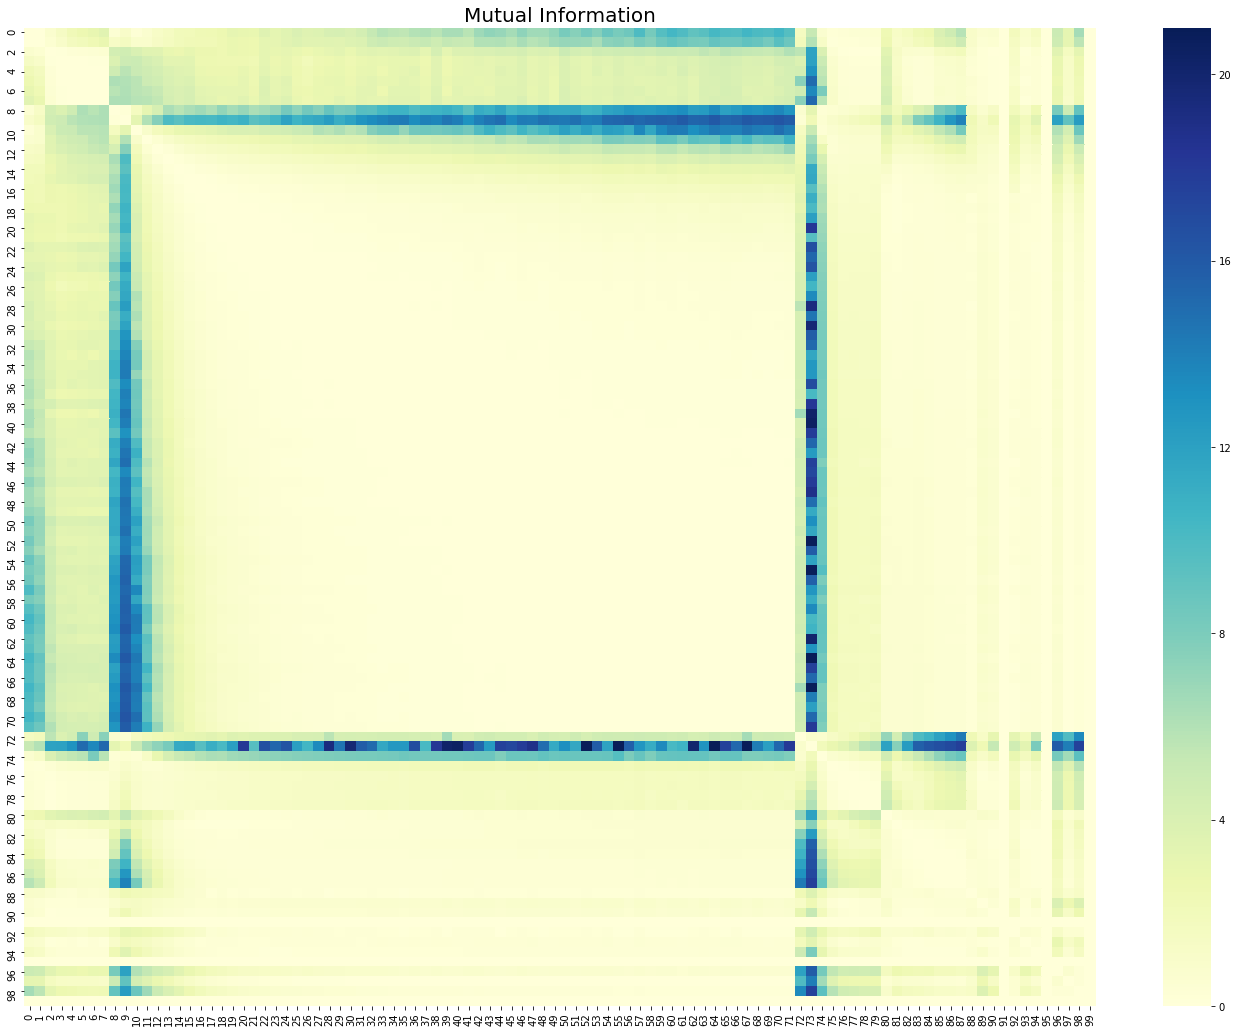

In [375]:
plot_MutualInformation(b,measure='KL',plot_corr=False)


# Propagate encoder to analyse new variables in reduced Dim

In [16]:
propagate = {}
prediction = {}

layers = ['100x40']#['100x100','100x90','100x85','100x70','100x55','100x40','100x25','100x10','100x3']
dirin='/home/caducovas/DeepRinger/data/run_layer1/adam_80/'

for layer in layers:
    print "Layer: "+str(layer)
    neuron = int(layer.split('x')[1])
    #neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer)]
    predict_data = {}
    for file in files:
        print "Sort: " +str(file.split('_')[27]) ###sort
        nsort = int(file.split('_')[27])
        model = load_model(dirin+file)
        enc_weights = model.layers[0].get_weights()
        dec_weights = model.layers[2].get_weights()

        model1 = Sequential()
        model1.add(Dense(neuron, input_dim=afternorm[0][0].shape[1], weights=model.layers[0].get_weights()))
        model1.add(Dense(afternorm[0][0].shape[1], weights=dec_weights))
        model1.add(Activation('tanh'))        
        
        if isinstance(afternorm[nsort], (tuple, list,)):
            predict = []
            for i, cdata in enumerate(afternorm[nsort]):
                predict.append(model1.predict(cdata, batch_size=cdata.shape[0], verbose=1))
        prediction[nsort] = predict
        
        propagate[neuron] = prediction
    





Layer: 100x40
Sort: 6
2900/2900 [==============================] - 0s 1us/step
Sort: 0
2900/2900 [==============================] - 0s 1us/step
Sort: 8
2901/2901 [==============================] - 0s 1us/step
Sort: 2
2900/2900 [==============================] - 0s 1us/step
Sort: 4
2900/2900 [==============================] - 0s 1us/step
Sort: 7
2901/2901 [==============================] - 0s 1us/step
Sort: 9
2901/2901 [==============================] - 0s 1us/step
Sort: 1
2900/2900 [==============================] - 0s 1us/step
Sort: 5
2900/2900 [==============================] - 0s 1us/step
Sort: 3
2900/2900 [==============================] - 0s 1us/step


In [17]:
propagate.keys()

[40]

# Print C 2

In [ ]:
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

fig, ax = plt.subplots(figsize=(20, 12))
#fig1 = plt.figure(figsize=(20, 12))
#propagate[2][0][0].T[0].shape
x= propagate[2][0][0].T[0] 
y= propagate[2][0][0].T[1]
plt.scatter(x, y, c="b", alpha=0.5,label="Signal")

x= propagate[2][0][1].T[0] 
y= propagate[2][0][1].T[1]
plt.scatter(x, y, c="r", alpha=0.5,label="Background")
plt.legend(loc='best',fontsize = 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.ylabel('Var1',fontsize= 'xx-large')
plt.xlabel('Var2',fontsize= 'xx-large')

plt.title('Autoencoder 100x2',fontsize= 'xx-large')

at = AnchoredText(r'$\sqrt{s}$ = 13 TeV'+"\nMC16 Calo",
                  prop=dict(size=28), frameon=False,
                  loc=2, 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

    
plt.grid()



Var: 1
OK Var: 1


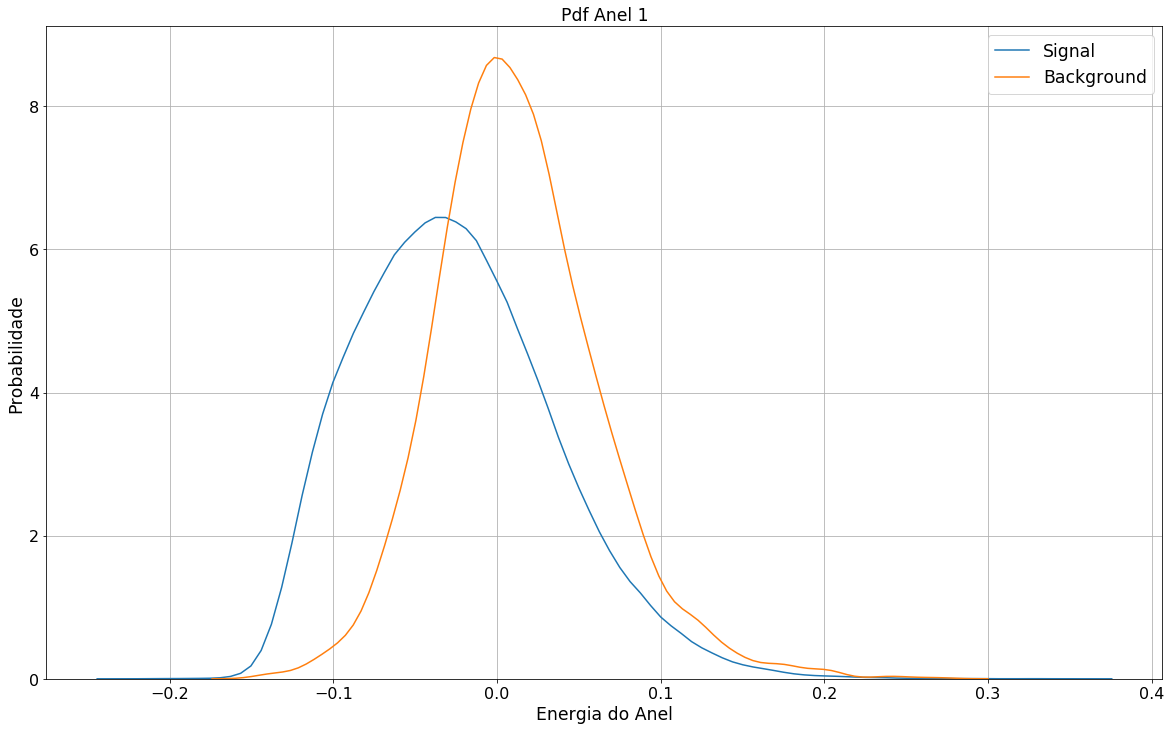

In [141]:
fig1 = plt.figure(figsize=(20, 12))
for i in range(1):#range(propagate[3][0][0].shape[1]):
    print 'Var: '+str(i+1)
    try:
        print 'OK Var: '+str(i+1)
        #fig1 = plt.figure(figsize=(20, 12))
        #i=0
        #sb.kdeplot(norm1_val_Data.T[i],shade=True,label="All")
        sb.kdeplot(propagate[3][0][0].T[2],label="Signal")
        #pdf, a = EstPDF(data[1].T[i],mode='hist')
        sb.kdeplot(propagate[3][0][1].T[2],label="Background")
        plt.legend(loc='best',fontsize = 'xx-large')
        plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
        plt.ylabel('Probabilidade',fontsize= 'xx-large')
        plt.xlabel('Energia do Anel',fontsize= 'xx-large')
        plt.tick_params(axis='both',labelsize=16)
        plt.grid()
        plt.show()
        #plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
        plt.gcf().clear()
    except:
        print 'Erro Anel: '+str(i+1)

In [18]:
reconstruct.keys()

[2, 3, 100, 5, 70, 40, 10, 15, 20, 85, 55, 25, 90, 4]

# Calculate Mutual Information for each calorimeter

In [75]:
##by calorimeter

kl_et ={}
kl_reconstruction={}
neurons=[]
all_kl=[]
kl_mean=[]
kl_std=[]

kl_signal_mean=[]
kl_signal_std=[]

kl_bkg_mean=[]
kl_bkg_std=[]

###Calorimeter
kl_tot = []
kl_tot_std = []

kl_PS = []
kl_PS_std = []

kl_EM1 = []
kl_EM1_std = []

kl_EM2 = []
kl_EM2_std = []

kl_EM3 = []
kl_EM3_std = []

kl_EM = []
kl_EM_std = []

kl_HAD1 = []
kl_HAD1_std = []

kl_HAD2 = []
kl_HAD2_std = []

kl_HAD3 = []
kl_HAD3_std = []

kl_HAD = []
kl_HAD_std = []

kl_aneis = []
kl_aneis_std = []


#layers = sorted([int(f.split('x')[1]) for f in reconstruct.keys()])
#reconstruct= propagate
layers = sorted(reconstruct.keys())

for layer in layers:
    print "Layer: "+str(layer)
    
    kl_tot_sort={}
    kl_PS_sort={}
    kl_EM1_sort={}
    kl_EM2_sort={}
    kl_EM3_sort={}
    kl_EM_sort={}
    kl_HAD1_sort={}
    kl_HAD2_sort={}
    kl_HAD3_sort={}
    kl_HAD_sort={}
    kl_sort={}
    
    kl_signal_sort={}
    kl_bkg_sort={}
    neurons.append(layer)
    for nsort in reconstruct[layer].keys():
        print "Sort: "+str(nsort)
        if isinstance(reconstruct[layer][nsort], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer][nsort]):
                unnorm_reconstruct.append( cdata * norms[nsort][i])
            
            #unnorm_reconstruct_val_Data = reconstruct[layer][nsort][1]*norms[nsort][1]
            #beforenorm_val_Data = beforenorm[nsort][1]
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )
            
            #pdf,bins = KLDiv(beforenorm_val_Data.T,unnorm_reconstruct_val_Data.T)
                        ###Total Energy
            
            #pdf = drv.information_mutual_normalised(rr)[0][1]
            #pdf,bins = mi(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            
            #pdf,bins = mi(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_tot_sort[nsort] = pdf
                        ###PS
            #pdf,bins = mi(beforenorm_val_Data[:,0:7,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,0:7,].sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_PS_sort[nsort] = pdf
                        ###EM1
            #pdf,bins = mi(beforenorm_val_Data[:,8:71,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,8:71,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,8:71,].sum(axis=1),unnorm_reconstruct_val_Data[:,8:71,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM1_sort[nsort] = pdf
                        ###EM2
            #pdf,bins = mi(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,72:79,].sum(axis=1),unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM2_sort[nsort] = pdf
                        ###EM3
            #pdf,bins = mi(beforenorm_val_Data[:,80:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,80:87,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,80:87,].sum(axis=1),unnorm_reconstruct_val_Data[:,80:87,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM3_sort[nsort] = pdf
                        ###EM
            #pdf,bins = mi(beforenorm_val_Data[:,0:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:87,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,0:87,].sum(axis=1),unnorm_reconstruct_val_Data[:,0:87,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM_sort[nsort] = pdf
                        ###HAD1
            #pdf,bins = mi(beforenorm_val_Data[:,88:91,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:91,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,88:91,].sum(axis=1),unnorm_reconstruct_val_Data[:,88:91,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD1_sort[nsort] = pdf
                        ###HAD2
            #pdf,bins = mi(beforenorm_val_Data[:,92:95,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,92:95,].sum(axis=1),unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD2_sort[nsort] = pdf
                        ###HAD3
            #pdf,bins = mi(beforenorm_val_Data[:,96:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,96:99,].sum(axis=1),unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD3_sort[nsort] = pdf
                        ###HAD
            #pdf,bins = mi(beforenorm_val_Data[:,88:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:99,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,88:99,].sum(axis=1),unnorm_reconstruct_val_Data[:,88:99,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD_sort[nsort] = pdf
                        ###Aneis
            #pdf,bins = KLDiv(beforenorm_val_Data.T,unnorm_reconstruct_val_Data.T)
            #kl_sort[nsort] = pdf
            
            
            

            
            #pdf_signal,bins_sgn = KLDiv(beforenorm[nsort][0].sum(axis=1).T,unnorm_reconstruct[0].sum(axis=1).T)
            #pdf_bkg,bins_bkg = KLDiv(beforenorm[nsort][1].sum(axis=1).T,unnorm_reconstruct[1].sum(axis=1).T)
            
            #kl_sort[nsort] = pdf
            #kl_signal_sort[nsort] = pdf_signal
            #kl_bkg_sort[nsort] = pdf_bkg
            
            ###do it for signal and background separated as well
    
    #kl_mean.append(np.mean(kl_sort.values()))
    #kl_std.append(np.std(kl_sort.values()))
    kl_tot.append(np.mean(kl_tot_sort.values()))
    kl_tot_std.append(np.std(kl_tot_sort.values()))
    kl_PS.append(np.mean(kl_PS_sort.values()))
    kl_PS_std.append(np.std(kl_PS_sort.values()))
    kl_EM1.append(np.mean(kl_EM1_sort.values()))
    kl_EM1_std.append(np.std(kl_EM1_sort.values()))
    kl_EM2.append(np.mean(kl_EM2_sort.values()))
    kl_EM2_std.append(np.std(kl_EM2_sort.values()))
    kl_EM3.append(np.mean(kl_EM3_sort.values()))
    kl_EM3_std.append(np.std(kl_EM3_sort.values()))
    kl_EM.append(np.mean(kl_EM_sort.values()))
    kl_EM_std.append(np.std(kl_EM_sort.values()))
    kl_HAD1.append(np.mean(kl_HAD1_sort.values()))
    kl_HAD1_std.append(np.std(kl_HAD1_sort.values()))
    kl_HAD2.append(np.mean(kl_HAD2_sort.values()))
    kl_HAD2_std.append(np.std(kl_HAD2_sort.values()))
    kl_HAD3.append(np.mean(kl_HAD3_sort.values()))
    kl_HAD3_std.append(np.std(kl_HAD3_sort.values()))
    kl_HAD.append(np.mean(kl_HAD_sort.values()))
    kl_HAD_std.append(np.std(kl_HAD_sort.values()))
    
    #kl_signal_mean.append(np.mean(kl_signal_sort.values()))
    #kl_signal_std.append(np.std(kl_signal_sort.values()))
    
    #kl_bkg_mean.append(np.mean(kl_bkg_sort.values()))
    #kl_bkg_std.append(np.std(kl_bkg_sort.values())) 
    
    #kl_reconstruction[layer] = kl_sort

Layer: 10
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 40
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 60
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 80
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9


In [76]:
kl_HAD3

[0.19981414058738814,
 0.45374869328711398,
 0.76503886253850717,
 0.85512725278579294]

In [77]:
neurons

[10, 40, 60, 80]

In [34]:
#del aaa[1]
aaa

[0.27313199981323655,
 0.46175932233146721,
 0.47087442570298232,
 0.86163074336912493,
 0.93791867729681044,
 0.96147464994732235,
 0.99115593177449723,
 0.99524545728814484,
 0.99843959916787983,
 0.99845627232204404,
 0.9984420255805222,
 0.99868150177478032,
 0.9999193301226702]

In [25]:
sp=[81.36,96.03,96.07,96.38,96.59,96.78,96.85,96.91,96.93,97,96.99,97.01,97]
sp_std=[0.17,0.17,0.17,0.15,0.26,0.16,0.15,0.15,0.17,0.17,0.14,0.13,0.17]

In [44]:
len(sp_std)

13

In [37]:
del kl_tot[1]
del kl_PS[1]
del kl_EM1[1]
del kl_EM2[1]
del kl_EM3[1]
del kl_EM[1]
del kl_HAD1[1]
del kl_HAD2[1]
del kl_HAD3[1]
del kl_HAD[1]
del kl_tot_std[1]
del kl_PS_std[1]
del kl_EM1_std[1]
del kl_EM2_std[1]
del kl_EM3_std[1]
del kl_EM_std[1]
del kl_HAD1_std[1]
del kl_HAD2_std[1]
del kl_HAD3_std[1]
del kl_HAD_std[1]


In [57]:
kl_HAD=[0.27313199981323655,0.46087442570298232,0.47087442570298232, 0.86163074336912493, 0.93791867729681044, 0.96147464994732235, 0.99115593177449723, 0.99524545728814484, 0.99843959916787983, 0.99845627232204404, 0.9984420255805222, 0.99868150177478032, 0.9999193301226702]

In [60]:
len(kl_HAD_std)

13

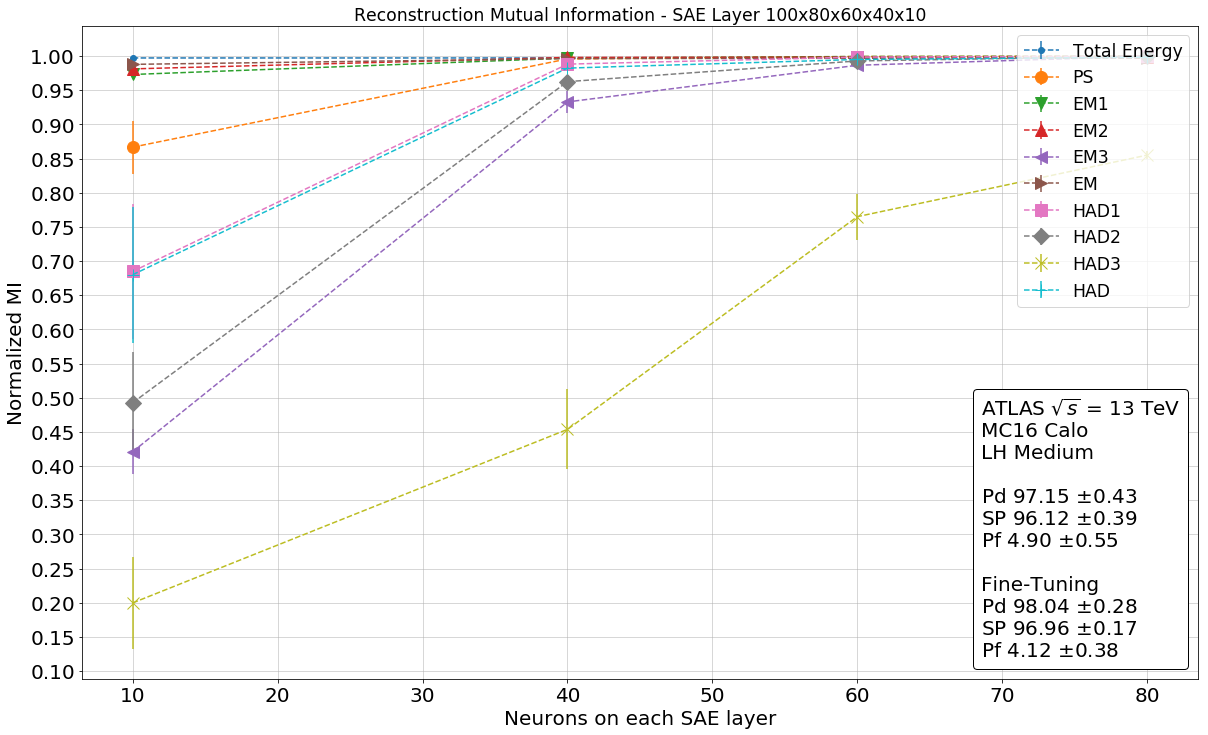

In [84]:
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
fig, ax1 = plt.subplots(figsize=(20, 12))
#ax2 = ax1.twinx()
#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std,marker=".",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_PS, yerr=kl_PS_std,marker="o",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM1, yerr=kl_EM1_std,marker="v",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM2, yerr=kl_EM2_std,marker="^",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM3, yerr=kl_EM3_std,marker="<",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_EM, yerr=kl_EM_std,marker=">",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD1, yerr=kl_HAD1_std,marker="s",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD2, yerr=kl_HAD2_std,marker="D",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD3, yerr=kl_HAD3_std,marker="x",markersize=12,linestyle='dashed')
ax1.errorbar(neurons, y=kl_HAD, yerr=kl_HAD_std,marker="+",markersize=12,linestyle='dashed')

#ax2.errorbar(neurons, y=sp, yerr=sp_std,markersize=12)

#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - SAE Layer 100x80x60x40x10',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
#ax2.set_ylabel('SP',fontsize=20)
ax1.set_xlabel('Neurons on each SAE layer',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')
#ax2.legend(['SP'], loc='center right',fontsize = 'xx-large')
#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

at = AnchoredText(r'ATLAS $\sqrt{s}$ = 13 TeV'+"\nMC16 Calo\nLH Medium\n\nPd 97.15 $\pm$0.43\nSP 96.12 $\pm$0.39\nPf 4.90 $\pm$0.55\n\nFine-Tuning\nPd 98.04 $\pm$0.28\nSP 96.96 $\pm$0.17\nPf 4.12 $\pm$0.38 ",
                  prop=dict(size=20), frameon=True,
                  loc=4, 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)


import matplotlib.ticker as ticker
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.grid(linestyle='-', linewidth=0.5)
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'reconstruction_mutual_info_comparsion2.png')
#fig.savefig(dirout+'reconstruction.png')

In [43]:
kl_tot

[18.250494139920555, 18.246252174344541, 18.247224640423205]

In [17]:
print dirout

/home/caducovas/DeepRinger/results/plots


### Plot Pdfs by layer 

In [100]:
fig, ax1 = plt.subplots(figsize=(20, 12))
layers = sorted(reconstruct.keys())

for layer in layers:#[10090]:#layers:
    print "Layer: "+str(layer)    
    neurons.append(layer)
    for nsort in reconstruct[layer].keys():
        print "Sort: "+str(nsort)
        if isinstance(reconstruct[layer][nsort], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer][nsort]):
                unnorm_reconstruct.append( cdata * norms[nsort][i])
            
            #unnorm_reconstruct_val_Data = reconstruct[layer][nsort][1]*norms[nsort][1]
            #beforenorm_val_Data = beforenorm[nsort][1]
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )
            #pdf,bins = mi(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            sb.kdeplot(beforenorm_val_Data[:,72:79,].sum(axis=1).T,label="Data")
            sb.kdeplot(unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T,label="Reconstruction")
            nbins = len(np.histogram(beforenorm_val_Data[:,72:79,].sum(axis=1).T,'fd')[0])
            plt.hist(beforenorm_val_Data[:,72:79,].sum(axis=1).T, bins=nbins, normed=True,color='blue')
            nbins = len(np.histogram(unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T,'fd')[0])
            plt.hist(unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T, bins=nbins, normed=True,color='orange')
            #sb.grid()
            plt.grid()
            plt.title('pdf Data x Reconstruction - EM2 - Sort '+str(nsort)+' -100x'+str(layer)+' MI: '+str(pdf),fontsize= 'xx-large')
            fig.savefig(dirout+'pdf_data_recons_em2_100x'+str(layer)+'sort'+str(nsort)+'_mi_unnormed_adam2.png')
            fig.clear()

#mi(beforenorm_val_Data[:,92:95,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1).T)
#beforenorm_val_Data[:,92:95,].sum(axis=1).T.shape
#fig, ax1 = plt.subplots(figsize=(20, 12))

#beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T

###PS
#mi(beforenorm_val_Data[:,0:7,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).T)
###EM1
#mi(beforenorm_val_Data[:,8:71,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,8:71,].sum(axis=1).T)
###EM2
#mi(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
###EM3
#mi(beforenorm_val_Data[:,80:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,80:87,].sum(axis=1).T)
###EM
#mi(beforenorm_val_Data[:,0:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:87,].sum(axis=1).T)
###HAD1
#mi(beforenorm_val_Data[:,88:91,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:91,].sum(axis=1).T)
###HAD2
#mi(beforenorm_val_Data[:,92:95,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1).T)
###HAD3
#mi(beforenorm_val_Data[:,96:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1).T)
###HAD
#mi(beforenorm_val_Data[:,88:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:99,].sum(axis=1).T)
            


Layer: 3
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 10
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 25
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 40
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 55
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Layer: 70
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 85
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 90
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 100
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9


In [37]:
#bins = min(len(np.histogram(x,'fd')[0])
len(np.histogram(beforenorm_val_Data.sum(axis=1).T,'fd')[0])

array([1, 0, 0, ..., 0, 0, 1])

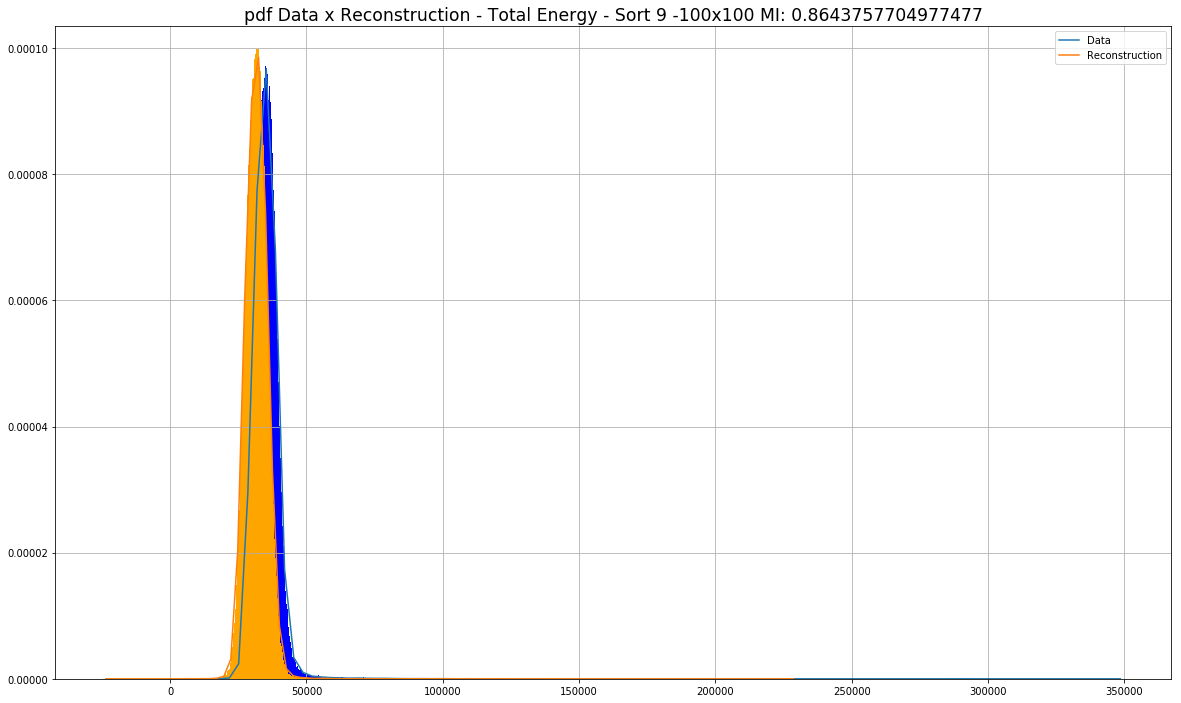

In [39]:
fig, ax1 = plt.subplots(figsize=(20, 12))

sb.kdeplot(beforenorm_val_Data.sum(axis=1).T,label="Data")
sb.kdeplot(unnorm_reconstruct_val_Data.sum(axis=1).T,label="Reconstruction")
#sb.grid()
plt.grid()
nbins = len(np.histogram(beforenorm_val_Data.sum(axis=1).T,'fd')[0])
plt.hist(beforenorm_val_Data.sum(axis=1).T, bins=nbins, normed=True,color='blue')
nbins = len(np.histogram(unnorm_reconstruct_val_Data.sum(axis=1).T,'fd')[0])
plt.hist(unnorm_reconstruct_val_Data.sum(axis=1).T, bins=nbins, normed=True,color='orange')
plt.title('pdf Data x Reconstruction - Total Energy - Sort '+str(nsort)+' -100x'+str(layer)+' MI: '+str(pdf),fontsize= 'xx-large')
#fig.savefig(dirout+'pdf_data_recons_tot_100x'+str(layer)+'sort'+str(nsort)+'.png')
plt.show()
fig.clear()


In [197]:
beforenorm_val_Data[:,0:7,].sum(axis=1).T.shape
#beforenorm_val_Data[0][100]#.shape
#        a[:,1:3,].sum(axis=1)

(339521,)

In [172]:
#signal and background

kl_et ={}
kl_reconstruction={}
neurons=[]
all_kl=[]
kl_mean=[]
kl_std=[]

kl_signal_mean=[]
kl_signal_std=[]

kl_bkg_mean=[]
kl_bkg_std=[]

#layers = sorted([int(f.split('x')[1]) for f in reconstruct.keys()])

layers = sorted(reconstruct.keys())

for layer in layers:
    kl_sort={}
    kl_signal_sort={}
    kl_bkg_sort={}
    neurons.append(layer)
    for nsort in reconstruct[layer].keys():
        if isinstance(reconstruct[layer][nsort], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer][nsort]):
                unnorm_reconstruct.append( cdata * norms[nsort][i])
            
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )
            #pdf,bins = KLDiv(beforenorm_val_Data.T,unnorm_reconstruct_val_Data.T)
            ###Total Energy
            #pdf,bins = KLDiv(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            beforenorm_val_Data.sum(axis=1).T
            
            pdf_signal,bins_sgn = KLDiv(beforenorm[nsort][0].sum(axis=1).T,unnorm_reconstruct[0].sum(axis=1).T)
            pdf_bkg,bins_bkg = KLDiv(beforenorm[nsort][1].sum(axis=1).T,unnorm_reconstruct[1].sum(axis=1).T)
            
            kl_sort[nsort] = pdf
            kl_signal_sort[nsort] = pdf_signal
            kl_bkg_sort[nsort] = pdf_bkg
            
            ###do it for signal and background separated as well
    
    kl_mean.append(np.mean(kl_sort.values()))
    kl_std.append(np.std(kl_sort.values()))
    
    kl_signal_mean.append(np.mean(kl_signal_sort.values()))
    kl_signal_std.append(np.std(kl_signal_sort.values()))
    
    kl_bkg_mean.append(np.mean(kl_bkg_sort.values()))
    kl_bkg_std.append(np.std(kl_bkg_sort.values())) 
    
    kl_reconstruction[layer] = kl_sort
            

In [227]:
from scipy.stats import chi2_contingency

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi

In [171]:
#import copy
#kl_reconstruction_sum = copy.deepcopy(kl_reconstruction)
beforenorm_val_Data.sum(axis=1).shape

(339521,)

In [176]:
qqq = beforenorm_val_Data.sum(axis=1).T/unnorm_reconstruct_val_Data.sum(axis=1).T
qqq.shape

(339521,)

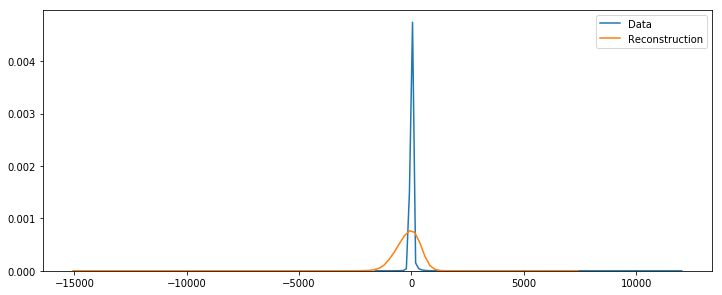

In [31]:
#neurons,kl_EM2
#kl_HAD3_sort
#mi(beforenorm_val_Data[:,96:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1).T)



In [20]:
kl_tot

[0.90937841527739582,
 0.87841596176881853,
 0.82096219664525416,
 0.88083417643056161,
 0.81622053283694207,
 0.86935069058007275,
 0.73388220814283767,
 0.75768422626966303,
 0.74189269990200368,
 0.7277317211227492,
 0.70536242931821547,
 0.6918731685454419,
 0.68331281369847618,
 0.65676878475763711,
 0.64657828102395809,
 0.65714527778808729,
 0.65708841536415197,
 0.71021334108894862,
 0.64402588000605898]

In [89]:
#(0.43224+0.5516+0.8459+0.4133+0.7710+0.7135+0.5576+0.6143+0.85+0.4579)/10
neurons

[90, 3, 10, 25, 40, 55, 70, 85, 90, 100]

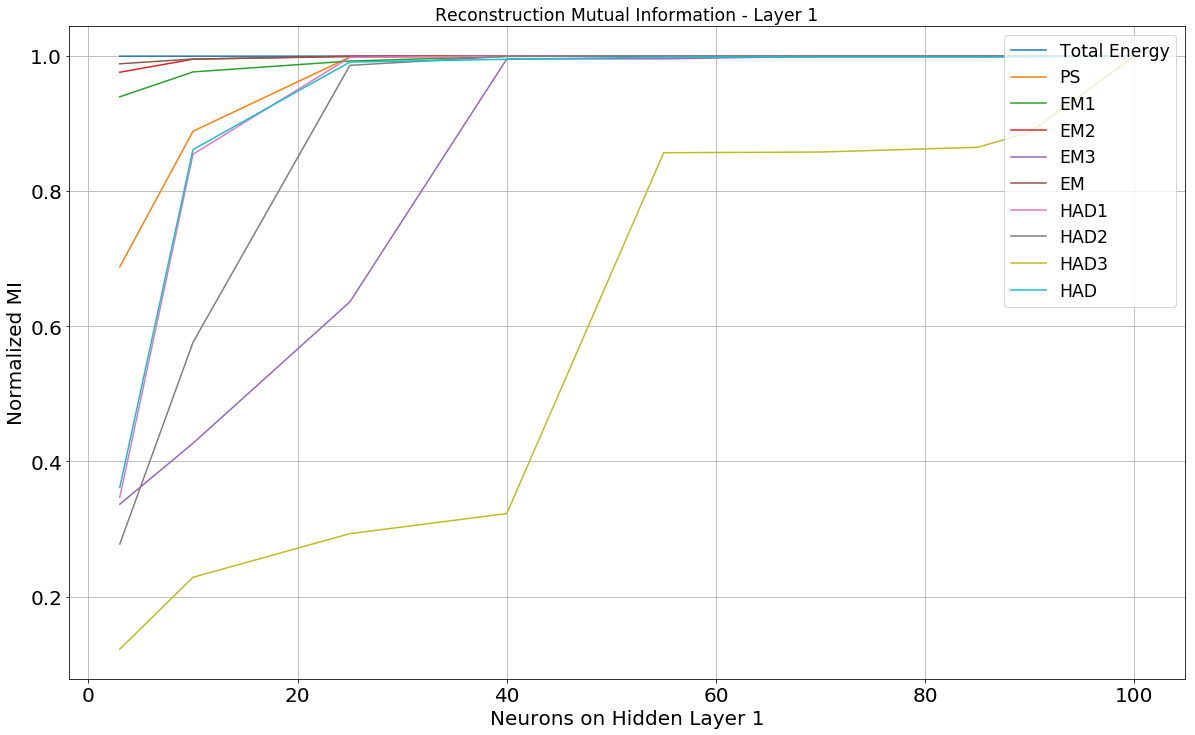

In [98]:
fig, ax1 = plt.subplots(figsize=(20, 12))

#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
plt.plot(neurons,kl_tot)
plt.plot(neurons,kl_PS)
plt.plot(neurons,kl_EM1)
plt.plot(neurons,kl_EM2)
plt.plot(neurons,kl_EM3)
plt.plot(neurons,kl_EM)
plt.plot(neurons,kl_HAD1)
plt.plot(neurons,kl_HAD2)
plt.plot(neurons,kl_HAD3)
plt.plot(neurons,kl_HAD)
#ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)

#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')

#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'reconstruction_mutual_info_comparsion2.png')
#fig.savefig(dirout+'reconstruction.png')

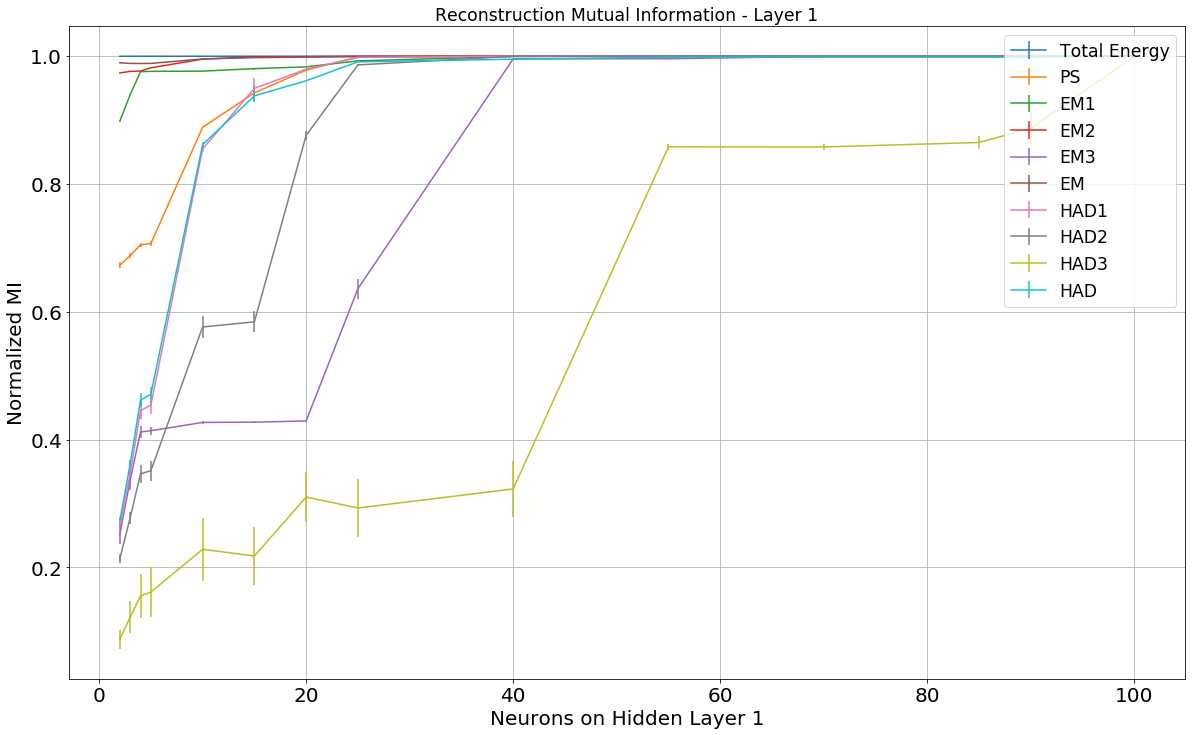

In [193]:
fig, ax1 = plt.subplots(figsize=(20, 12))

#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)
ax1.errorbar(neurons, y=kl_PS, yerr=kl_PS_std)
ax1.errorbar(neurons, y=kl_EM1, yerr=kl_EM1_std)
ax1.errorbar(neurons, y=kl_EM2, yerr=kl_EM2_std)
ax1.errorbar(neurons, y=kl_EM3, yerr=kl_EM3_std)
ax1.errorbar(neurons, y=kl_EM, yerr=kl_EM_std)
ax1.errorbar(neurons, y=kl_HAD1, yerr=kl_HAD1_std)
ax1.errorbar(neurons, y=kl_HAD2, yerr=kl_HAD2_std)
ax1.errorbar(neurons, y=kl_HAD3, yerr=kl_HAD3_std)
ax1.errorbar(neurons, y=kl_HAD, yerr=kl_HAD_std)


#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')

#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'reconstruction_mutual_info_comparsion2.png')
#fig.savefig(dirout+'reconstruction.png')

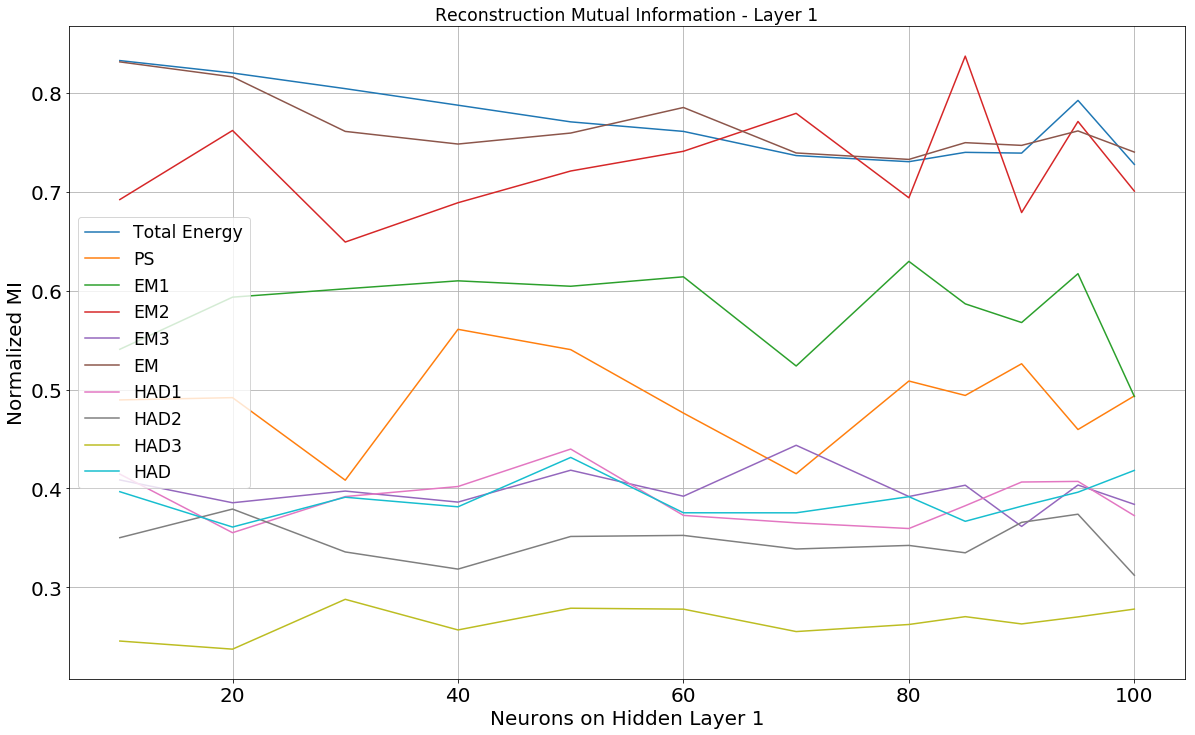

In [243]:
fig, ax1 = plt.subplots(figsize=(20, 12))

#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
plt.plot(neurons,kl_tot)
plt.plot(neurons,kl_PS)
plt.plot(neurons,kl_EM1)
plt.plot(neurons,kl_EM2)
plt.plot(neurons,kl_EM3)
plt.plot(neurons,kl_EM)
plt.plot(neurons,kl_HAD1)
plt.plot(neurons,kl_HAD2)
plt.plot(neurons,kl_HAD3)
plt.plot(neurons,kl_HAD)

#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc='best',fontsize = 'xx-large')

#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_mutual_info_comparsion.png')
#fig.savefig(dirout+'reconstruction.png')

# Sum of all Rings

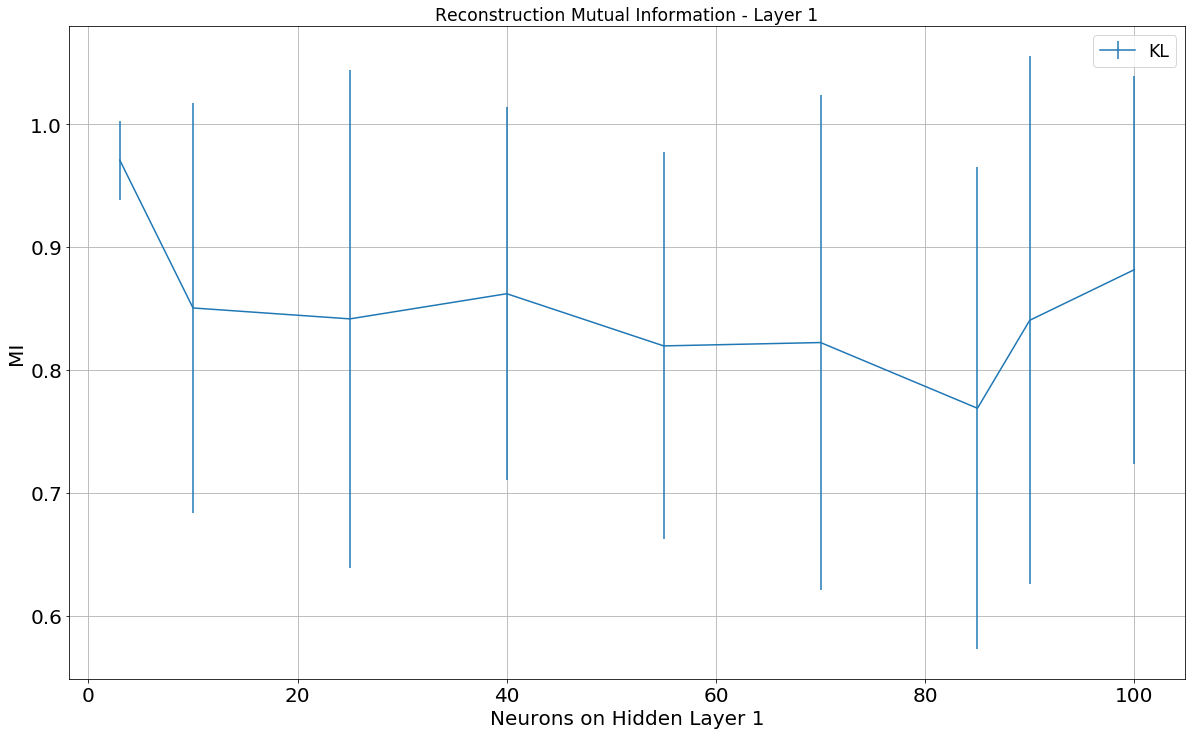

In [93]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_mi.png')
#fig.savefig(dirout+'reconstruction.png')

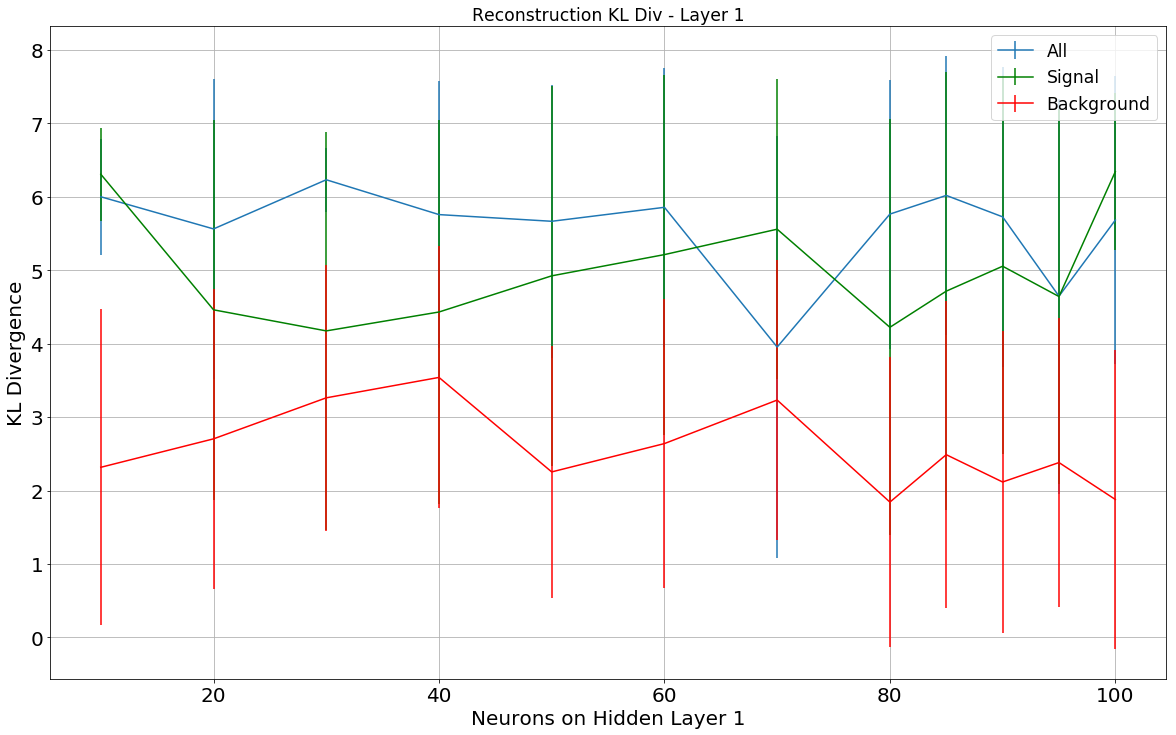

In [165]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)
ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_sgn_bkg.png')

# Total Energy

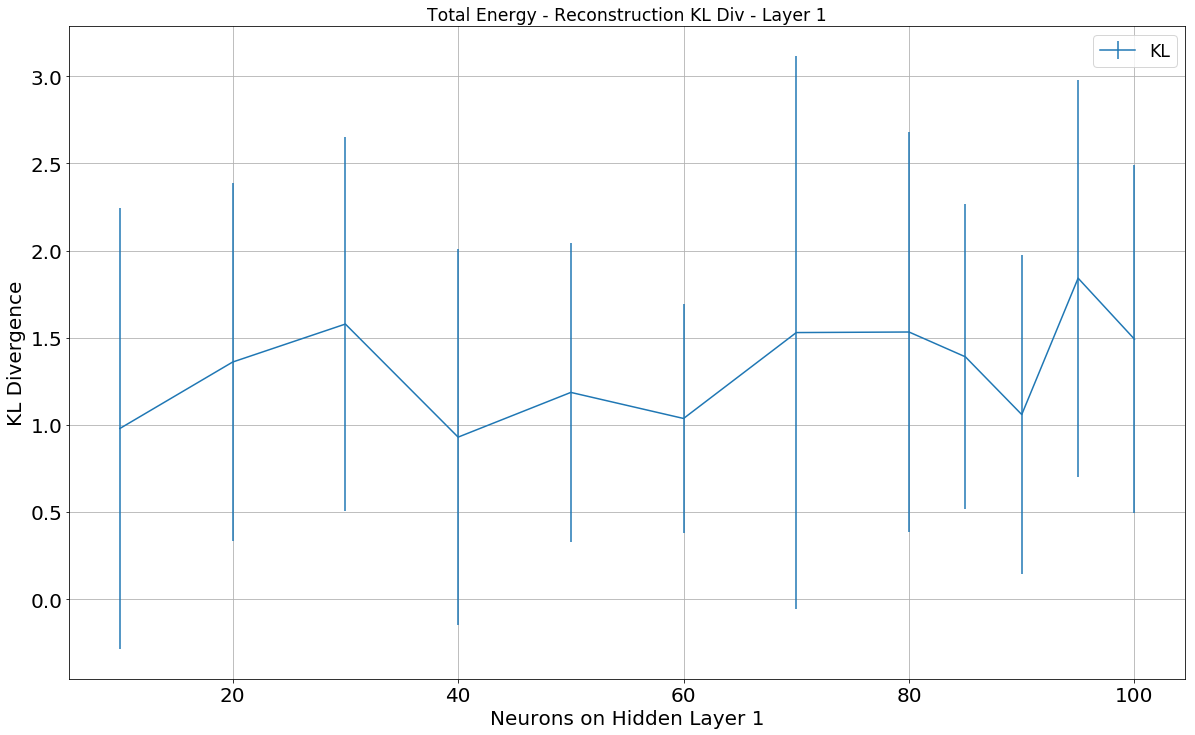

In [213]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Total Energy - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_totalenergy.png')
#fig.savefig(dirout+'reconstruction.png')

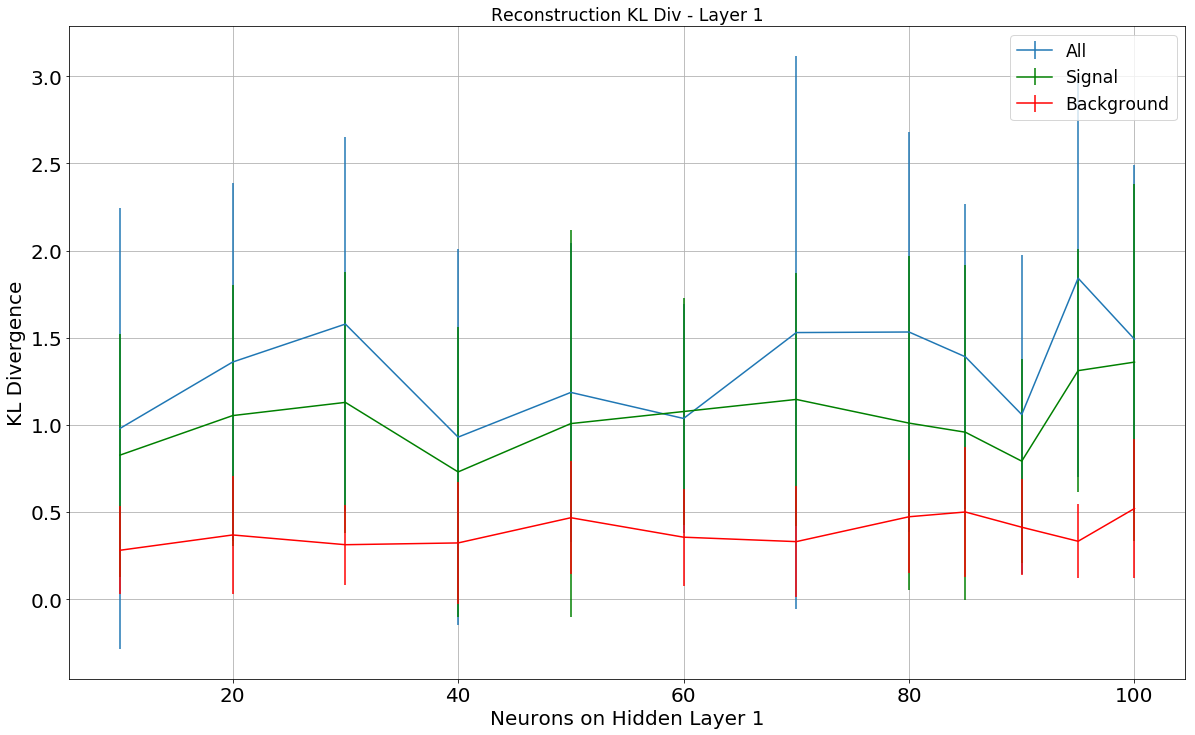

In [174]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)
ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_sgn_bkg_totalenergy.png')

# EM

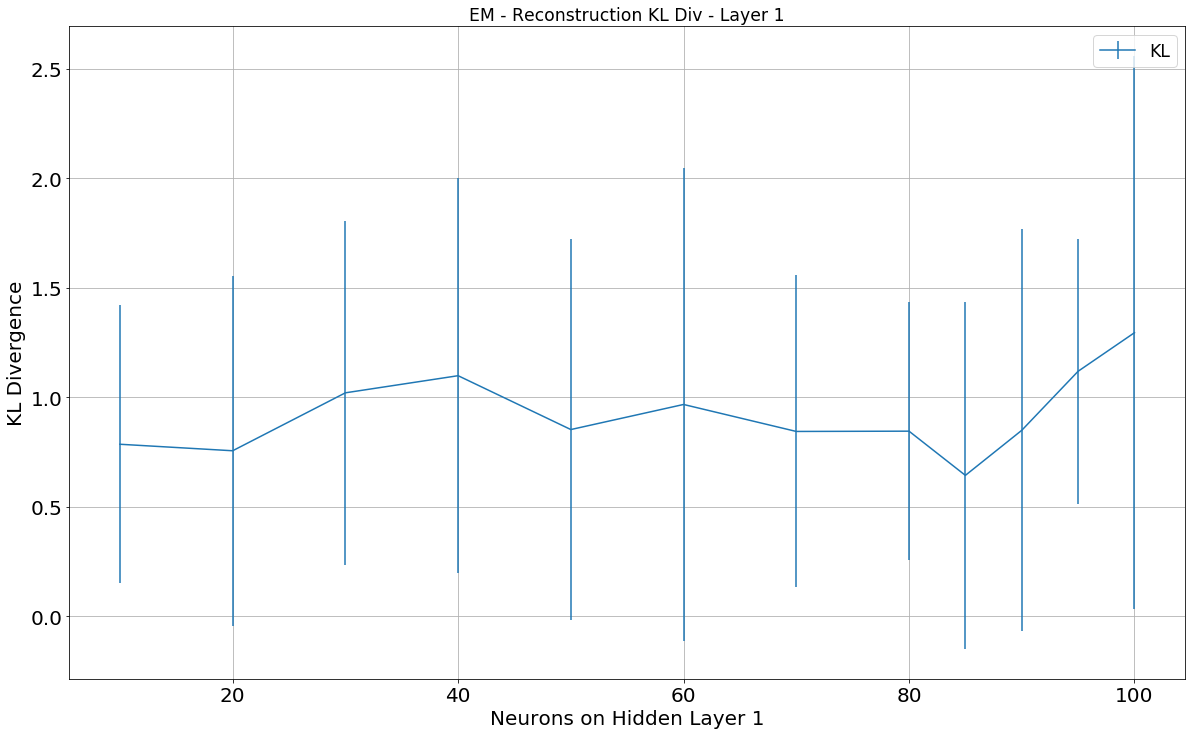

In [214]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM, yerr=kl_EM_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em.png')
#fig.savefig(dirout+'reconstruction.png')

# PS

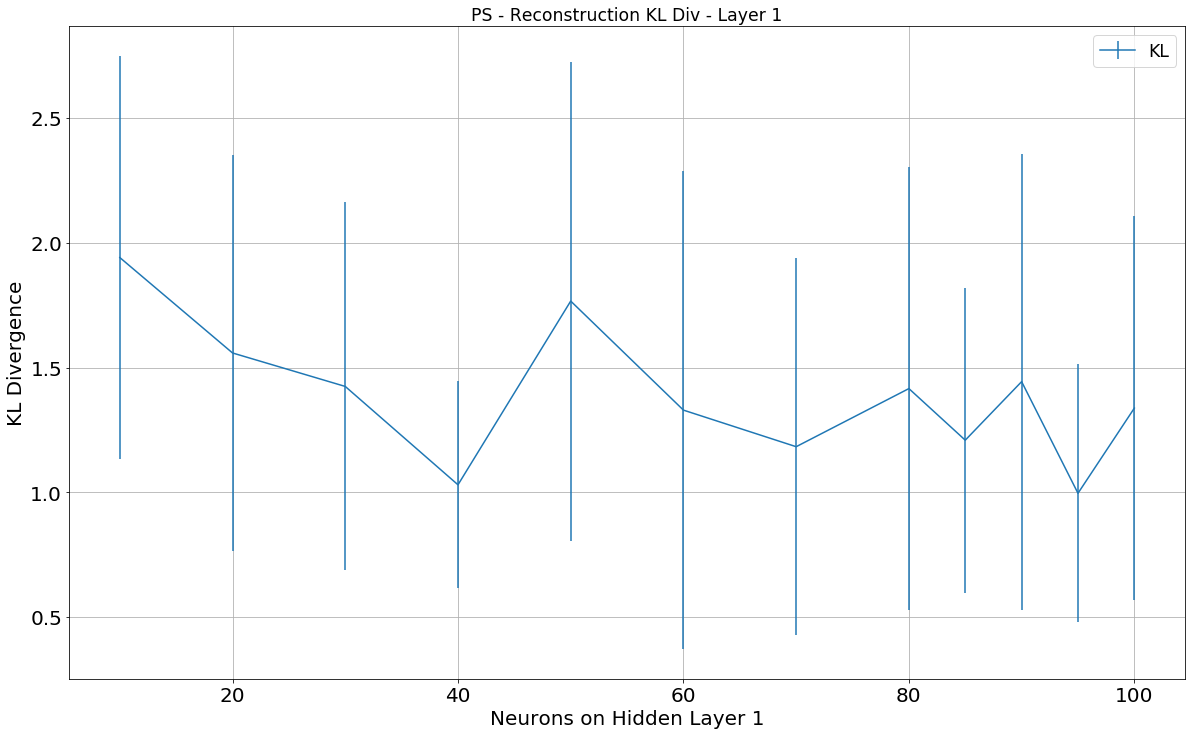

In [215]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_PS, yerr=kl_PS_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('PS - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_ps.png')
#fig.savefig(dirout+'reconstruction.png')

# EM1

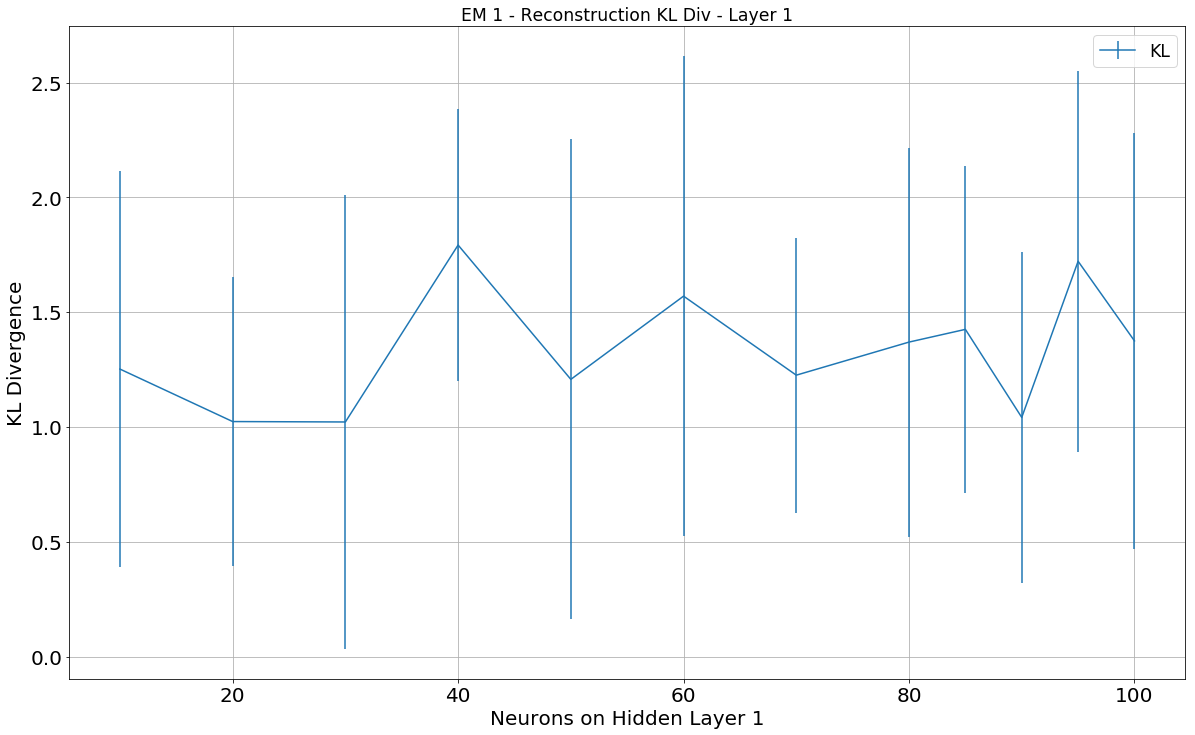

In [216]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM1, yerr=kl_EM1_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM 1 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em1.png')
#fig.savefig(dirout+'reconstruction.png')

# EM2

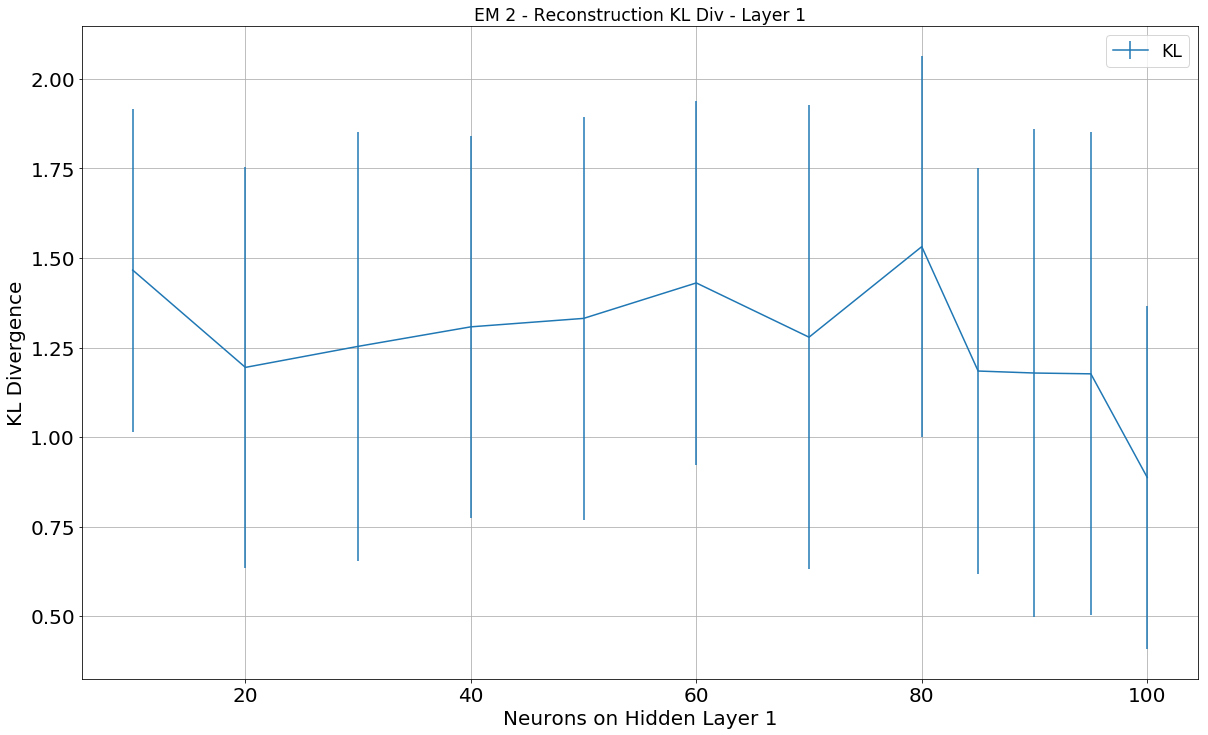

In [217]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM2, yerr=kl_EM2_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM 2 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em2.png')
#fig.savefig(dirout+'reconstruction.png')

# EM3

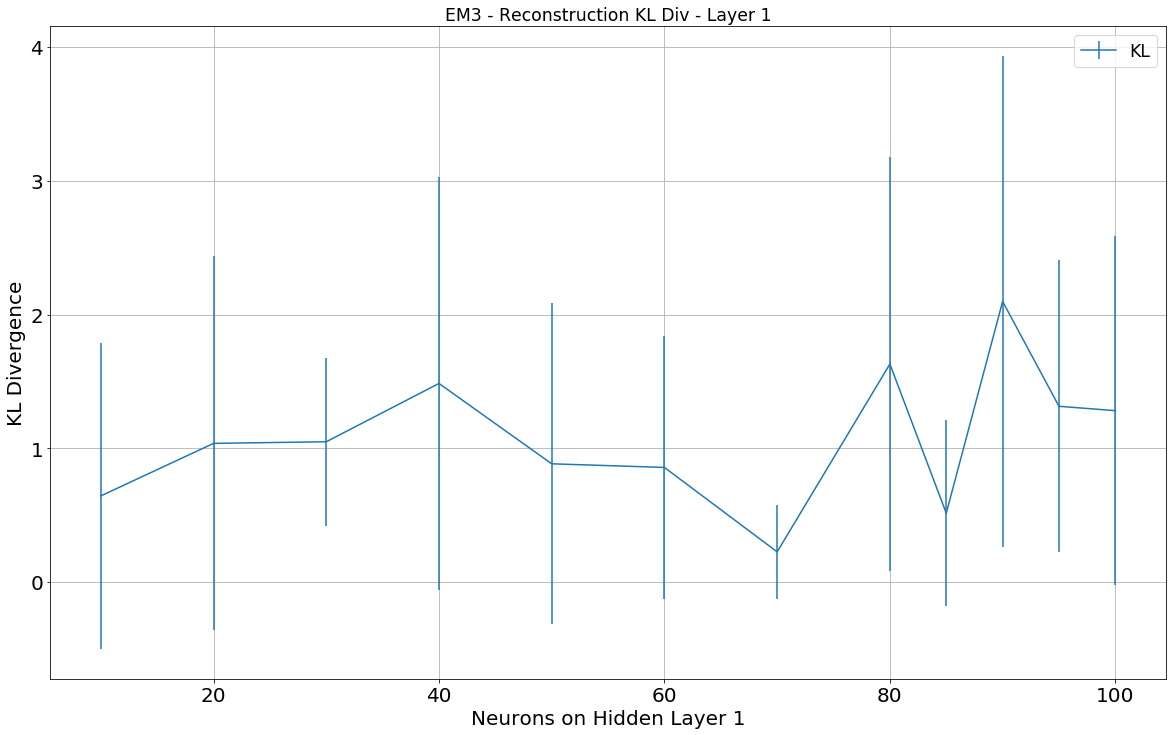

In [218]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM3, yerr=kl_EM3_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM3 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em3.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD

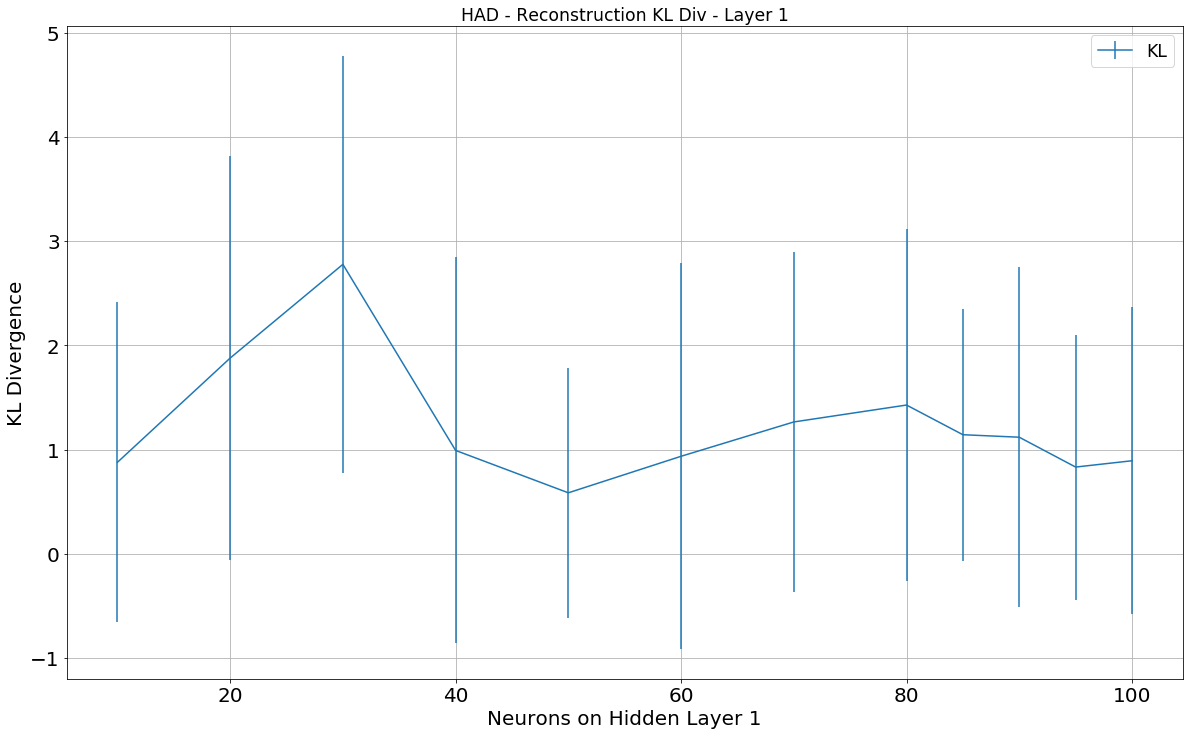

In [219]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD, yerr=kl_HAD_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD1

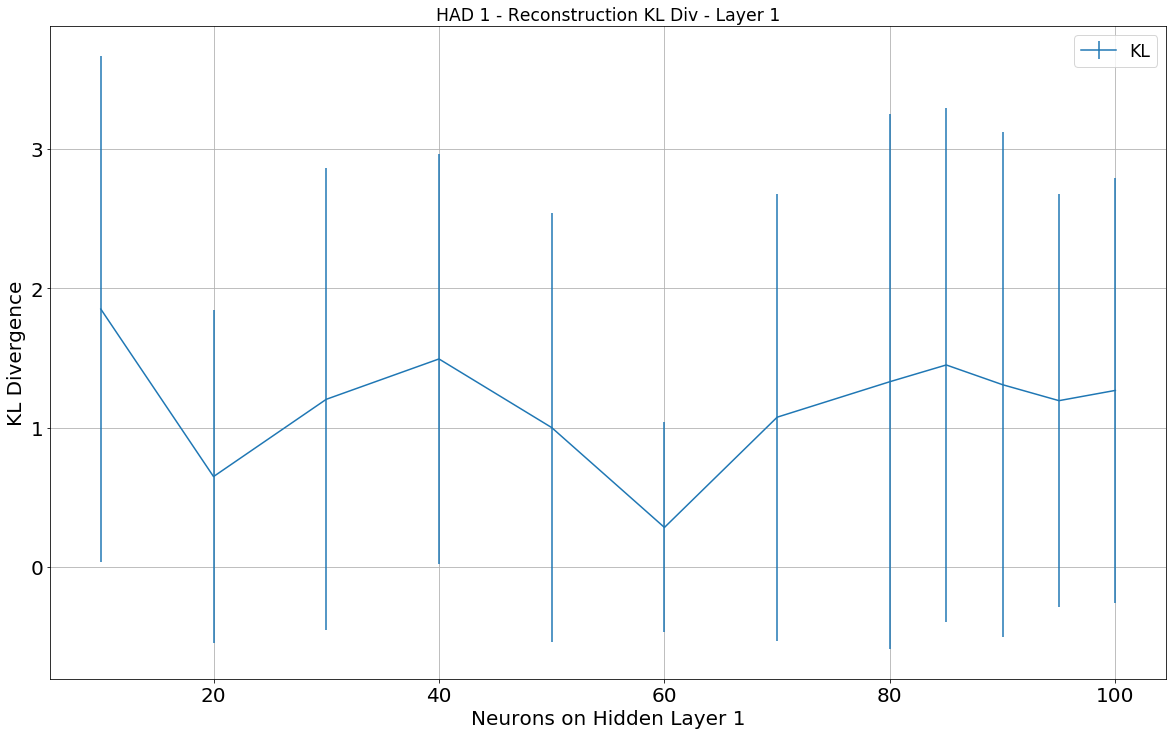

In [220]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD1, yerr=kl_HAD1_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD 1 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had1.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD2

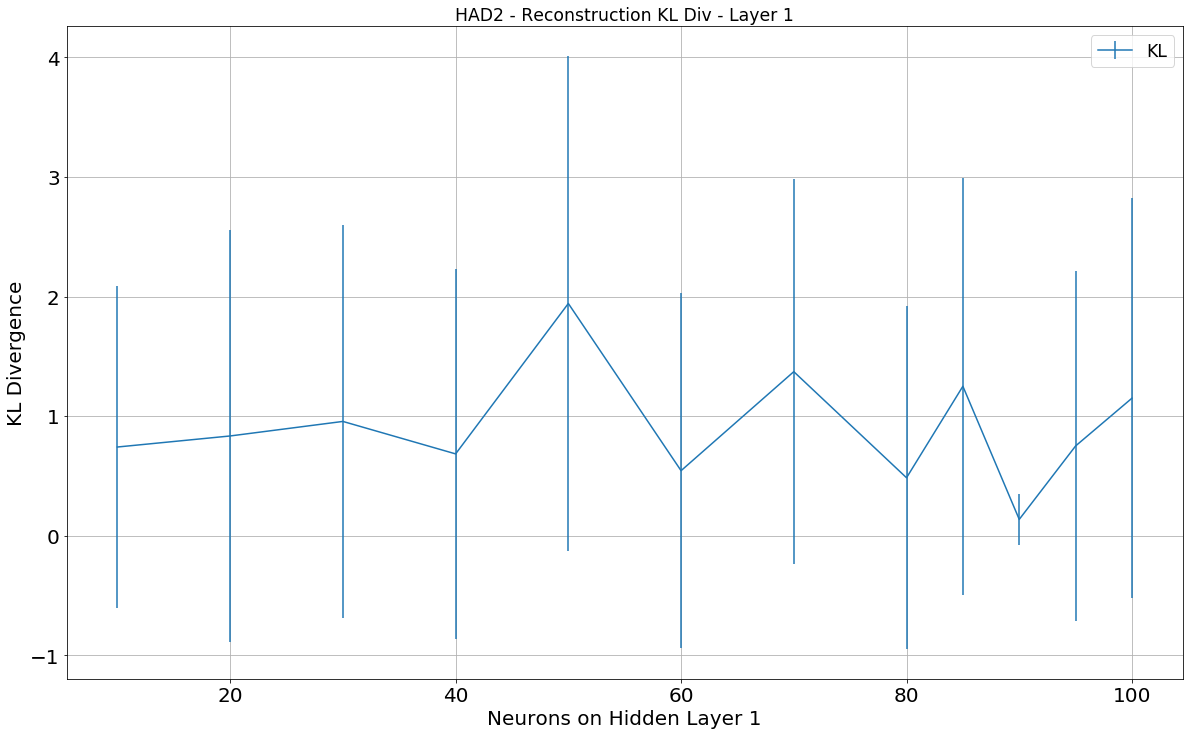

In [221]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD2, yerr=kl_HAD2_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD2 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had2.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD3

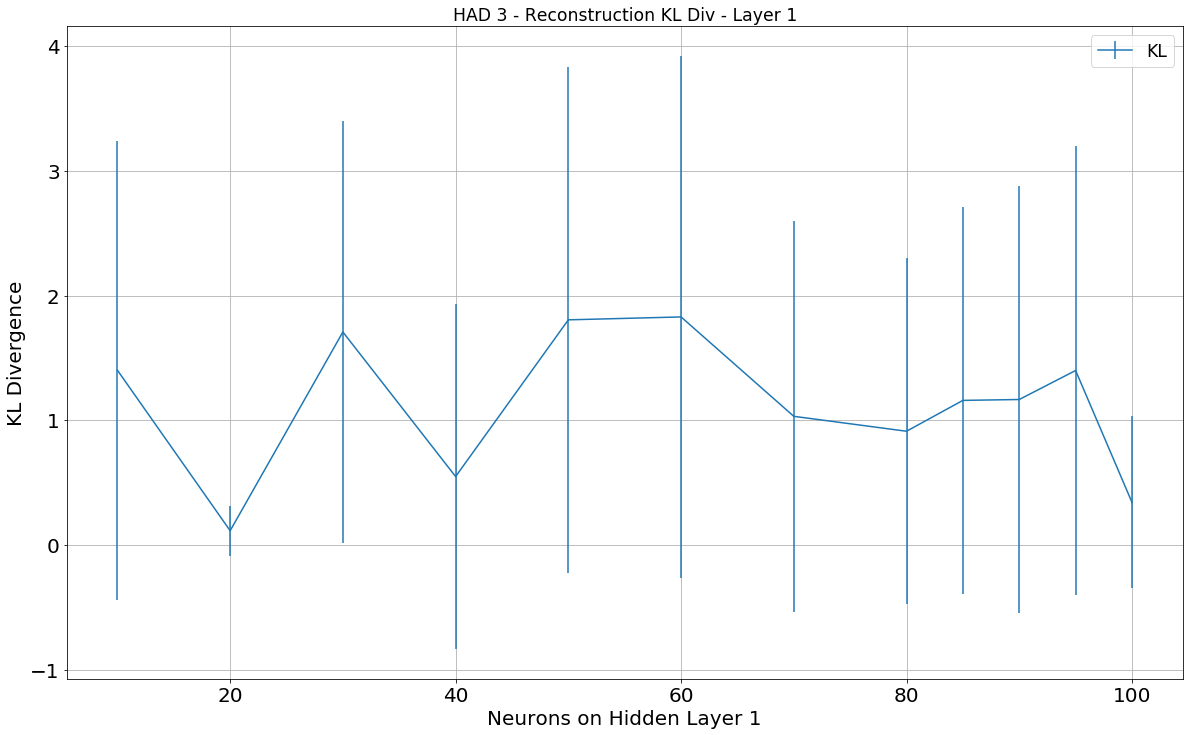

In [222]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD3, yerr=kl_HAD3_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD 3 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had3.png')
#fig.savefig(dirout+'reconstruction.png')

In [127]:
beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )

In [98]:
ass={}
ass[0]=2
ass[1]=3
ass[2]=6
ass[3]=9


In [104]:
#ass.values()
np.std(ass.values())

2.7386127875258306

In [90]:
unnorm_data[0][0]

array([ 8.39646240e+02,  1.06269421e+03,  3.20057602e+01,  9.14693832e-01,
        1.12175446e+02,  6.04448738e+01, -8.95127182e+01,  1.29294037e+02,
        2.08520483e+03,  6.93827490e+03,  1.51836560e+03,  8.32027710e+02,
        4.57789825e+02,  4.14541351e+02,  1.42549622e+02,  8.10741806e+01,
        1.73349953e+00, -3.52947006e+01, -5.96776733e+01,  8.96027222e+01,
        5.86165314e+01,  2.09794846e+01, -3.42154007e+01, -2.98789203e-01,
        5.11646652e+01,  1.21556807e+01,  4.24896584e+01,  2.80395641e+01,
        3.48431702e+01, -3.64512849e+00, -5.49335938e+01, -8.10185432e+00,
       -3.08214188e+01, -2.47685885e+00, -7.12998886e+01, -7.45881557e+00,
       -5.51200447e+01, -3.08013153e+01,  1.72903118e+01, -5.77918282e+01,
        3.45475745e+00, -2.39603543e+00, -2.65236912e+01,  2.45904541e+00,
       -7.73752136e+01, -1.88949347e+00,  3.37837219e+01, -5.08867645e+01,
        6.43538361e+01, -1.33176384e+01, -1.35315933e+02, -4.53872728e+00,
        3.25193367e+01,  

In [85]:
afternorm[0][0]

array([[ 2.2333767e-02,  2.8266624e-02,  8.5132185e-04, ...,
         2.2517118e-04, -4.7686187e-04,  0.0000000e+00],
       [ 2.5891216e-02,  8.3414381e-03, -3.0658904e-03, ...,
         1.3497335e-04, -2.4407177e-04,  0.0000000e+00],
       [ 1.8975632e-02,  3.2899857e-02,  6.9864346e-03, ...,
        -4.3124289e-04, -2.9044608e-05,  0.0000000e+00],
       ...,
       [ 2.2504025e-03,  3.1683140e-03,  2.6146527e-03, ...,
         1.8720915e-04,  1.1490405e-03,  0.0000000e+00],
       [ 2.9191202e-02,  3.4138426e-02, -1.2338232e-02, ...,
         9.1451098e-04, -3.8869379e-04,  0.0000000e+00],
       [ 1.3924519e-02, -2.8772824e-03,  1.7598603e-02, ...,
         1.2681755e-03, -1.9081774e-04,  0.0000000e+00]], dtype=float32)

In [61]:
saaa = 'tunedDiscr.pp-N1-AE_77.hn0010.s0003.il0000.iu0099.et0002.eta0000.pic'
print saaa.split('.')[3][-1]

3


In [222]:
if isinstance(beforenorm, (tuple, list,)):
      norm_data = []
      for i, cdata in enumerate(beforenorm):
        norm_data.append( cdata / norms[i])

In [237]:
if isinstance(afternorm, (tuple, list,)):
      unnorm_data = []
      for i, cdata in enumerate(afternorm):
        unnorm_data.append( cdata * norms[i])

In [ ]:
if isinstance(data, (tuple, list,)):
    #norm1_val_Data = np.concatenate( data, axis=0 )
    norm1_val_Data = np.concatenate( data, axis=0 )

In [243]:
unnorm_data[1][43]

array([ 4.14324524e+02,  5.80920563e+01,  2.90117615e+02, -3.82144836e+02,
       -3.07323822e+02,  1.47303711e+02, -1.26472496e+02,  1.27288582e+02,
        2.27023071e+03,  3.56478882e+03,  9.86738037e+02,  4.83409485e+02,
        1.14288086e+02,  6.55897369e+01,  7.04929428e+01, -2.07344189e+01,
        8.46368942e+01, -1.56415987e+01, -5.55555191e+01,  3.46798325e+01,
       -3.04336834e+01, -3.92068291e+00,  4.15888824e+01, -4.29359665e+01,
        9.31302261e+01,  1.36893091e+01,  2.44227619e+01, -5.81115150e+01,
       -7.88156052e+01,  5.04332542e+01,  1.59602060e+01, -9.38887882e+00,
       -3.06666241e+01, -6.20635185e+01,  1.91980529e+00, -5.17838554e+01,
        3.16268997e+01, -1.08848457e+01, -7.75930786e+01, -1.16034327e+01,
        9.62844193e-02, -2.99665508e+01, -2.22139091e+01, -4.39717979e+01,
       -3.39476180e+00, -1.71876450e+01,  1.32685280e+01, -2.33074245e+01,
       -5.61474711e-02, -5.79938278e+01, -4.29106407e+01, -2.08246975e+01,
       -5.40919638e+00, -

In [242]:
beforenorm[1][43]

array([ 4.14324524e+02,  5.80920563e+01,  2.90117615e+02, -3.82144836e+02,
       -3.07323822e+02,  1.47303711e+02, -1.26472496e+02,  1.27288582e+02,
        2.27023071e+03,  3.56478882e+03,  9.86738037e+02,  4.83409485e+02,
        1.14288086e+02,  6.55897369e+01,  7.04929428e+01, -2.07344189e+01,
        8.46368942e+01, -1.56415987e+01, -5.55555191e+01,  3.46798325e+01,
       -3.04336853e+01, -3.92068315e+00,  4.15888824e+01, -4.29359665e+01,
        9.31302261e+01,  1.36893091e+01,  2.44227619e+01, -5.81115150e+01,
       -7.88156052e+01,  5.04332542e+01,  1.59602060e+01, -9.38887882e+00,
       -3.06666241e+01, -6.20635185e+01,  1.91980529e+00, -5.17838516e+01,
        3.16268997e+01, -1.08848457e+01, -7.75930786e+01, -1.16034327e+01,
        9.62844193e-02, -2.99665527e+01, -2.22139091e+01, -4.39717979e+01,
       -3.39476156e+00, -1.71876450e+01,  1.32685280e+01, -2.33074245e+01,
       -5.61474748e-02, -5.79938278e+01, -4.29106407e+01, -2.08246975e+01,
       -5.40919638e+00, -

In [215]:
len(norms[0])+len(norms[1])

339519

In [208]:
if isinstance(data, (tuple, list,)):
    #norm1_val_Data = np.concatenate( data, axis=0 )
    norm1_val_Data = np.concatenate( data, axis=0 )

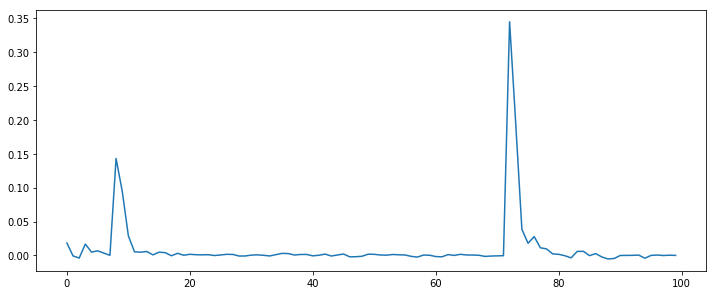

In [131]:
norm1_val_Data[1]
plt.plot(norm1_val_Data[1])

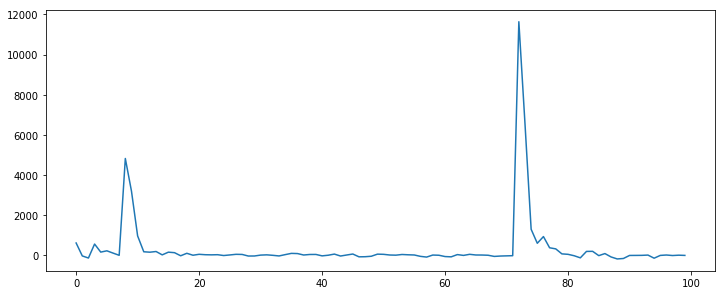

In [130]:
val_Data[1]
plt.plot(val_Data[1])
#before_val_Data87[-43]

In [113]:
for i in range(before_val_Data87.shape[1]):
    pdf, a = EstPDF(before_val_Data87.T[i],mode='hist')
    plt.plot(pdf)
    plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Energia do Anel',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.grid()
    plt.savefig(dirout+'pdf_norm1'+str(i+1)+'.png')
    plt.gcf().clear()
#plt.savefig(dirout+'60X40_kl_recons_anel.png')

In [99]:
data[0].T.shape
data[1].T.shape


(100, 2900)

In [145]:
for i in range(norm1_val_Data.shape[1]):
    pdf, a = EstPDF(norm1_val_Data.T[i],mode='hist')
    plt.plot(pdf)
    pdf, a = EstPDF(data[0].T[i],mode='hist')
    plt.plot(pdf)
    pdf, a = EstPDF(data[1].T[i],mode='hist')
    plt.plot(pdf)
    plt.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
    plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Energia do Anel',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.grid()
    plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
    plt.gcf().clear()


Anel: 1
OK Anel: 1
Anel: 2
OK Anel: 2
Anel: 3
OK Anel: 3
Anel: 4
OK Anel: 4
Anel: 5
OK Anel: 5
Anel: 6
OK Anel: 6
Anel: 7
OK Anel: 7
Anel: 8
OK Anel: 8
Anel: 9
OK Anel: 9
Anel: 10
OK Anel: 10
Anel: 11
OK Anel: 11
Anel: 12
OK Anel: 12
Anel: 13
OK Anel: 13
Anel: 14
OK Anel: 14
Anel: 15
OK Anel: 15
Anel: 16
OK Anel: 16
Anel: 17
OK Anel: 17
Anel: 18
OK Anel: 18
Anel: 19
OK Anel: 19
Anel: 20
OK Anel: 20
Anel: 21
OK Anel: 21
Anel: 22
OK Anel: 22
Anel: 23
OK Anel: 23
Anel: 24
OK Anel: 24
Anel: 25
OK Anel: 25
Anel: 26
OK Anel: 26
Anel: 27
OK Anel: 27
Anel: 28
OK Anel: 28
Anel: 29
OK Anel: 29
Anel: 30
OK Anel: 30
Anel: 31
OK Anel: 31
Anel: 32
OK Anel: 32
Anel: 33
OK Anel: 33
Anel: 34
OK Anel: 34
Anel: 35
OK Anel: 35
Anel: 36
OK Anel: 36
Anel: 37
OK Anel: 37
Anel: 38
OK Anel: 38
Anel: 39
OK Anel: 39
Anel: 40
OK Anel: 40
Anel: 41
OK Anel: 41
Anel: 42
OK Anel: 42
Anel: 43
OK Anel: 43
Anel: 44
OK Anel: 44
Anel: 45
OK Anel: 45
Anel: 46
OK Anel: 46
Anel: 47
OK Anel: 47
Anel: 48
OK Anel: 48
Anel: 49
O

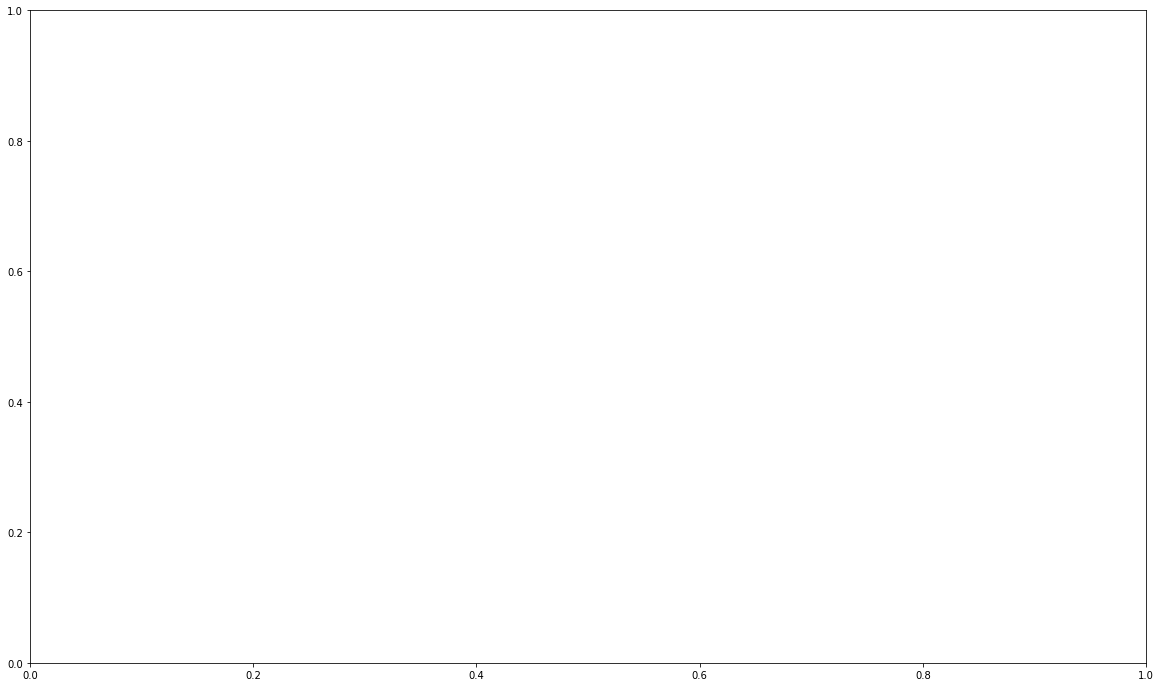

In [209]:
fig1 = plt.figure(figsize=(20, 12))
for i in range(norm1_val_Data.shape[1]):
    print 'Anel: '+str(i+1)
    try:
        print 'OK Anel: '+str(i+1)
        #fig1 = plt.figure(figsize=(20, 12))
        #i=0
        #pdf, a = EstPDF(norm1_val_Data.T[i],mode='hist')
        sb.kdeplot(norm1_val_Data.T[i],shade=True,label="All")
        #pdf, a = EstPDF(data[0].T[i],mode='hist')
        sb.kdeplot(data[0].T[i],label="Signal")
        #pdf, a = EstPDF(data[1].T[i],mode='hist')
        sb.kdeplot(data[1].T[i],label="Background")
        plt.legend(loc='best',fontsize = 'xx-large')
        plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
        plt.ylabel('Probabilidade',fontsize= 'xx-large')
        plt.xlabel('Energia do Anel',fontsize= 'xx-large')
        plt.tick_params(axis='both',labelsize=16)
        plt.grid()
        plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
        plt.gcf().clear()
    except:
        print 'Erro Anel: '+str(i+1)


In [203]:
val_Data.shape[1]
#import sklearn
#sklearn.neighbors.KernelDensity(norm1_val_Data.T[1])

100

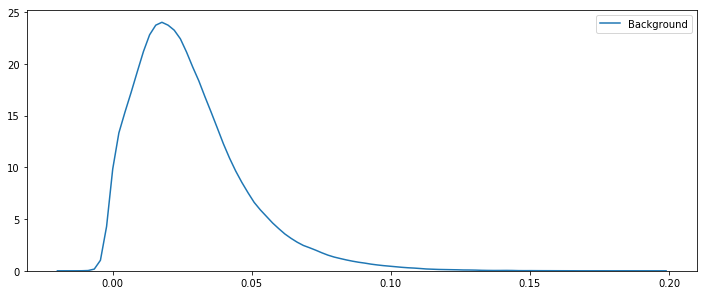

In [192]:
sb.kdeplot(data[0].T[0],label="Background")

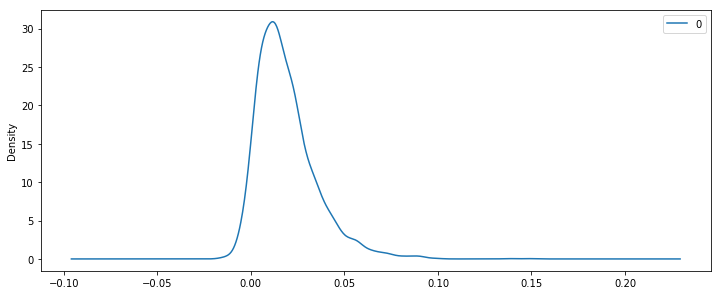

In [191]:
import pandas as pd
pd.DataFrame(data[1].T[1]).plot.kde()

In [11]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Estimating PDF
def EstPDF(data, bins=np.array([-1,0, 1]), mode='kernel', kernel='epanechnikov', kernel_bw=0.01, verbose=False):
    # kernels = 'epanechnikov','gaussian', 'tophat','exponential', 'linear', 'cosine'
    if mode == 'hist':
        if verbose:
            print 'EstPDF: Histogram Mode'
        [y,pts] = np.histogram(data,bins=100,density=True)
        bins_centers = pts[0:-1]+np.diff(pts)
        pdf = y*np.diff(pts)
        return [pdf,bins_centers]
    if mode == 'kernel':
        if verbose:
            print 'EstPDF: Kernel Mode'
        if kernel is None:
            if verbose:
                print 'No kernel defined'
            return -1
        if kernel_bw is None:
            if verbose:
                print 'No kernel bandwidth defined'
            return -1
        kde = (KernelDensity(kernel=kernel,algorithm='auto',bandwidth=kernel_bw).fit(data))
        aux_bins = bins
        log_dens_x = (kde.score_samples(aux_bins[:, np.newaxis]))
        pdf = np.exp(log_dens_x)
        pdf = pdf/sum(pdf)
        bins_centers = bins
        return [pdf,bins_centers]

# Computing KL Divergence
def KLDiv(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    [p_pdf,p_bins] = EstPDF(p, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    [q_pdf,q_bins] = EstPDF(q, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

# Computing KL Divergence
def KLDiv_conj(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    p_pdf_conj=1
    q_pdf_conj=1
    for i_anel in range(100): 
        [ppdf,p_bins] = EstPDF(p[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
        [qpdf,q_bins] = EstPDF(q[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    
        p_pdf_conj = p_pdf_conj*ppdf
        q_pdf_conj = q_pdf_conj*qpdf
    
    p_pdf=p_pdf_conj
    q_pdf=q_pdf_conj
    
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

In [86]:
pdf,bins = KLDiv(data0.T,val_Data.T)
print pdf

0.0


In [31]:
print data77.shape
print data87.shape
print data40.shape
print data10.shape

(339519, 100)
(339519, 100)
(339521, 100)
(339519, 100)


In [29]:
pdf

0.6241268774152477

In [52]:
import numpy as np

def entropy(counts):
    '''Compute entropy.'''
    ps = counts/float(np.sum(counts))  # coerce to float and normalize
    ps = ps[np.nonzero(ps)]            # toss out zeros
    H = -sum(ps * np.log2(ps))   # compute entropy
    #H = scipy.stats.entropy(ps,base=2)
    return H

def mi(x, y):
    '''Compute mutual information'''
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    counts_xy = np.histogram2d(x, y, bins=bins)[0]
    counts_x  = np.histogram(x, bins=bins)[0]
    counts_y  = np.histogram(y, bins=bins)[0]
    
    H_xy = entropy(counts_xy)
    H_x  = entropy(counts_x)
    H_y  = entropy(counts_y)
    
    mi = H_x + H_y - H_xy
    mi_normed = np.sqrt(1. - np.exp(-2 * mi))
    #mi_normed = mi/(np.sqrt(H_x*H_y))
    return mi,bins
    #return mi
def mutual_information_matrix(data):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data[j])
    return matrix

def mutual_information_matrix_2(data,data2):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data2[j])
    return matrix

In [232]:
beforenorm_val_Data.sum(axis=1).shape#,unnorm_reconstruct_val_Data.sum(axis=1).T

(339521,)

In [54]:
beforenorm_val_Data[:,8:71,].sum(axis=1).shape

(339521,)

In [55]:
mi(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))

(0.8643757704977477, 1647)

In [10]:
c=np.concatenate([np.ones(49), np.zeros(27652), np.ones(141), np.zeros(774106) ])
t=np.concatenate([np.ones(49), np.ones(27652), np.zeros(141), np.zeros(774106)])
computeMI(c,t)

2
2


0.00011053558610110253

In [11]:
ss = np.vstack((c,t))
ss.shape
#drv.information_mutual(c, t)

(2, 801948)

In [47]:
beforenorm_val_Data.sum(axis=1).shape

(339521,)

In [75]:
unnorm_reconstruct_val_Data[:,0:7,].shape

(339521, 7)

0.99554770556 (0.10828455996712272, 1009)


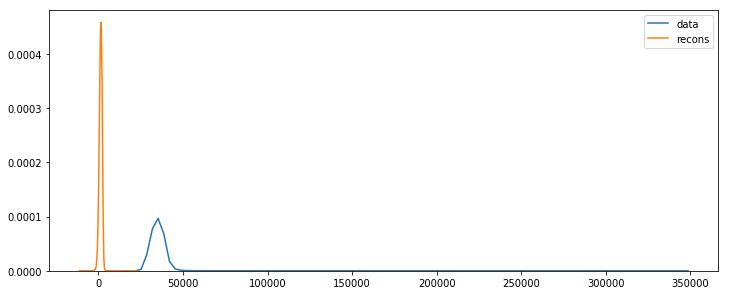

In [79]:
sb.kdeplot(beforenorm_val_Data.sum(axis=1).T,label="data")
sb.kdeplot(unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).T,label="recons")
print drv.information_mutual_normalised(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1)), mi(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1))

In [93]:
#calc_MI(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))
import sklearn
print sklearn.metrics.mutual_info_score(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1), contingency=None)
print sklearn.metrics.mutual_info_score(beforenorm_val_Data.sum(axis=1),beforenorm_val_Data.sum(axis=1), contingency=None)
print calc_MI2(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))

12.6688281935
12.67863347
0.924113599152


In [68]:
#a = calc_MI2(beforenorm_val_Data.sum(axis=1),beforenorm_val_Data.sum(axis=1))
a,xaaa,yaaa,bins = calc_MI2(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1))
#np.sqrt(1. - np.exp(-2 * a))

In [53]:
unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).shape

(339519,)

In [70]:
print xaaa[4], yaaa[4],bins
#print xaaa.shape, yaaa.shape,bins

-294.466 -294.466 453


In [71]:
from scipy.stats import chi2_contingency

def calc_MI(x, y):
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood",correction = True)
    mi = 0.5 * g / c_xy.sum()
    return mi

In [16]:
from sklearn.metrics import mutual_info_score

def calc_MI2(x, y):
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    c_xy,xaaa,yaaa = np.histogram2d(x, y, bins=(bins_list,bins_list))
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi #,xaaa,yaaa,bins

In [9]:
import numpy as np
def computeMI(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) #P(x)
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) #P(y)
    for i in xrange(len(x_value_list)):
        print len(x_value_list)
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/( P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi

In [19]:
beforenorm_val_Data.sum(axis=1).shape,unnorm_reconstruct_val_Data.sum(axis=1).shape

((339521,), (339521,))

In [18]:
mi(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            

(0.86437577049774772, 1647)

In [67]:
rr = np.vstack((beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1)))
rr.shape
drv.information_mutual(rr,base=np.exp(1))

array([[ 12.67863347,  12.6403848 ],
       [ 12.6403848 ,  12.69704241]])

In [46]:
beforenorm_val_Data.shape


(339521, 100)

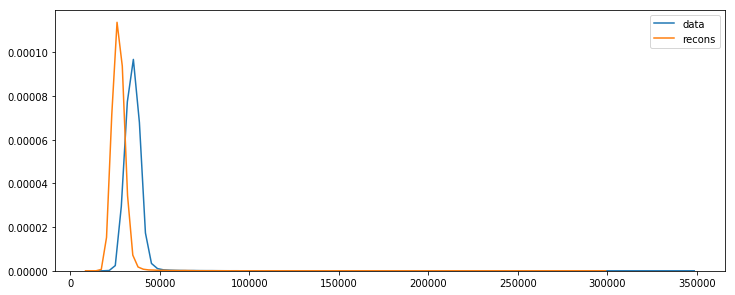

In [45]:
sb.kdeplot(beforenorm_val_Data.sum(axis=1).T,label="data")
sb.kdeplot(unnorm_reconstruct_val_Data.sum(axis=1).T,label="recons")

In [36]:
np.sqrt(1. - np.exp(-2 * a[0][1]))

0.99999999999999989

In [94]:
from pyitlib import discrete_random_variable as drv

In [95]:
X = np.array(((1,1,1,1), (1,1,2,2), (1,1,2,2)))
X.shape

(3, 4)

In [96]:
xx = pd.DataFrame(X)

In [5]:
#type(xx)
#drv.information_mutual(xx)
import numpy as np
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv')
df = df[['height', 'weight', 'base_experience']].apply(lambda s: pandas.qcut(s, 10, labels=False)) # Bin the data
drv.information_mutual_normalised(df.T) # Transposition required for comparing columns


/home/caducovas/.local/lib/python2.7/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)


array([[ 1.        ,  0.32452241,  0.17682195],
       [ 0.32781099,  1.        ,  0.13990528],
       [ 0.17861754,  0.13990821,  1.        ]])